In [1]:
import os

import chi
import chi.library
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import myokit
import numpy as np
import pandas as pd
import pints.plot
import seaborn as sns
sns.set_theme()

from model import define_hamberg_model, define_hamberg_population_model

In [706]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=False)

In [707]:
model.outputs()

['central.drug_concentration']

In [3]:
# Define parameters
parameters = [0, 0, 10, 2, 0.1]

# Define dosing regimen
dose = 5
period = 24

# Simulate concentration for dose durations
times = np.linspace(0, 96, 500)
model.set_dosing_regimen(dose=dose, start=0, period=period)
out1 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, period=period, duration=6)
out2 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, duration=12, period=period)
out3 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, duration=24, period=period)
out4 = model.simulate(parameters=parameters, times=times)[0]

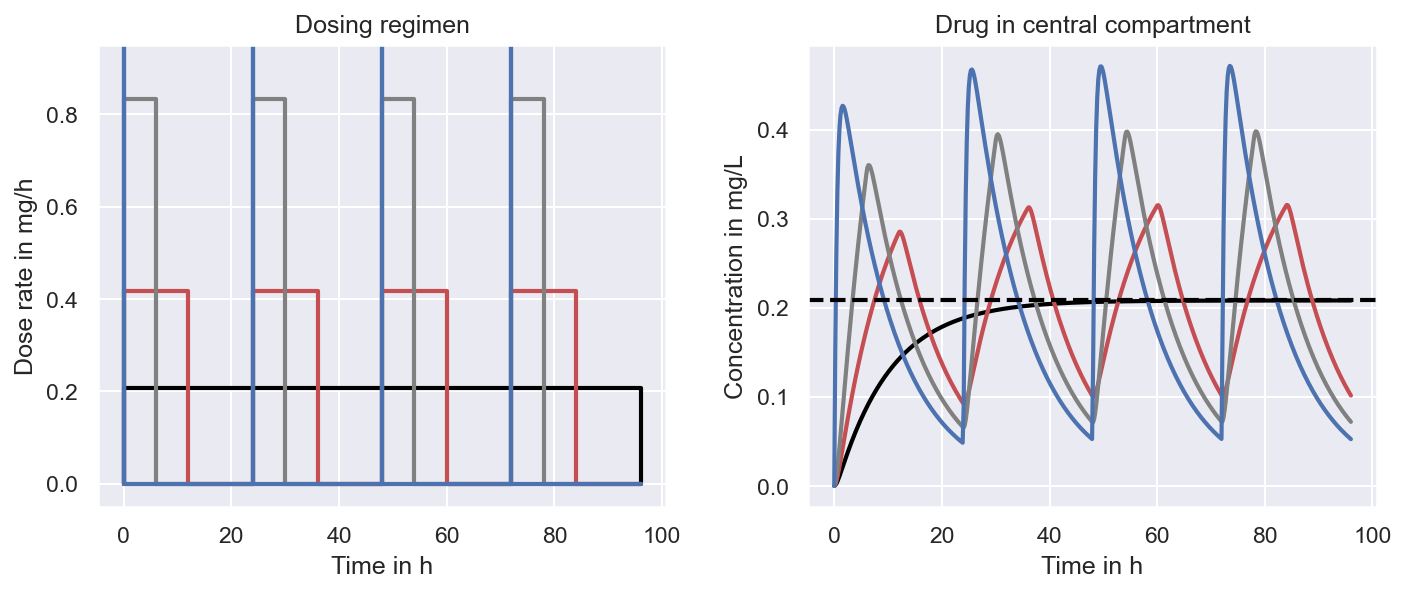

In [4]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.25)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot constant dose rate
axes[0].plot([0, 0, 96, 96], [0, dose/24, dose/24, 0], color='black', linewidth=2)
axes[1].plot(times, out4, color='black', linewidth=2)

# Plot infusion 2
axes[0].plot([0, 0, 12, 12, 24, 24, 36, 36, 48, 48, 60, 60, 72, 72, 84, 84, 96], [0, dose/12, dose/12, 0] * 4 + [0], color=sns.color_palette()[3], linewidth=2)
axes[1].plot(times, out3, color=sns.color_palette()[3], linewidth=2)

# Plot infusion
axes[0].plot([0, 0, 6, 6, 24, 24, 30, 30, 48, 48, 54, 54, 72, 72, 78, 78, 96], [0, dose/6, dose/6, 0] * 4 + [0], color='grey', linewidth=2)
axes[1].plot(times, out2, color='grey', linewidth=2)

# Plot bolus dose
axes[0].plot([0, 0, 0.001, 0.001, 24, 24, 24.001, 24.001, 48, 48, 48.001, 48.001, 72, 72, 72.001, 72.001, 96], [0, dose/0.001, dose/0.001, 0] * 4 + [0], color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times, out1, color=sns.color_palette()[0], linewidth=2)

# Plot steady state concentration
ss = [dose / parameters[2] / period / parameters[-1]]
axes[1].axhline(y=ss, linestyle='--', color='black', linewidth=2)

axes[0].set_ylim([-0.05, 0.95])
axes[0].set_ylabel('Dose rate in mg/h')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Concentration in mg/L')
axes[1].set_xlabel('Time in h')

axes[0].set_title('Dosing regimen')
axes[1].set_title('Drug in central compartment')

plt.savefig('illustration_dosing_regimens.pdf', bbox_inches='tight')
plt.show()

In [5]:
ss

[0.20833333333333331]

In [432]:
# Define model
model, parameters_df = define_hamberg_model()
parameters = np.array([
    parameters_df[parameters_df.Parameter == p].Value.values[0]
    for p in model.parameters()
])

# Calculate MSE
days = 14
times = np.linspace(0, days, num=1000) * 24
target = 2.5
mse = []
doses = np.linspace(5, 15)
for dose in doses:
    model.set_dosing_regimen(dose=dose, period=24)
    out = model.simulate(parameters=parameters, times=times)[1]
    mse.append(np.mean((out-target)**2))

# Specific evaulations
dose1 = 10
model.set_dosing_regimen(dose=dose1, period=24)
out1 = model.simulate(parameters=parameters, times=times)[1]

dose2 = 6
model.set_dosing_regimen(dose=dose2, period=24)
out2 = model.simulate(parameters=parameters, times=times)[1]

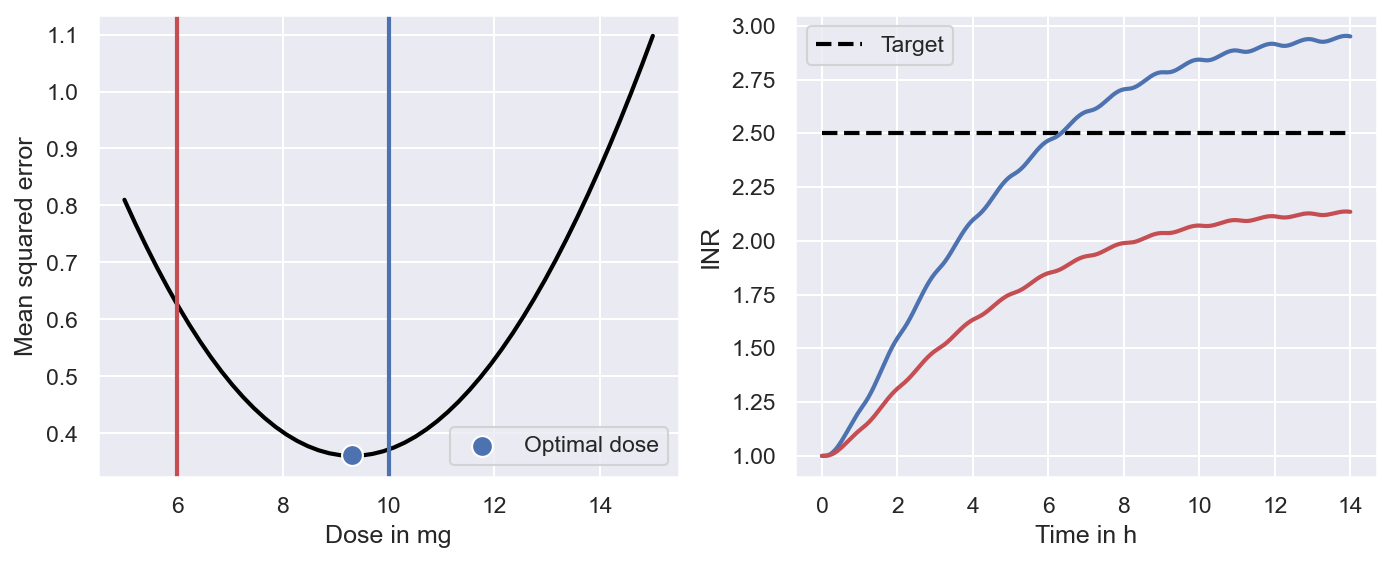

In [433]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(doses, mse, color='black', linewidth=2)
axes[0].axvline(x=dose1, color=sns.color_palette()[0], linewidth=2)
axes[0].axvline(x=dose2, color=sns.color_palette()[3], linewidth=2)

axes[1].plot(times/24, [target]*len(times), color='black', linestyle='--', linewidth=2, label='Target')
axes[1].plot(times/24, out1, color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times/24, out2, color=sns.color_palette()[3], linewidth=2)

axes[0].scatter([9.3], [0.363], color=sns.color_palette()[0], label='Optimal dose', zorder=10, edgecolor='white', s=100)

axes[0].set_ylabel('Mean squared error')
axes[0].set_xlabel('Dose in mg')
axes[1].set_ylabel('INR')
axes[1].set_xlabel('Time in h')

axes[0].legend()
axes[1].legend()

plt.savefig('illustration_mse.pdf', bbox_inches='tight')
plt.show()

In [8]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=False)

In [9]:
dose

15.0

In [10]:
days = 3
times = np.linspace(0, days, num=500) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters1 = [0, 0, parameters[4], 2, parameters[0]]
out = model.simulate(parameters=parameters1, times=times)[0]

parameters2 = [0, 0, parameters[4], 0.8, 0.1]
out2 = model.simulate(parameters=parameters2, times=times)[0]

parameters3 = [0, 0, parameters[4], 0.5, parameters[0]*2]
out3 = model.simulate(parameters=parameters3, times=times)[0]

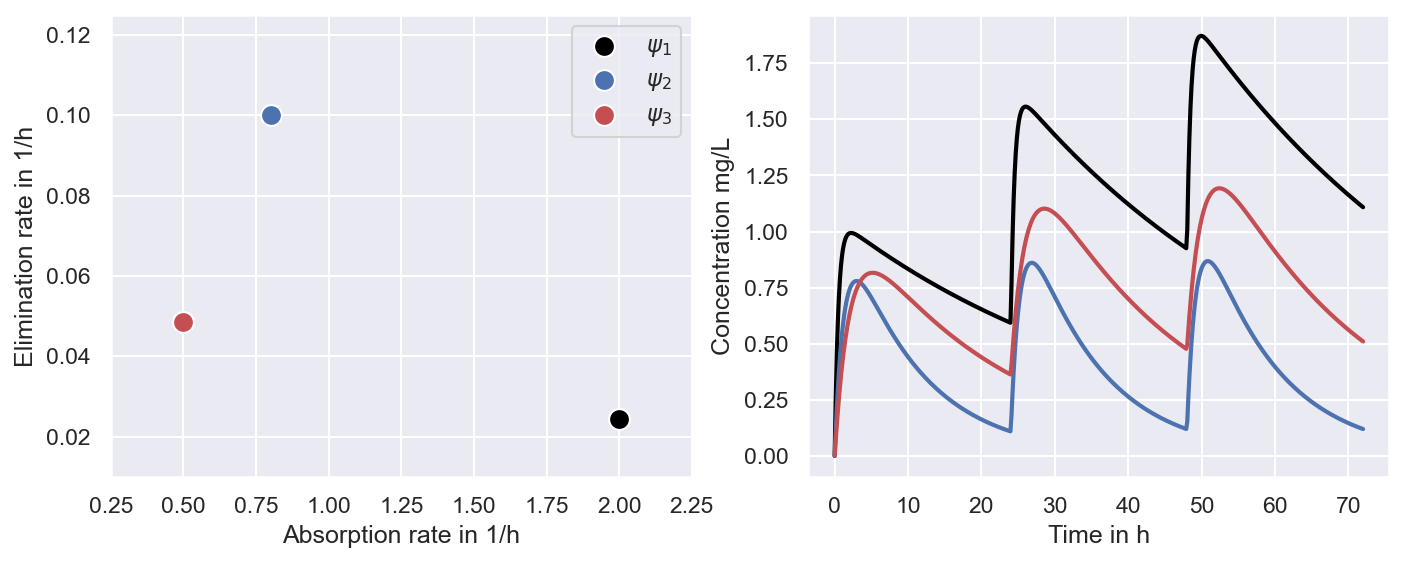

In [11]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter([parameters1[3]], [parameters1[4]], color='black', edgecolor='white', s=100, label=r'$\psi _1$')
axes[0].scatter([parameters2[3]], [parameters2[4]], color=sns.color_palette()[0], edgecolor='white', s=100, label=r'$\psi _2$')
axes[0].scatter([parameters3[3]], [parameters3[4]], color=sns.color_palette()[3], edgecolor='white', s=100, label=r'$\psi _3$')

axes[1].plot(times, out, color='black', linewidth=2)
axes[1].plot(times, out2, color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times, out3, color=sns.color_palette()[3], linewidth=2)

axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_xlabel('Absorption rate in 1/h')
axes[0].set_xlim([0.25, 2.25])
axes[0].set_ylim([0.01, 0.125])
axes[1].set_ylabel('Concentration mg/L')
axes[1].set_xlabel('Time in h')

axes[0].legend()

plt.savefig('illustration_parameter_influence.pdf', bbox_inches='tight')
plt.show()

In [12]:
import pints

np.random.seed(2)
days = 3
times = np.linspace(0, days, num=500) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters3 = [0, 0, parameters[4], 0.5, parameters[0]*2]
out3 = model.simulate(parameters=parameters3, times=times)[0]

out = out3[1::10]
meas = out + np.random.normal(size=len(out), scale=0.1)
xs = np.linspace(-0.33, 0.33)
pdfs = np.exp([pints.GaussianLogPrior(0, 0.1)([x]) for x in xs])

res = meas - out

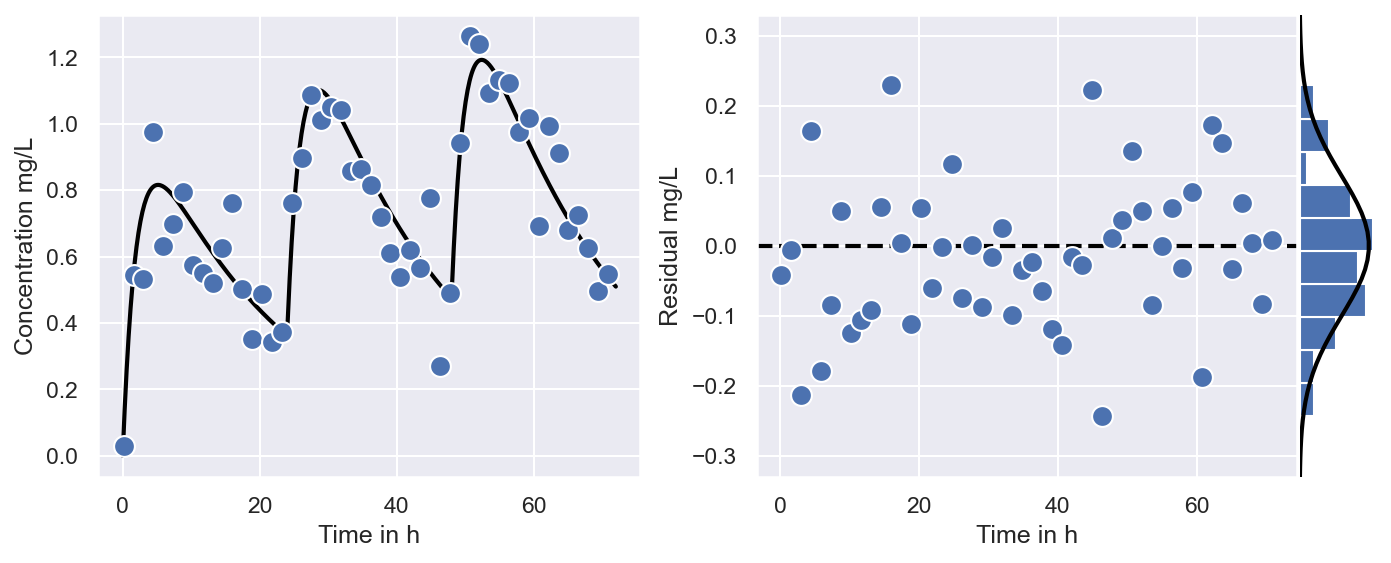

In [13]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2, width_ratios=[7, 8])
inner = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[1], wspace=0.01, width_ratios=[7, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, inner[0]))
axes.append(plt.Subplot(fig, inner[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(times, out3, color='black', linewidth=2)
axes[0].scatter(times[1::10], meas, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)

axes[1].axhline(y=0, color='black', linewidth=2, linestyle='dashed')
axes[1].scatter(times[1::10], res, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)

axes[2].hist(res, orientation='horizontal', density=True)
axes[2].plot(pdfs, xs, color='black', linewidth=2)

axes[0].set_ylabel('Concentration mg/L')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Residual mg/L')
axes[1].set_xlabel('Time in h')
axes[1].set_ylim([-0.33, 0.33])
axes[2].set_ylim([-0.33, 0.33])
axes[2].set_axis_off()

plt.savefig('illustration_measurement_model.pdf', bbox_inches='tight')
plt.show()

In [14]:
parameters1 = [0, 0, parameters[4], 0.5, parameters[0]*2.2]
parameters2 = [0, 0, parameters[4], 0.5, parameters[0]*1.5]
out1 = model.simulate(parameters=parameters1, times=times)[0]
out2 = model.simulate(parameters=parameters2, times=times)[0]

res1 = meas - out1[1::10]
res2 = meas - out2[1::10]

xs = np.linspace(-0.5, 0.5)
pdfs = np.exp([pints.GaussianLogPrior(0, 0.1)([x]) for x in xs])

# Define log-likelihood
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[1::10], observations=meas)
kes = np.linspace(1, 3) * parameters[0]
scores = [log_likelihood([0, 0, parameters[4], 0.5, ke, 0.1]) for ke in kes]

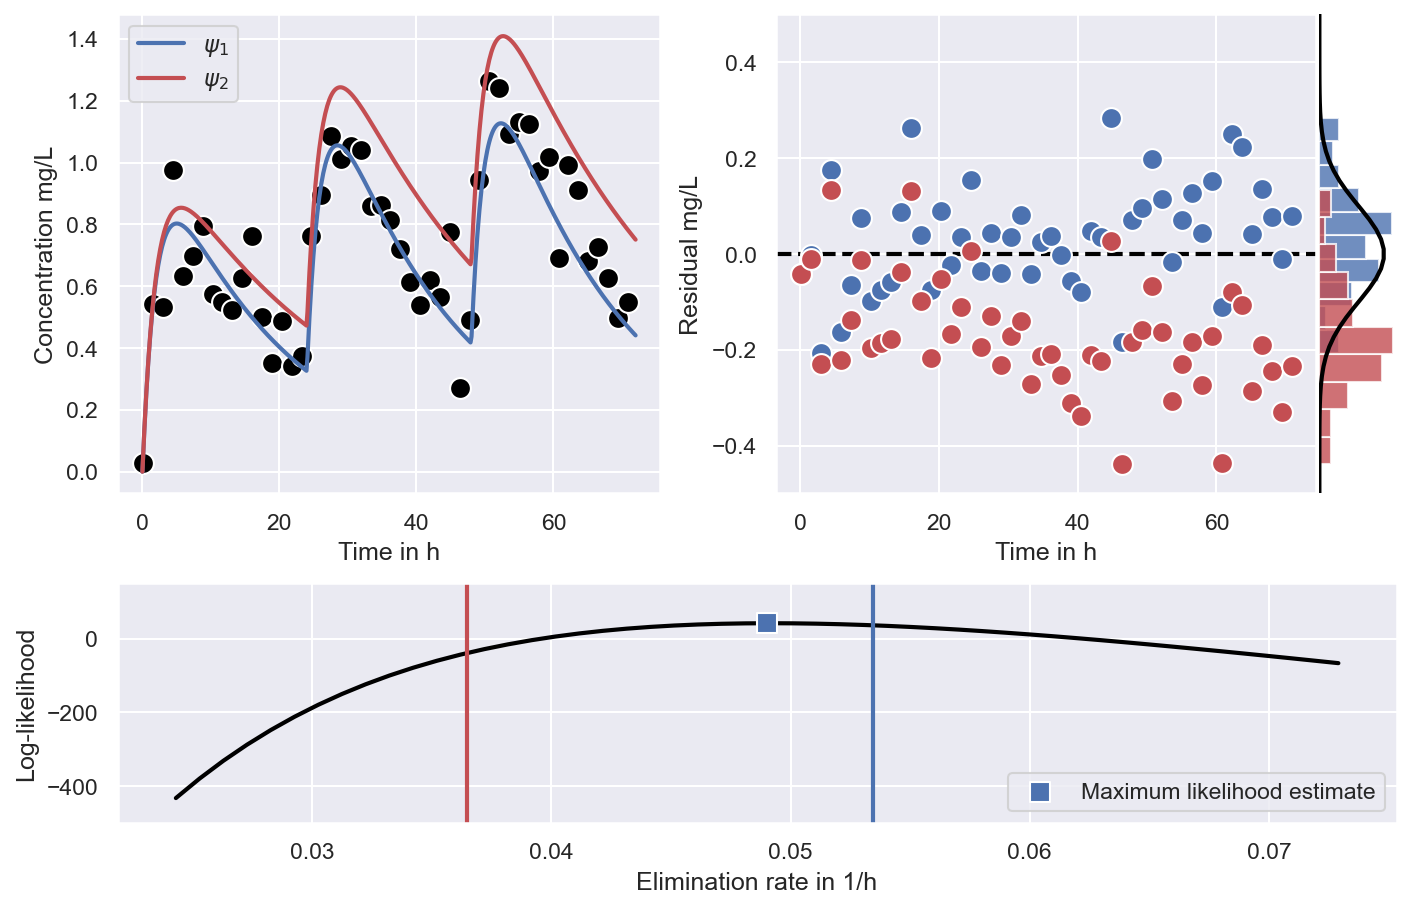

In [15]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1350 // my_dpi), dpi=150)
outer0 = gridspec.GridSpec(2, 1, hspace=0.25, height_ratios=[2, 1])
outer = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer0[0], wspace=0.2, width_ratios=[7, 8])
inner = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[1], wspace=0.01, width_ratios=[7, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, inner[0]))
axes.append(plt.Subplot(fig, inner[1]))
axes.append(plt.Subplot(fig, outer0[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(times, out1, color=sns.color_palette()[0], linewidth=2, label=r'$\psi _1$')
axes[0].plot(times, out2, color=sns.color_palette()[3], linewidth=2, label=r'$\psi _2$')
axes[0].scatter(times[1::10], meas, color='black', edgecolor='white', s=100)

axes[1].axhline(y=0, color='black', linewidth=2, linestyle='dashed')
axes[1].scatter(times[1::10], res1, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)
axes[1].scatter(times[1::10], res2, color=sns.color_palette()[3], edgecolor='white', s=100, zorder=10)

axes[2].hist(res1, orientation='horizontal', density=True, color=sns.color_palette()[0], alpha=0.8)
axes[2].hist(res2, orientation='horizontal', density=True, color=sns.color_palette()[3], alpha=0.8)
axes[2].plot(pdfs, xs, color='black', linewidth=2)

axes[3].plot(kes, scores, color='black', linewidth=2)
axes[3].axvline(x=parameters1[-1], color=sns.color_palette()[0], linewidth=2)
axes[3].axvline(x=parameters2[-1], color=sns.color_palette()[3], linewidth=2)
axes[3].scatter([0.049], [42], color=sns.color_palette()[0], label='Maximum likelihood estimate', zorder=10, edgecolor='white', s=100, marker='s')

axes[0].set_ylabel('Concentration mg/L')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Residual mg/L')
axes[1].set_xlabel('Time in h')
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_axis_off()
axes[3].set_xlabel('Elimination rate in 1/h')
axes[3].set_ylabel('Log-likelihood')
axes[3].set_ylim([-500, 150])
axes[0].legend()
axes[3].legend()

plt.savefig('illustration_mle.pdf', bbox_inches='tight')
plt.show()

In [16]:
import myokit

np.random.seed(2)
days = 3
times = np.array([0.16, 0.24, 0.32, 0.72, 0.8, 0.88]) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters3 = [0, 0, parameters[4], 2, parameters[0]*2]
out = model.simulate(parameters=parameters3, times=times)[0]
meas = out + np.random.normal(size=len(out), scale=0.1)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[:3], observations=meas[:3])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
estimates1, _ = pints.optimise(function=log_likelihood, x0=[10, 1])

log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
estimates2, _ = pints.optimise(function=log_likelihood, x0=[15, 1])

# For prediction
days = 3
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, 3*dose, 3*dose]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))

times2 = np.linspace(0, days, num=1000) * 24
model.set_dosing_regimen(regimen)
out1 = model.simulate(parameters=parameters3, times=times2)[0]
out2 = model.simulate(parameters=[0, 0, estimates1[0], 2, estimates1[1]], times=times2)[0]
out3 = model.simulate(parameters=[0, 0, estimates2[0], 2, estimates2[1]], times=times2)[0]


Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6     -16.92311 -16.92311   0:00.1
1     12    -4.194339 -4.194339   0:00.1
2     18    -4.194339 -14.68519   0:00.1
3     24    -4.194339 -55.61131   0:00.1
20    126    3.26344   3.26344    0:00.1
40    246    3.539436  3.537526   0:00.1
60    366    3.53948   3.539478   0:00.1
80    486    3.53948   3.53948    0:00.1
100   606    3.53948   3.53948    0:00.1
120   726    3.53948   3.53948    0:00.2
140   846    3.53948   3.53948    0:00.2
160   966    3.53948   3.53948    0:00.2
180   1086   3.53948   3.53948    0:00.2
200   1206   3.53948   3.53948    0:00.2
220   1326   3.53948   3.53948    0:00.2
240   1446   3.53948   3.53948    0:00.3
260   1566   3.53948   3.53948    0:00.3
279   1674   3.53948   3.53948    0:00.3
Halting: No significant change for 200 iterations.
Maximising LogPDF
Using Covariance Matrix 

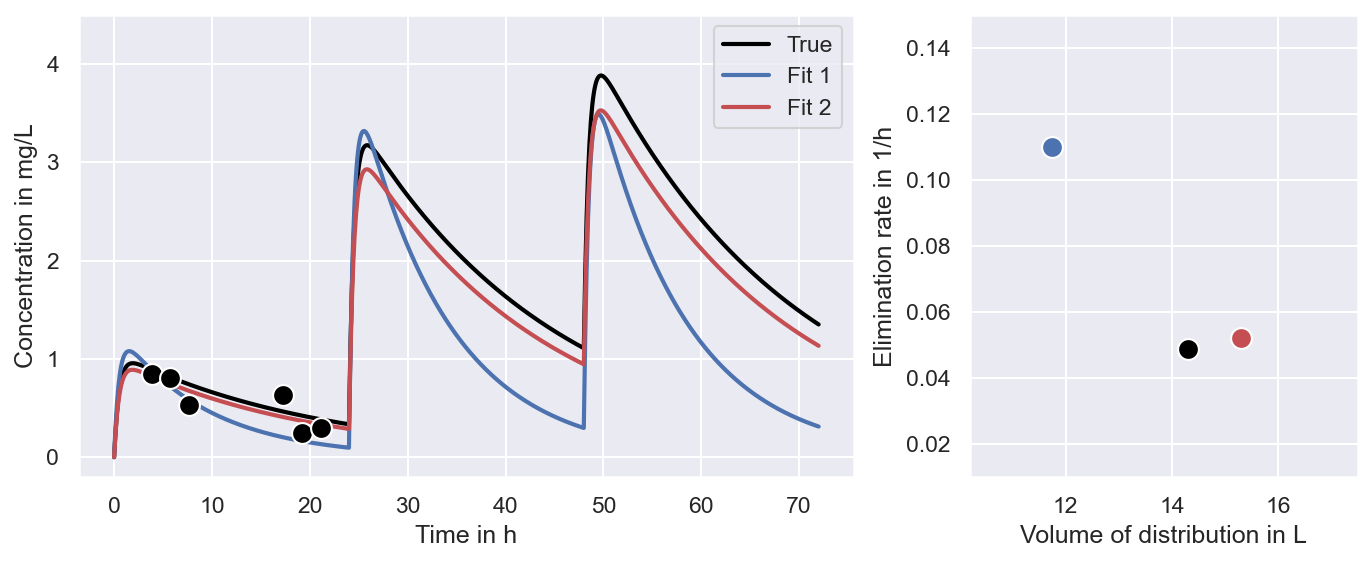

In [17]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter(times, meas, color='black', edgecolor='white', s=100, zorder=100)

axes[1].scatter([parameters3[2]], [parameters3[4]], color='black', edgecolor='white', s=100)
axes[1].scatter([estimates1[0]], [estimates1[1]], color=sns.color_palette()[0], edgecolor='white', s=100)
axes[1].scatter([estimates2[0]], [estimates2[1]], color=sns.color_palette()[3], edgecolor='white', s=100)

axes[0].plot(times2, out1, color='black', linewidth=2, label='True')
axes[0].plot(times2, out2, color=sns.color_palette()[0], linewidth=2, label='Fit 1')
axes[0].plot(times2, out3, color=sns.color_palette()[3], linewidth=2, label='Fit 2')

axes[1].set_xlabel('Volume of distribution in L')
axes[1].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([-0.2, 4.5])
axes[1].set_ylim([0.01, 0.15])
axes[1].set_xlim([10.2, 17.5])
axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in h')
axes[0].legend()

plt.savefig('illustration_parametric_uncertainty.pdf', bbox_inches='tight')
plt.show()

In [18]:
# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[:3], observations=meas[:3])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
log_posterior = chi.LogPosterior(log_likelihood, pints.ComposedLogPrior(pints.GaussianLogPrior(14.3, 2), pints.GaussianLogPrior(0.5, 0.1)))
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior1 = controller.run(10000, log_to_screen=True)

log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
log_posterior = chi.LogPosterior(log_likelihood, pints.ComposedLogPrior(pints.GaussianLogPrior(14.3, 2), pints.GaussianLogPrior(0.5, 0.1)))
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior2 = controller.run(10000, log_to_screen=True)

estimates3 = np.vstack([
    posterior1['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior1['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

estimates4 = np.vstack([
    posterior2['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior2['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# For prediction
days = 3
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, 3*dose, 3*dose]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))

times2 = np.linspace(0, days, num=1000) * 24
model.set_dosing_regimen(regimen)
out1 = model.simulate(parameters=parameters3, times=times2)[0]

# Simulate posterior predictive
out4 = np.empty(shape=(len(estimates3), len(times2)))
out5 = np.empty(shape=(len(estimates4), len(times2)))
for ids in range(len(estimates3)):
    out4[ids] = model.simulate(parameters=[0, 0, estimates3[ids, 0], 2, estimates3[ids, 1]], times=times2)[0]
    out5[ids] = model.simulate(parameters=[0, 0, estimates4[ids, 0], 2, estimates4[ids, 1]], times=times2)[0]


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0.5        0:00.0
2     9      0.667     0         0.333      0:00.0
3     12     0.75      0.25      0.5        0:00.0
20    63     0.571     0.476     0.429      0:00.0
40    123    0.463     0.366     0.293      0:00.0
60    183    0.361     0.361     0.311      0:00.0
80    243    0.345679  0.407     0.308642   0:00.0
100   303    0.356     0.406     0.297      0:00.0
120   363    0.364     0.397     0.306      0:00.0
140   423    0.326     0.39      0.312      0:00.1
160   483    0.298     0.378882  0.329      0:00.1
180   543    0.309     0.343     0.326      0:00.1
Initial phase completed.
200   603    0.299     0.348     0.313      0:00.1
220   663    0.317     0.361991  0.33       0:00.1
240   723    0.344     0.357     0.353      0:00.1
260   783   

array([[<Axes: title={'center': 'central.size'}>,
        <Axes: title={'center': 'central.size'}>],
       [<Axes: title={'center': 'global.elimination_rate'}>,
        <Axes: title={'center': 'global.elimination_rate'}>]],
      dtype=object)

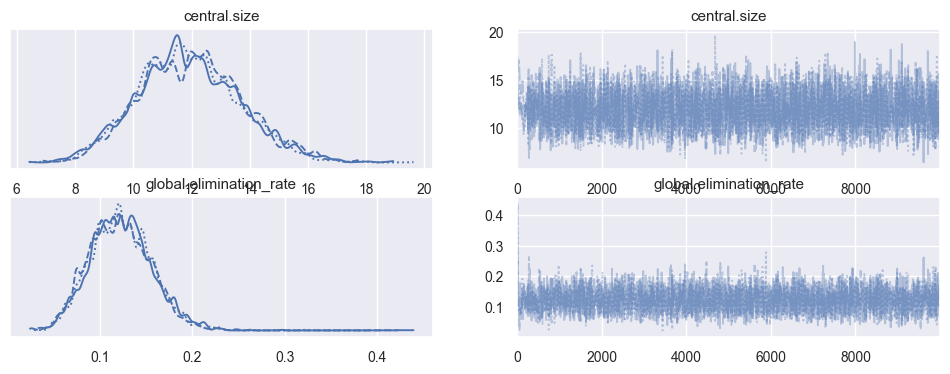

In [19]:
import arviz as az

az.plot_trace(posterior1)

array([[<Axes: title={'center': 'central.size'}>,
        <Axes: title={'center': 'central.size'}>],
       [<Axes: title={'center': 'global.elimination_rate'}>,
        <Axes: title={'center': 'global.elimination_rate'}>]],
      dtype=object)

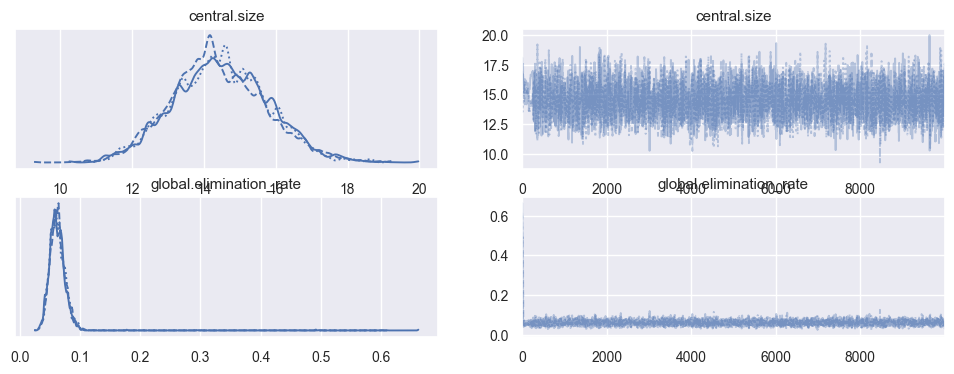

In [20]:
az.plot_trace(posterior2)

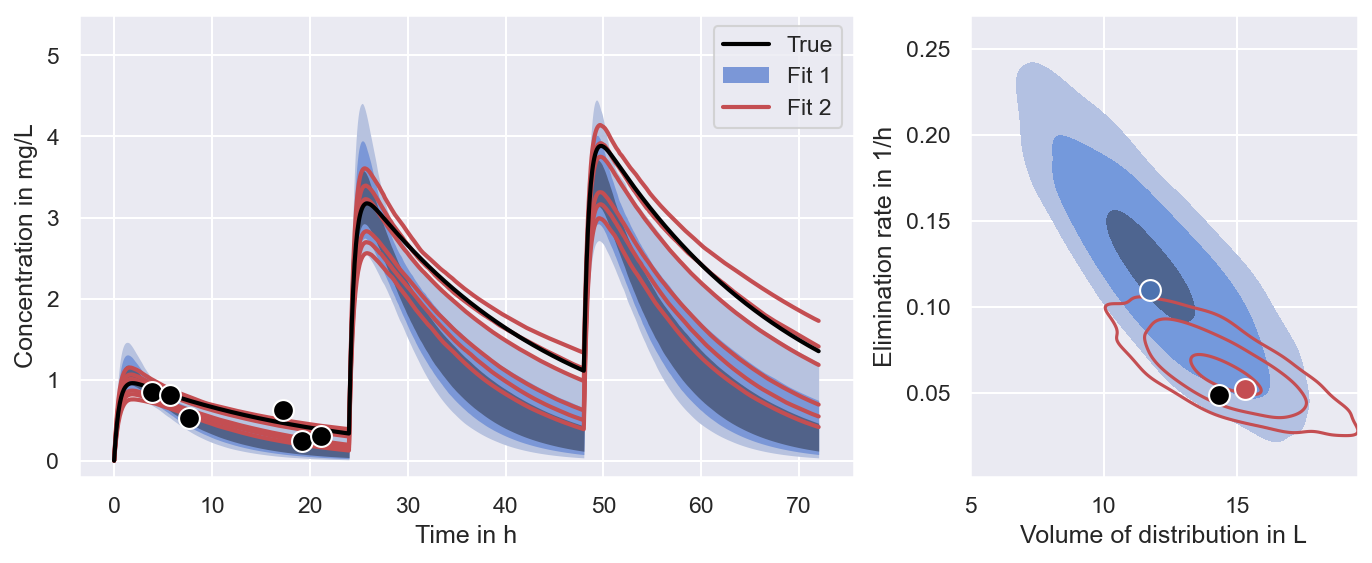

In [21]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter(times, meas, color='black', edgecolor='white', s=100, zorder=100)

axes[1].scatter([parameters3[2]], [parameters3[4]], color='black', edgecolor='white', s=100, zorder=100)
axes[1].scatter([estimates1[0]], [estimates1[1]], color=sns.color_palette()[0], edgecolor='white', s=100, zorder=100)
axes[1].scatter([estimates2[0]], [estimates2[1]], color=sns.color_palette()[3], edgecolor='white', s=100, zorder=100)
sns.kdeplot(x=estimates3[:, 0], y=estimates3[:, 1], color=sns.color_palette()[0], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates4[:, 0], y=estimates4[:, 1], color=sns.color_palette()[3], ax=axes[1], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)

axes[0].plot(times2, out1, color='black', linewidth=2, label='True', zorder=99)
axes[0].fill_between(times2, np.percentile(out4, 0.5, axis=0), np.percentile(out4, 99.5, axis=0), color='#B7C2DF', linewidth=0)
axes[0].fill_between(times2, np.percentile(out4, 5, axis=0), np.percentile(out4, 95, axis=0), color='#7B97D7', linewidth=0, label='Fit 1')
axes[0].fill_between(times2, np.percentile(out4, 33.3/2, axis=0), np.percentile(out4, 100-33.3/2, axis=0), color='#516289', linewidth=0)
axes[0].plot(times2, np.percentile(out5, 0.5, axis=0), color=sns.color_palette()[3], linewidth=2, label='Fit 2')
axes[0].plot(times2, np.percentile(out5, 5, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 33.3/2, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 100-33.3/2, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 95, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 99.5, axis=0), color=sns.color_palette()[3], linewidth=2)

axes[1].set_xlabel('Volume of distribution in L')
axes[1].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([-0.2, 5.5])
axes[1].set_ylim([0.001, 0.27])
axes[1].set_xlim([5, 19.5])
axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in h')
axes[0].legend()

plt.savefig('illustration_parametric_uncertainty2.pdf', bbox_inches='tight')
plt.show()

Visualise MCMC

In [22]:
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'central.size': 14.3,
    'Sigma': 0.1
})
log_prior = pints.GaussianLogPrior(0.5, 0.1)
log_posterior = chi.LogPosterior(log_likelihood, log_prior)

In [23]:
np.random.seed(3)
n_traces = 1000
n_iterations = 201
initial_points = log_prior.sample(n=n_traces)
traces = np.empty(shape=(n_traces, n_iterations))
for idt in range(n_traces):
    method = pints.MetropolisRandomWalkMCMC(x0=[initial_points[idt]], sigma0=0.002)
    for idi in range(n_iterations):
        sample = method.ask()
        f = log_posterior(sample)
        sample, _, isAccepted = method.tell(f)
        if isAccepted or (idi == 0):
            traces[idt, idi] = sample[0]
        else:
            traces[idt, idi] = traces[idt, idi-1]

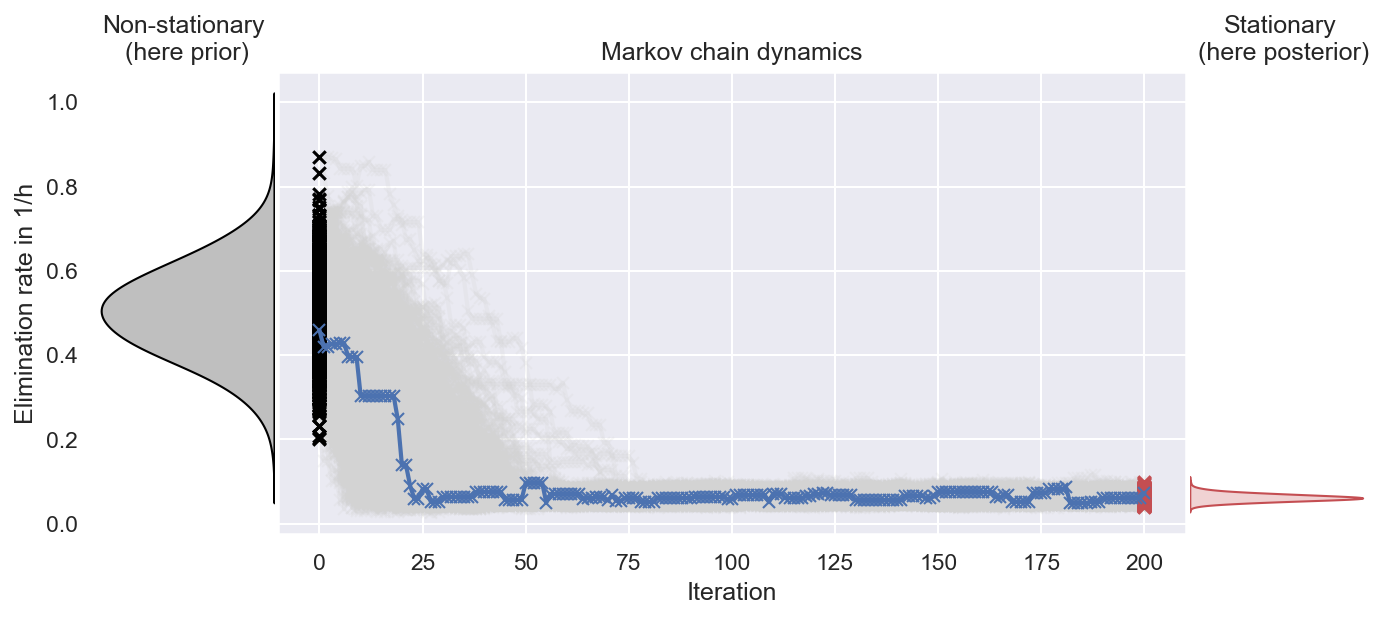

In [24]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 5, 1], wspace=0.01)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[2]))

axes[0].sharey(axes[1])
axes[1].sharey(axes[2])

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot traces
iterations = np.arange(n_iterations)
for trace in traces:
    axes[1].plot(
        iterations, trace, color='lightgrey', marker='x', linewidth=2, alpha=0.2)
axes[1].plot(
    iterations, traces[15], color=sns.color_palette()[0], marker='x', linewidth=2, zorder=11)
axes[1].scatter(
    [0]*n_traces, traces[:, 0], color='black', marker='x', zorder=10)
axes[1].scatter(
    [200]*n_traces, traces[:, -1], color=sns.color_palette()[3], marker='x', zorder=10)

sns.kdeplot(y=traces[:, 0], color='black', ax=axes[0], bw_adjust=2, fill=True)
sns.kdeplot(y=traces[:, -1], color=sns.color_palette()[3], ax=axes[2], bw_adjust=2, fill=True)

axes[0].invert_xaxis()
axes[1].tick_params(axis='y', pad=90)
axes[1].set_ylabel('Elimination rate in 1/h')
axes[1].set_xlabel('Iteration')
axes[0].set_axis_off()
axes[2].set_axis_off()
axes[0].set_title('Non-stationary\n (here prior)')
axes[1].set_title('Markov chain dynamics')
axes[2].set_title('Stationary\n (here posterior)')

plt.savefig('illustration_mcmc.png', bbox_inches='tight')
plt.savefig('illustration_mcmc.pdf', bbox_inches='tight')
plt.show()

In [25]:
np.random.seed(3)
n_traces = 4
n_iterations = 800
initial_points = [0.2, 0.2, 0.2, 0.2]
sigmas = [1E-5, 1E-4, 1E-3, 1E-2]
traces = np.empty(shape=(n_traces, n_iterations))
for idt in range(n_traces):
    method = pints.MetropolisRandomWalkMCMC(x0=[initial_points[idt]], sigma0=sigmas[idt])
    for idi in range(n_iterations):
        sample = method.ask()
        f = log_posterior(sample)
        sample, _, isAccepted = method.tell(f)
        if isAccepted or (idi == 0):
            traces[idt, idi] = sample[0]
        else:
            traces[idt, idi] = traces[idt, idi-1]

random_draw = np.random.normal(loc=np.mean(traces[1, 100:]), scale=np.std(traces[1, 100:], ddof=1), size=800)

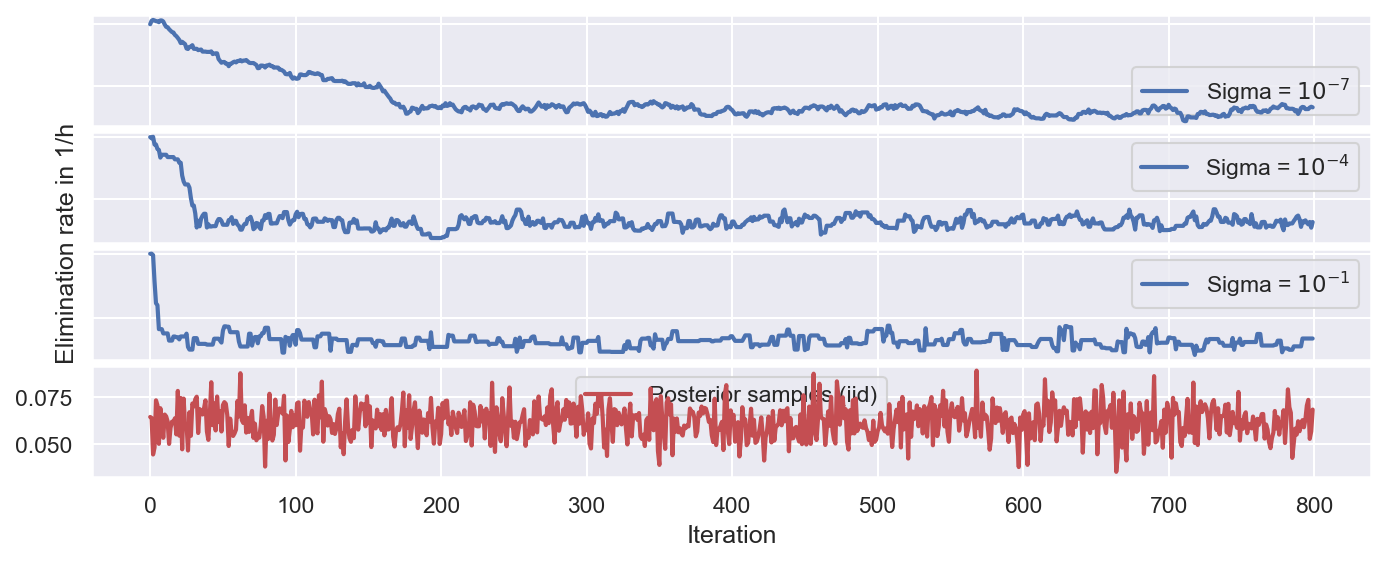

In [26]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(4, 1, hspace=0.05)

# Create axes for marginal posteriors
axes = []
for i in range(4):
    axes.append(plt.Subplot(fig, outer[i]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)


axes[0].plot(
    np.arange(0, 800), traces[0], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-7}$')
axes[1].plot(
    np.arange(0, 800), traces[1], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-4}$')
axes[2].plot(
    np.arange(0, 800), traces[2], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-1}$')
axes[3].plot(
    np.arange(0, 800), random_draw, color=sns.color_palette()[3], zorder=10, linewidth=2, label='Posterior samples (iid)')

axes[1].set_ylabel('Elimination rate in 1/h')
axes[1].yaxis.set_label_coords(x=-0.01, y=0)
axes[3].set_xlabel('Iteration')
axes[0].xaxis.set_ticklabels([])
axes[1].xaxis.set_ticklabels([])
axes[0].yaxis.set_ticklabels([])
axes[1].yaxis.set_ticklabels([])
axes[2].yaxis.set_ticklabels([])
axes[0].legend(loc='lower right')
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.savefig('illustration_inset.png', bbox_inches='tight')

plt.show()

Visualise population model for varying ke and v parameters.

In [27]:
model2 = chi.library.ModelLibrary().one_compartment_pk_model()
model2.set_administration(compartment='central', direct=False)
model2 = chi.ReducedMechanisticModel(model2)
model2.fix_parameters({
    'central.drug_amount': 0.001,
    'dose.drug_amount': 0.001,
    'dose.absorption_rate': 2
})
population_model = chi.LogNormalModel(n_dim=2)
pop_parameters = [np.exp(-1.7), np.exp(2.7), 0.1, 0.1]

/var/folders/v4/97p50d2s59d8tf5xm5h27fjh0000gp/T/ipykernel_15661/72184441.py:4: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  model2.fix_parameters({


In [28]:
# Sample indiviudals
n_samples = 1000
pop_parameters = [2.6, -3.7, 0.1, 0.1]
sampled_parameters = population_model.sample(parameters=pop_parameters, n_samples=n_samples, seed=9)

# Simulate treament responses
n_times = 200
times = np.linspace(0, 72, n_times)
out = np.empty(shape=(n_samples, n_times))
model2.set_dosing_regimen(dose=22, period=24)
for idp, p in enumerate(sampled_parameters):
    out[idp] = model2.simulate(p, times)[0]

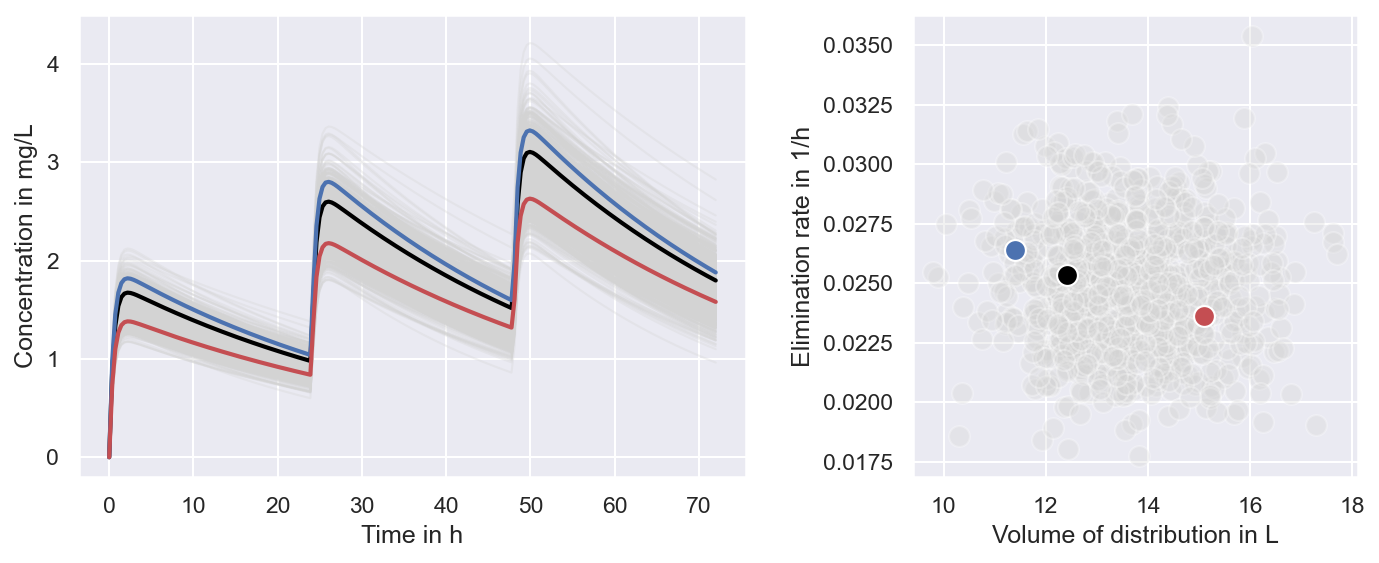

In [29]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

for p in sampled_parameters:
    axes[0].scatter([p[0]], [p[1]], color='lightgrey', edgecolor='white', s=100, alpha=0.3)

axes[0].scatter([sampled_parameters[0, 0]], [sampled_parameters[0, 1]], color='black', edgecolor='white', s=100)
axes[0].scatter([sampled_parameters[1, 0]], [sampled_parameters[1, 1]], color=sns.color_palette()[0], edgecolor='white', s=100)
axes[0].scatter([sampled_parameters[2, 0]], [sampled_parameters[2, 1]], color=sns.color_palette()[3], edgecolor='white', s=100)

for o in out:
    axes[1].plot(times, o, color='lightgrey', linewidth=1, alpha=0.3)

axes[1].plot(times, out[0], color='black', linewidth=2, label='ID 1')
axes[1].plot(times, out[1], color=sns.color_palette()[0], linewidth=2, label='ID 2')
axes[1].plot(times, out[2], color=sns.color_palette()[3], linewidth=2, label='ID 3')

axes[0].set_xlabel('Volume of distribution in L')
axes[0].set_ylabel('Elimination rate in 1/h')
axes[1].set_ylim([-0.2, 4.5])
# axes[1].set_ylim([0.01, 0.15])
# axes[1].set_xlim([10.2, 17.5])
axes[1].set_ylabel('Concentration in mg/L')
axes[1].set_xlabel('Time in h')

plt.savefig('illustration_parametric_uncertainty.png', bbox_inches='tight')
plt.show()

This shows that a good prior for MIPD is the variability of the model parameters. To make use of this variability, we can formulate a model of the inter-individual variability. Here, this model may be to assume that the volume of distribution is normally distributed in the population and that the elimination rate is normally distirbuted
$$
p(\psi / \theta ) = \mathcal{N}(k_e / \mu _{k_e}, \sigma ^2_{k_e}) \mathcal{N}(v / \mu _{v}, \sigma ^2_{v}).
$$

If we knew the parameters across individuals, the estimation of the population model parameters would follow analogously to the parameter estimation that we discussed in sections.... The only difference is that the data for the parameter estimation would not be treatment response measurements, but the model parameters of the individuals, $\psi$. Let us denote the parameters across $N$ individuals by $\Psi = (\psi_1, \psi _2, \ldots, \psi_N)$. Then the log-likelihood of the population model parameters under the population model is given by
$$
    \log p(\Psi / \theta ) = \sum _{n=1}^N \log p(\psi_n / \theta ).
$$
Note that this definition of the likelihood is in complete analogy. Similarly to the limited number of measurements, also a limited number of individuals induces uncertainty into the population-level estimates. 

In practice, we don't know the parameters of indiviudals, of course. Instead, we need to infer them from measurements - measurements collected, for example, during clinical trials. So, how can we extend the above inference scheme when the data is uncertain?

-> hierarchical inference

$$
p(y, \psi / \theta, t, r) = p(y / \psi, t, r) \, p(\psi / \theta ).
$$

$$
\log p(\mathcal{D}, \Psi / \theta) = \sum _{n=1}^N \log p(\mathcal{D}_n / \psi _n) + \sum _{n=1}^N \log p(\psi_n / \theta ).
$$

$$
\log p(\theta, \Psi / \mathcal{D}) = \sum _{n=1}^N \log p(\mathcal{D}_n / \psi _n) + \sum _{n=1}^N \log p(\psi_n / \theta ) + \log p(\theta) - \log p(\mathcal{D}).
$$

Let's say we do inference on each individual separately with some prior $p(\psi)$. For simplicity, the prior is the same across all inferences. Can we obtain the same / similar posterior for the population model parmaeters?

$$
\log p(\psi _n / \mathcal{D}_n) = \log p(\mathcal{D}_n / \psi _n) + \log p(\psi _n) - \log p(D_n)
$$

In [30]:
# Define model
population_model = define_hamberg_population_model()
ke_model = population_model._population_models[0]
ec50_model = population_model._population_models[1]

# Sample ke for fixed CYP and different ages
n_samples_per_age = 10000
pop_parameters1 = [-3.9, 0.1, 0.5, 0.8, 0.08]
ages = np.linspace(50, 80, num=50)
samples = np.empty(shape=(50, n_samples_per_age))
for ida, age in enumerate(ages):
    samples[ida] = ke_model.sample(
        parameters=pop_parameters1,
        n_samples=n_samples_per_age,
        covariates=[0, age]
    ).flatten()

n_samples_per_g = 1000
pop_parameters2 = [1.45, 0.2, 0.65]
genotypes = [0, 1, 2]
samples2 = np.empty(shape=(3, n_samples_per_g))
for ida, g in enumerate(genotypes):
    samples2[ida] = ec50_model.sample(
        parameters=pop_parameters2,
        n_samples=n_samples_per_g,
        covariates=[g]
    ).flatten()

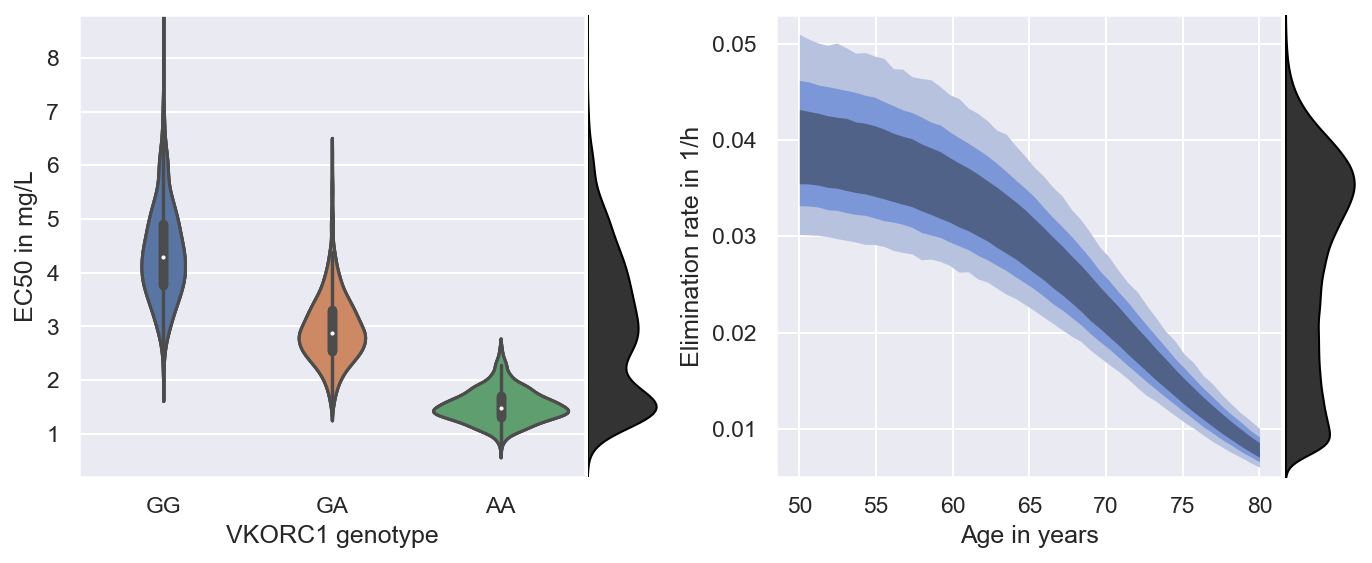

In [31]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.2)
inner1 = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[1], wspace=0.01, width_ratios=[7, 1])
inner2 = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[0], wspace=0.01, width_ratios=[7, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, inner1[0]))
axes.append(plt.Subplot(fig, inner1[1]))
axes.append(plt.Subplot(fig, inner2[0]))
axes.append(plt.Subplot(fig, inner2[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].fill_between(ages, np.percentile(samples, 0.5, axis=1), np.percentile(samples, 99.5, axis=1), color='#B7C2DF', linewidth=0)
axes[0].fill_between(ages, np.percentile(samples, 5, axis=1), np.percentile(samples, 95, axis=1), color='#7B97D7', linewidth=0)
axes[0].fill_between(ages, np.percentile(samples, 33.3/2, axis=1), np.percentile(samples, 100-33.3/2, axis=1), color='#516289', linewidth=0)

genotypes = ['GG', 'GA', 'AA']
df = pd.DataFrame({
    'VKORC1 genotype': ['GG']*n_samples_per_g + ['GA']*n_samples_per_g + ['AA']*n_samples_per_g,
    'EC50 in mg/L': list(samples2[0]) + list(samples2[1]) + list(samples2[2])
})
for ida, g in enumerate(genotypes):
    sns.violinplot(data=df, x='VKORC1 genotype', y='EC50 in mg/L', ax=axes[2])

sns.kdeplot(y=samples2.flatten(), color='black', alpha=0.8, ax=axes[3], fill=True)

sns.kdeplot(y=samples.flatten(), color='black', alpha=0.8, ax=axes[1], fill=True)

axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_xlabel('Age in years')
axes[2].set_ylabel('EC50 in mg/L')
axes[2].set_xlabel('VKORC1 genotype')
axes[0].set_ylim([0.005, 0.053])
axes[1].set_ylim([0.005, 0.053])
axes[1].set_axis_off()
axes[2].set_ylim([0.2, 8.8])
axes[3].set_ylim([0.2, 8.8])
axes[3].set_axis_off()

plt.savefig('illustration_covariate_population_model.pdf', bbox_inches='tight')
plt.show()

## Illustrate sources of uncertainty for NLME inference

Estimate population-level parameter without uncertainty in individual-level parameters (many individuals)

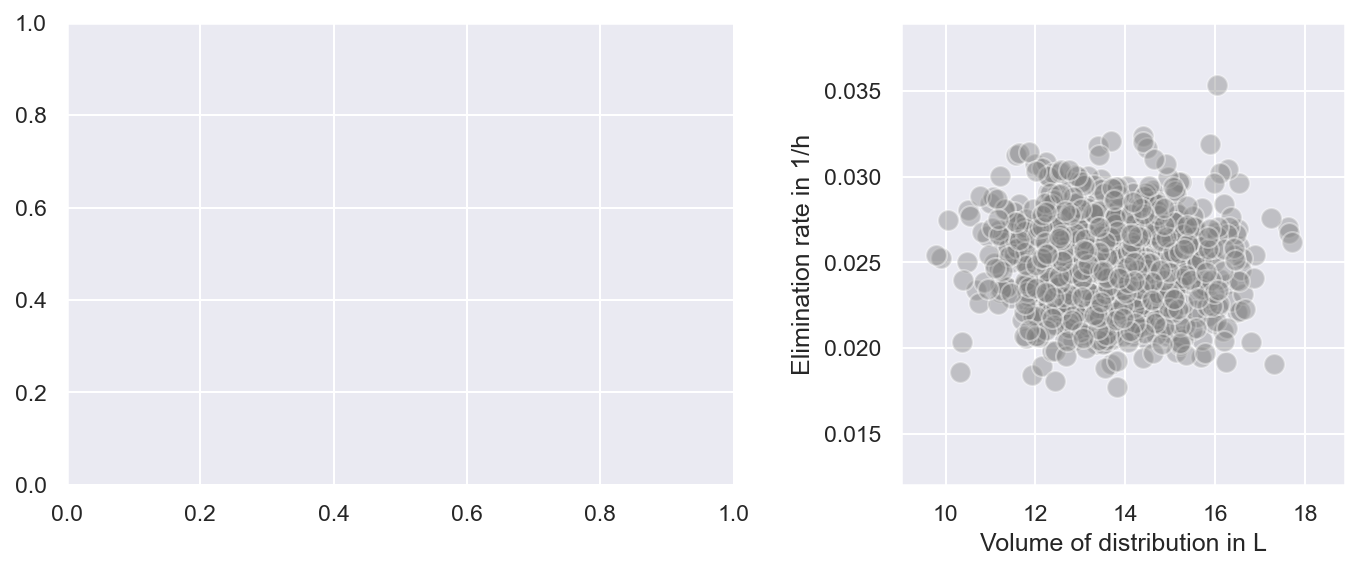

In [246]:

population_model = chi.LogNormalModel(n_dim=2)
pop_parameters = [np.exp(-1.7), np.exp(2.7), 0.1, 0.1]
n_samples = 1000
pop_parameters = [2.6, -3.7, 0.1, 0.1]
sampled_parameters1 = population_model.sample(parameters=pop_parameters, n_samples=n_samples, seed=9)

# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

for p in sampled_parameters1:
    axes[0].scatter([p[0]], [p[1]], color='grey', edgecolor='white', s=100, alpha=0.4)

axes[0].set_xlabel('Volume of distribution in L')
axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([0.012, 0.039])
axes[0].set_xlim([9, 18.9])

plt.savefig('illustration_individual_estimates_1.png', bbox_inches='tight')
plt.show()

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0.333     0.333     0.667      0:00.0
3     12     0.5       0.5       0.75       0:00.0
20    63     0.524     0.714     0.429      0:00.0
40    123    0.561     0.61      0.463      0:00.0
60    183    0.508     0.557377  0.426      0:00.0
80    243    0.432     0.531     0.395      0:00.0
100   303    0.406     0.505     0.337      0:00.0
120   363    0.397     0.545     0.298      0:00.0
140   423    0.348     0.504     0.291      0:00.0
160   483    0.329     0.472     0.261      0:00.0
180   543    0.309     0.42      0.243      0:00.1
Initial phase completed.
200   603    0.284     0.388     0.229      0:00.1
220   663    0.299     0.357     0.226      0:00.1
240   723    0.303     0.369     0.232      0:00.1
260   783   

(<Figure size 1200x800 with 8 Axes>,
 array([[<Axes: xlabel='Parameter1', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter1'>],
        [<Axes: xlabel='Parameter2', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter2'>],
        [<Axes: xlabel='Parameter3', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter3'>],
        [<Axes: xlabel='Parameter4', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter4'>]], dtype=object))

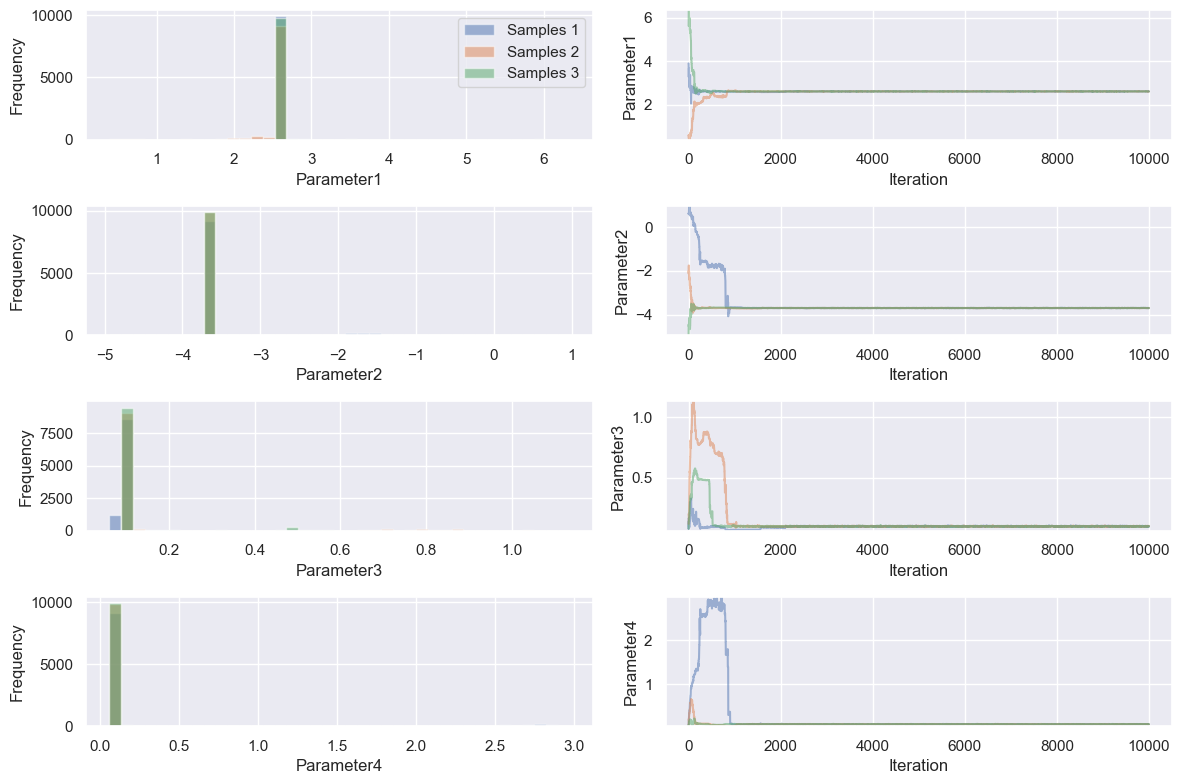

In [223]:
# Estimate model parameters
class LogNormal(pints.LogPDF):
    def __init__(self, data):
        self._data = data
        self._model = chi.LogNormalModel(n_dim=2)

    def __call__(self, parameters):
        score = self._model.compute_log_likelihood(parameters=parameters, observations=self._data)
        return score

    def n_parameters(self):
        return 4

    def get_parameter_names(self):
        return self._model.get_parameter_names()


# Define posterior
log_priors = [
    pints.GaussianLogPrior(np.log(10), 3),
    pints.GaussianLogPrior(np.log(0.2), 3),
    pints.LogNormalLogPrior(np.log(0.1), 0.3),
    pints.LogNormalLogPrior(np.log(0.1), 0.5)
]
log_prior = pints.ComposedLogPrior(*log_priors)
log_posterior = pints.LogPosterior(log_likelihood=LogNormal(sampled_parameters1), log_prior=log_prior)
controller = pints.MCMCController(log_posterior, chains=3, x0=log_prior.sample(3))
samples1 = controller.run()

pints.plot.trace(samples1)


Estimate population-level parameter without uncertainty in individual-level parameters (few individuals)

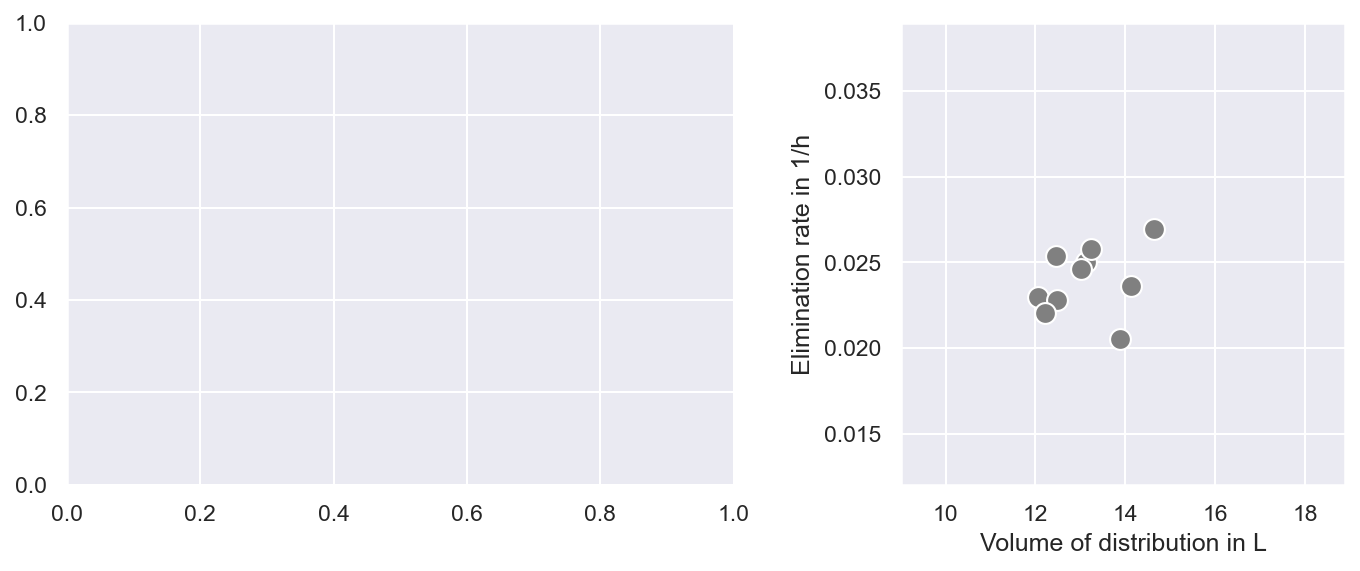

In [247]:

n_samples = 10
sampled_parameters2 = population_model.sample(parameters=pop_parameters, n_samples=n_samples, seed=10)

# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

for p in sampled_parameters2:
    axes[0].scatter([p[0]], [p[1]], color='grey', edgecolor='white', s=100)

axes[0].set_xlabel('Volume of distribution in L')
axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([0.012, 0.039])
axes[0].set_xlim([9, 18.9])

plt.savefig('illustration_individual_estimates_2.png', bbox_inches='tight')
plt.show()

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.0
2     9      0         0.333     0          0:00.0
3     12     0         0.5       0          0:00.0
20    63     0.333     0.333     0.19       0:00.0
40    123    0.341     0.22      0.317      0:00.0
60    183    0.295082  0.164     0.344      0:00.0
80    243    0.308642  0.148     0.333      0:00.0
100   303    0.347     0.119     0.297      0:00.0
120   363    0.397     0.0992    0.256      0:00.0
140   423    0.433     0.0851    0.234      0:00.0
160   483    0.484472  0.0745    0.211      0:00.0
180   543    0.514     0.0663    0.198895   0:00.0
Initial phase completed.
200   603    0.537     0.0597    0.189      0:00.0
220   663    0.534     0.0814    0.208      0:00.0
240   723    0.544     0.120332  0.232      0:00.0
260   783   

(<Figure size 1200x800 with 8 Axes>,
 array([[<Axes: xlabel='Parameter1', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter1'>],
        [<Axes: xlabel='Parameter2', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter2'>],
        [<Axes: xlabel='Parameter3', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter3'>],
        [<Axes: xlabel='Parameter4', ylabel='Frequency'>,
         <Axes: xlabel='Iteration', ylabel='Parameter4'>]], dtype=object))

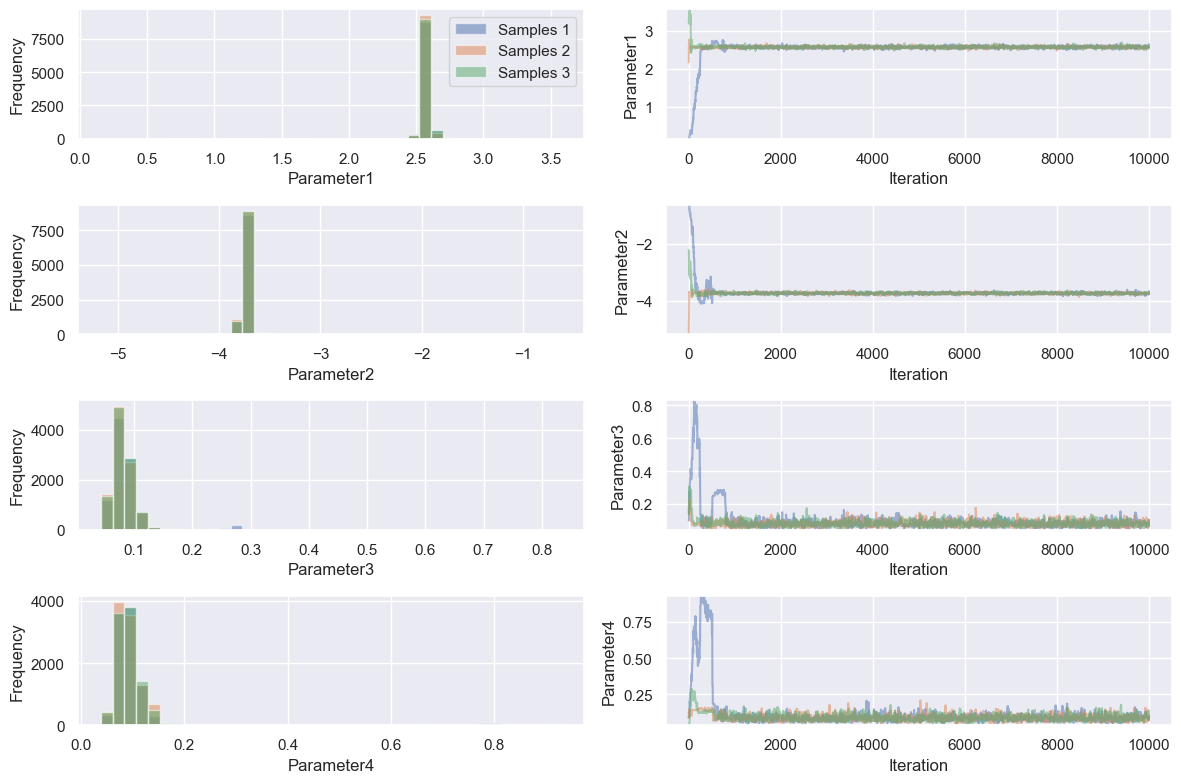

In [224]:
# Define posterior
log_posterior = pints.LogPosterior(log_likelihood=LogNormal(sampled_parameters2), log_prior=log_prior)
controller = pints.MCMCController(log_posterior, chains=3, x0=log_prior.sample(3))
samples2 = controller.run()

pints.plot.trace(samples2)


Estimate population-level parameter with uncertainty in individual-level parameters (few individuals)

In [233]:
n_samples = 50
sampled_parameters3 = population_model.sample(parameters=pop_parameters, n_samples=n_samples, seed=10)

In [239]:
population_model = chi.ComposedPopulationModel(
    [chi.LogNormalModel(n_dim=2), chi.PooledModel()])

model2.set_dosing_regimen(dose=22, period=24)
predictive_model = chi.PredictiveModel(model2, error_models=chi.LogNormalErrorModel())
predictive_model.set_dosing_regimen(dose=22, period=24)

# Simulate measurements
data = None
times = np.array([0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88]) * 24
for idp, parameters in enumerate(sampled_parameters3):
    df = predictive_model.sample(times=times, parameters=[parameters[0], parameters[1], 0.1], return_df=True)
    dr = predictive_model.get_dosing_regimen()
    df = pd.concat([df, dr])
    df.ID = idp
    if data is not None:
        data = pd.concat([data, df])
    else:
        data = df

In [240]:
# Infer parameters
problem = chi.ProblemModellingController(model2, chi.LogNormalErrorModel())
problem.set_population_model(population_model)
problem.set_data(data)
problem.fix_parameters({'Pooled Sigma log': 0.1})
problem.set_log_prior(log_prior)
log_posterior = problem.get_log_posterior()

# Estimate parameters
controller = chi.SamplingController(log_posterior, seed=2)
controller.set_n_runs(1)
controller.set_sampler(pints.NoUTurnMCMC)
controller.set_parallel_evaluation(False)
samples3 = controller.run(1500, log_to_screen=True)

Using No-U-Turn MCMC
Generating 1 chains.
Running in sequential mode.


/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_population_models.py:2296: RuntimeWarning: invalid value encountered in log
  np.log(2 * np.pi * vars) / 2 + np.log(observations)
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_population_models.py:2297: RuntimeWarning: invalid value encountered in log
  + (np.log(observations) - mus)**2 / 2 / vars)
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_population_models.py:2382: RuntimeWarning: invalid value encountered in log
  dpsi = - ((np.log(psi) - mus) / vars + 1) / psi
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_population_models.py:2383: RuntimeWarning: invalid value encountered in log
  dmus = (np.log(psi) - mus) / vars
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_population_models.py:2384: RuntimeWarning: invalid value encountered in log
  dstd = (-1 + (np.log(psi) - mus)**2 / vars) / np.sqrt(v

Iter. Eval. Accept.   Steps. Time m:s
0     8      0.375    2        0:51.9
1     9      0.25     1        0:51.9
2     10     0.25     1        0:51.9
3     11     0.25     1        0:51.9
20    7488   0.727    416      2:03.0
40    26252  0.753    894      4:44.9
60    46712  0.757    975      7:43.1
80    67172  0.750809 975     10:41.7
100   86677  0.768    929     13:31.4
120   88749  0.716    99      13:49.4
140   91737  0.748375 143     14:15.6
160   93909  0.725    104     14:34.5
180   96161  0.752    108     14:54.2
200   98029  0.757566 89      15:10.5
220   99545  0.763    73      15:23.6
240   100869  0.751    64      15:35.1
260   101929  0.74     51      15:44.4
280   102933  0.73     48      15:53.1
300   104177  0.781    60      16:03.9
320   105357  0.726    57      16:14.2
340   106681  0.789546 64      16:25.7
360   107877  0.729    57      16:36.3
380   108881  0.76     48      16:45.1
400   109853  0.76     47      16:53.6
420   110921  0.761    51      17:02.9
44

In [159]:
samples3

<xarray.Dataset>
Dimensions:                           (chain: 1, draw: 1500, individual: 50)
Coordinates:
  * chain                             (chain) int64 0
  * draw                              (draw) int64 0 1 2 3 ... 1497 1498 1499
  * individual                        (individual) <U2 '0' '1' '2' ... '48' '49'
Data variables:
    Log mean central.size             (chain, draw) float64 1.048 ... 2.535
    Log mean global.elimination_rate  (chain, draw) float64 -1.779 ... -3.6
    Log std. central.size             (chain, draw) float64 0.04717 ... 0.0766
    Log std. global.elimination_rate  (chain, draw) float64 0.165 ... 0.08224
    central.size                      (chain, draw, individual) float64 3.187...
    global.elimination_rate           (chain, draw, individual) float64 0.111...
Attributes:
    divergent iterations:          true
    divergent iterations chain 0:  [  1   2   3   6  38  91 102 103 152 252 2...

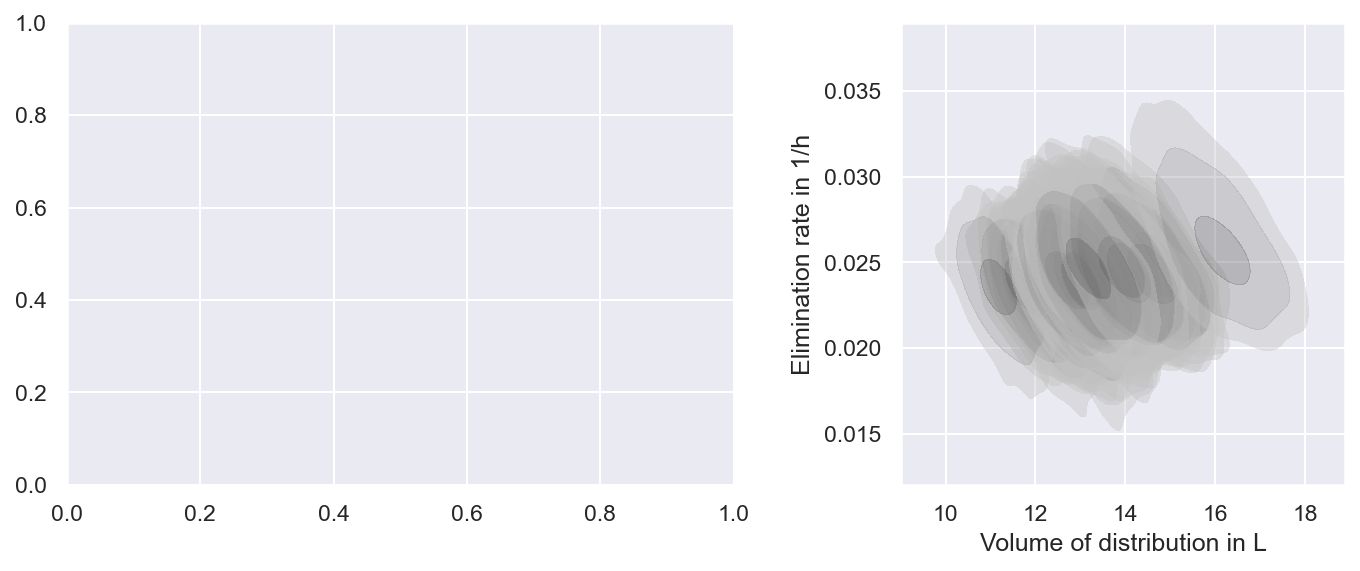

In [251]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

for idd in range(50):
    v = samples3['central.size'][0, 500:, idd]
    ke = samples3['global.elimination_rate'][0, 500:, idd]
    sns.kdeplot(x=v, y=ke, color='grey', ax=axes[0], fill=True, levels=[0.02, 0.1, 0.67, 1], bw_adjust=1.5, alpha=0.4)

axes[0].set_xlabel('Volume of distribution in L')
axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([0.012, 0.039])
axes[0].set_xlim([9, 18.9])

plt.savefig('illustration_individual_estimates_3.png', bbox_inches='tight')
plt.show()

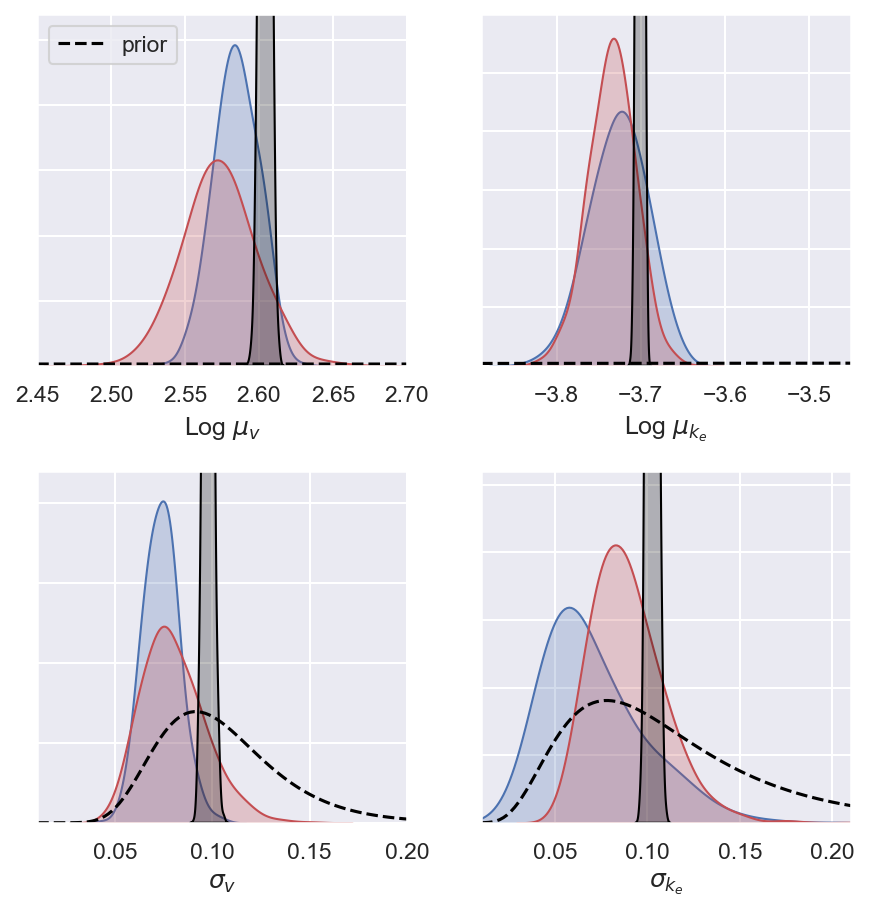

In [248]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(1500 // my_dpi, 1500 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 2, hspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[2]))
axes.append(plt.Subplot(fig, outer[3]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Illustrate prior
for idp in range(4):
    if idp == 0:
        xvalues = np.linspace(2.45, 2.7, 100)
    if idp == 1:
        xvalues = np.linspace(-3.89, -3.45, 100)
    if idp == 2:
        xvalues = np.linspace(0.01, 0.2, 100)
    if idp == 3:
        xvalues = np.linspace(0.01, 0.21, 100)
    pdfs = np.exp([log_priors[idp]([x]) for x in xvalues])
    axes[idp].plot(xvalues, pdfs, color='black', linestyle='--', label='prior' if idp==0 else None)

s3 = np.vstack([
    samples3['Log mean central.size'].values,
    samples3['Log mean global.elimination_rate'].values,
    samples3['Log std. central.size'].values,
    samples3['Log std. global.elimination_rate'].values,
])[:, 500:]
for idp in range(4):
    label = [None, None, None]
    if idp == 0:
        label = ['50 IDs, few measurements', '10 IDs, many measurements', '1000 IDs, many measurements']
    sns.kdeplot(s3[idp], ax=axes[idp], bw_adjust=1.5, fill=True, color=sns.color_palette()[0])
    s = samples2[:, 4000::10, idp].flatten()
    sns.kdeplot(s, ax=axes[idp], bw_adjust=1.5, fill=True, color=sns.color_palette()[3])
    s = samples1[:, 4000::10, idp].flatten()
    sns.kdeplot(s, ax=axes[idp], bw_adjust=1.5, fill=True, color='black')
    # axes[idp].axvline(x=np.mean(s), color='black')


axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel(r'Log $\mu _v$')
axes[1].set_xlabel(r'Log $\mu _{k_e}$')
axes[2].set_xlabel(r'$\sigma _v$')
axes[3].set_xlabel(r'$\sigma _{k_e}$')
axes[0].set_xlim([2.45, 2.7])
axes[1].set_xlim([-3.89, -3.45])
axes[2].set_xlim([0.01, 0.2])
axes[3].set_xlim([0.01, 0.21])
axes[0].set_ylim([0, 27])
axes[1].set_ylim([0, 15])
axes[2].set_ylim([0, 44])
axes[3].set_ylim([0, 26])
axes[0].legend(loc='upper left')

plt.savefig('illustration_nlme_inference.png', bbox_inches='tight')

plt.show()

In [173]:
np.log(pop_parameters)

array([-1.7       ,  2.7       , -2.30258509, -2.30258509, -2.30258509])

## Structural uncertainty

In [2]:
model = chi.PKPDModel(sbml_file='dphil-illustrations_tmdd_model.xml')
model.set_administration(compartment='central', amount_var='drug_amount', direct=True)
model.set_outputs(['central.drug_concentration'])

In [3]:
print(model._model.code())

[[model]]
name: tmdd_model
# Initial values
central.drug_amount                = 0
central.target_amount              = 0
central.drug_target_complex_amount = 0

[central]
dose_rate = 0 bind pace
    in [g/s (2.777777777777775e-07)]
dot(drug_amount) = -(size * global.elimination_rate * drug_concentration) - size * global.binding_rate * drug_concentration * target_concentration + size * global.dissociation_rate * drug_target_complex_concentration + dose_rate
    in [kg (1e-06)]
drug_concentration = drug_amount / size
    in [g/m^3]
dot(drug_target_complex_amount) = size * global.binding_rate * drug_concentration * target_concentration - size * global.dissociation_rate * drug_target_complex_concentration
    in [kg (1e-06)]
drug_target_complex_concentration = drug_target_complex_amount / size
    in [g/m^3]
size = 1
    in [L]
dot(target_amount) = -(size * global.binding_rate * drug_concentration * target_concentration) + size * global.dissociation_rate * drug_target_complex_concentratio

In [272]:
# Define parameters according to Mager (2008)
k_syn = 0.0001  # in mg / L
k_deg = k_syn / 87.1  # in mg / L / mg
parameters = [
    0,  # 'central.drug_amount',
    0,  # 'central.drug_target_complex_amount',
    k_syn / k_deg,  # 'central.target_amount',
    45.3,  # 'central.size' in L
    0.940,  # 'global.binding_rate' in  L / mg / h
    k_deg,  # 'global.degradation_rate',
    0.327,  # 'global.dissociation_rate' in 1 / h
    0.0356,  # 'global.elimination_rate',
    k_syn,  # 'global.synthesisation_rate'
]

# Simulate drug concentraion
n_times = 200
times = np.linspace(0.5, 168, n_times)
doses = [2, 10, 20, 30, 40, 50, 250]
sim = np.empty(shape=(len(doses), n_times))
for idd, dose in enumerate(doses):
    model.set_dosing_regimen(dose=dose)
    sim[idd] = model.simulate(parameters, times)

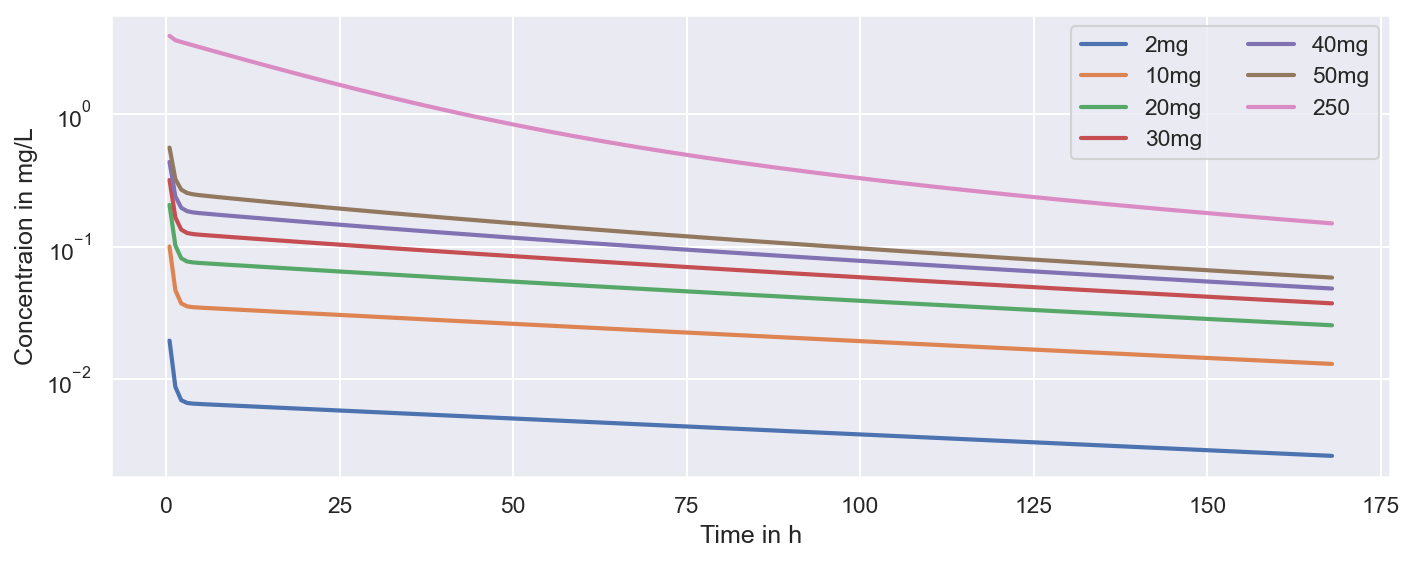

In [5]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

labels = ['2mg', '10mg', '20mg', '30mg', '40mg', '50mg', '250']
for ids, s in enumerate(sim):
    axes[0].plot(times, s, linewidth=2, label=labels[ids])

axes[0].set_ylabel('Concentraion in mg/L')
axes[0].set_xlabel('Time in h')
axes[0].set_yscale('log')
axes[0].legend(ncol=2)

plt.show()

Simulate measurements.

In [273]:
# Simulate drug concentraion
n_times = 200
times = np.linspace(0.01, 24 * 3, n_times)
dose = 15
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, dose, dose]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))
model.set_dosing_regimen(regimen)
sim = model.simulate(parameters, times)

meas_times = np.array([
    0*24 + 1, 0*24 + 3, 0*24 + 6, 0*24 + 9, 0*24 + 12, 0*24 + 15, 0*24 + 18, 0*24 + 21,
    1*24 + 1, 1*24 + 3, 1*24 + 6, 1*24 + 9, 1*24 + 12, 1*24 + 15, 1*24 + 18, 1*24 + 21,
    2*24 + 1, 2*24 + 3, 2*24 + 6, 2*24 + 9, 2*24 + 12, 2*24 + 15, 2*24 + 18, 2*24 + 21])
sim2 = model.simulate(parameters, meas_times)
rng = np.random.default_rng(seed=2)
measurements = np.exp(rng.normal(np.log(sim2), 0.1))

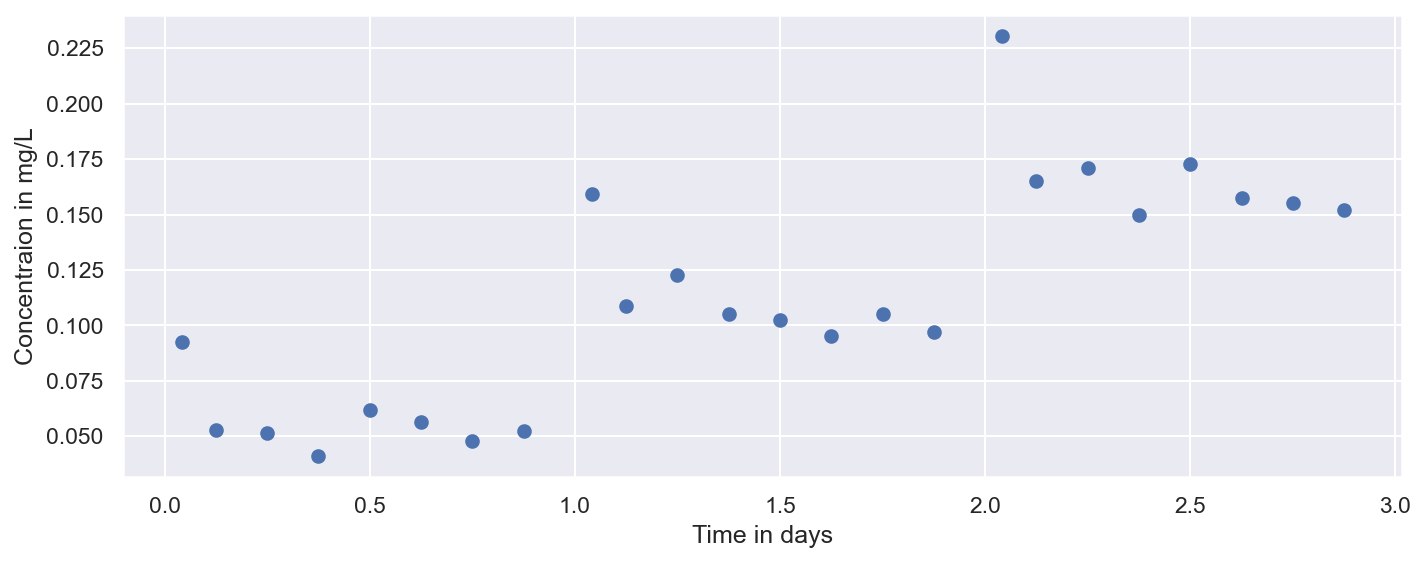

In [274]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# axes[0].plot(times / 24, sim[0], linewidth=2, color='black')
axes[0].scatter(meas_times/24, measurements)

axes[0].set_ylabel('Concentraion in mg/L')
axes[0].set_xlabel('Time in days')

plt.show()

Fit 1 compartment PK model to data and predict dosing regimen that target 0.5 mg/L

In [400]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times[:8*3], observations=measurements[:, :8*3])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma log': 0.1
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Optimise dosing regimen for MAPs
target = 0.5
map_estimates = np.median(estimates, axis=0)

class MSE(pints.ErrorMeasure):
    def __init__(self, estimates, target):
        super(MSE, self).__init__()
        self._parameters = [0, estimates[0], estimates[1]]

        model = chi.library.ModelLibrary().one_compartment_pk_model()
        model.set_administration(compartment='central', direct=True)
        self._model = model

        self._times = np.linspace(24*4, 24*5, num=1000)
        self._target = target

    def __call__(self, x):
        dose1 = x[0]
        dose = 15
        duration = 0.01
        regimen = myokit.Protocol()
        for day, do in enumerate([dose, dose, dose, dose1, dose1]):
            if do == 0:
                continue
            regimen.add(myokit.ProtocolEvent(
                level=do/duration,
                start=day*24,
                duration=duration))
        model.set_dosing_regimen(regimen)

        sim = model.simulate(self._parameters, self._times)

        score = np.mean((sim - target)**2)

        return score

    def n_parameters(self):
        return 1

mse = MSE(map_estimates, target)
dose1, _ = pints.optimise(mse, x0=[10], method=pints.PSO)

# Show fit and prediction for optimised dosing regimen
times = np.linspace(0, 24*5, num=1000)
dose = 15
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, dose, dose, dose1, dose1]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))
model.set_dosing_regimen(regimen)

# Simulate posterior predictive
out = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out[ids] = model.simulate(parameters=[0, estimates[ids, 0], estimates[ids, 1]], times=times)[0]

# Simulate measurements with new dosing regimen
model = chi.PKPDModel(sbml_file='dphil-illustrations_tmdd_model.xml')
model.set_administration(compartment='central', amount_var='drug_amount', direct=True)
model.set_outputs(['central.drug_concentration'])
model.set_dosing_regimen(regimen)
meas_times = np.array([
    0*24 + 1, 0*24 + 3, 0*24 + 6, 0*24 + 9, 0*24 + 12, 0*24 + 15, 0*24 + 18, 0*24 + 21,
    1*24 + 1, 1*24 + 3, 1*24 + 6, 1*24 + 9, 1*24 + 12, 1*24 + 15, 1*24 + 18, 1*24 + 21,
    2*24 + 1, 2*24 + 3, 2*24 + 6, 2*24 + 9, 2*24 + 12, 2*24 + 15, 2*24 + 18, 2*24 + 21,
    3*24 + 1, 3*24 + 3, 3*24 + 6, 3*24 + 9, 3*24 + 12, 3*24 + 15, 3*24 + 18, 3*24 + 21,
    4*24 + 1, 4*24 + 3, 4*24 + 6, 4*24 + 9, 4*24 + 12, 4*24 + 15, 4*24 + 18, 4*24 + 21])
sim2 = model.simulate(parameters, meas_times)
rng = np.random.default_rng(seed=2)
measurements = np.exp(rng.normal(np.log(sim2), 0.1))

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0.333     0.333     0.333      0:00.0
3     12     0.25      0.5       0.5        0:00.0
20    63     0.286     0.286     0.143      0:00.0
40    123    0.268     0.146     0.171      0:00.0
60    183    0.23      0.0984    0.115      0:00.0
80    243    0.21      0.0988    0.111      0:00.0
100   303    0.188     0.099     0.0891     0:00.0
120   363    0.174     0.0992    0.107438   0:00.0
140   423    0.17      0.106383  0.106383   0:00.1
160   483    0.173913  0.118     0.0932     0:00.1
180   543    0.182     0.121547  0.0939     0:00.1
Initial phase completed.
200   603    0.174     0.114     0.104      0:00.1
220   663    0.195     0.158371  0.131      0:00.1
240   723    0.241     0.166     0.158      0:00.1
260   783   

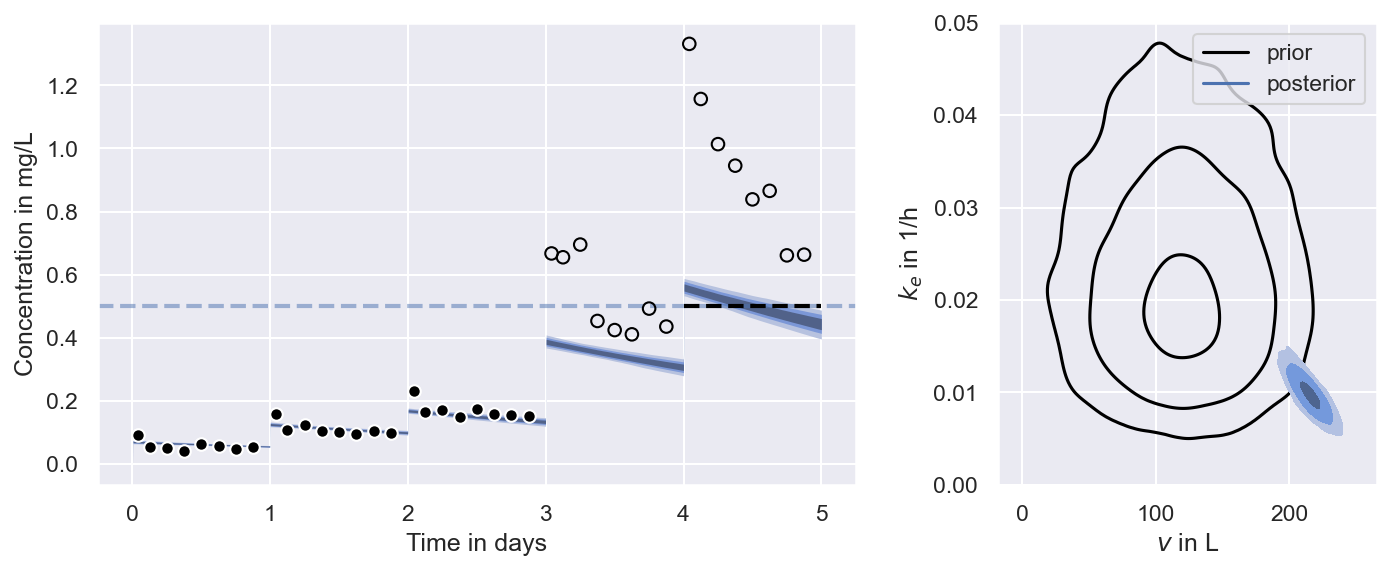

In [394]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[4, 2], wspace=0.25)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot measurements
axes[0].scatter(meas_times[:24]/24, measurements[0, :24], color='black', zorder=10, label='measurements', edgecolor='white')
axes[0].scatter(meas_times[24:]/24, measurements[0, 24:], facecolors='none', zorder=10, edgecolor='black')

# Plot fit
axes[0].fill_between(times/24, np.percentile(out, 0.5, axis=0), np.percentile(out, 99.5, axis=0), color='#B7C2DF', linewidth=0)
axes[0].fill_between(times/24, np.percentile(out, 5, axis=0), np.percentile(out, 95, axis=0), color='#7B97D7', linewidth=0, label='fit 1')
axes[0].fill_between(times/24, np.percentile(out, 33.3/2, axis=0), np.percentile(out, 100-33.3/2, axis=0), color='#516289', linewidth=0)

# Plot parameter estimates
prior_samples = log_prior.sample(10000)
sns.kdeplot(x=prior_samples[:, 0], y=prior_samples[:, 1], color='black', ax=axes[1], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates[:, 0], y=estimates[:, 1], color=sns.color_palette()[0], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)
axes[1].plot([1, 2], [1, 1], color='black', label='prior')
axes[1].plot([1, 2], [1, 1], color=sns.color_palette()[0], label='posterior')

# Plot target
axes[0].axhline(0.5, linestyle='dashed', linewidth=2, alpha=0.5)
axes[0].plot([4, 5], [0.5, 0.5], color='black', linestyle='dashed', linewidth=2)

axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in days')
axes[1].set_ylabel(r'$k_e$ in 1/h')
axes[1].set_xlabel(r'$v$ in L')
axes[1].set_ylim([0, 0.05])
axes[1].legend()

plt.savefig('illustration_model_misspecification.pdf', bbox_inches='tight')
plt.show()

In [14]:
dose1

array([54.36944351])

## Illustration of data-generating parameters when model structure is wrong

In [401]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times, observations=measurements)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma log': 0.1
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates2 = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Simulate posterior predictive
out2 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out2[ids] = model.simulate(parameters=[0, estimates2[ids, 0], estimates2[ids, 1]], times=times)[0]

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0.5       0          0:00.0
2     9      0.333     0.667     0          0:00.0
3     12     0.5       0.5       0          0:00.0
20    63     0.286     0.143     0.0476     0:00.0
40    123    0.146     0.171     0.0976     0:00.0
60    183    0.147541  0.147541  0.0984     0:00.0
80    243    0.136     0.111     0.0988     0:00.0
100   303    0.129     0.119     0.109      0:00.0
120   363    0.116     0.116     0.116      0:00.0
140   423    0.149     0.113     0.113      0:00.1
160   483    0.149     0.118     0.0994     0:00.1
180   543    0.155     0.121547  0.105      0:00.1
Initial phase completed.
200   603    0.149     0.129     0.114      0:00.1
220   663    0.172     0.163     0.14       0:00.1
240   723    0.207     0.191     0.166      0:00.1
260   783   

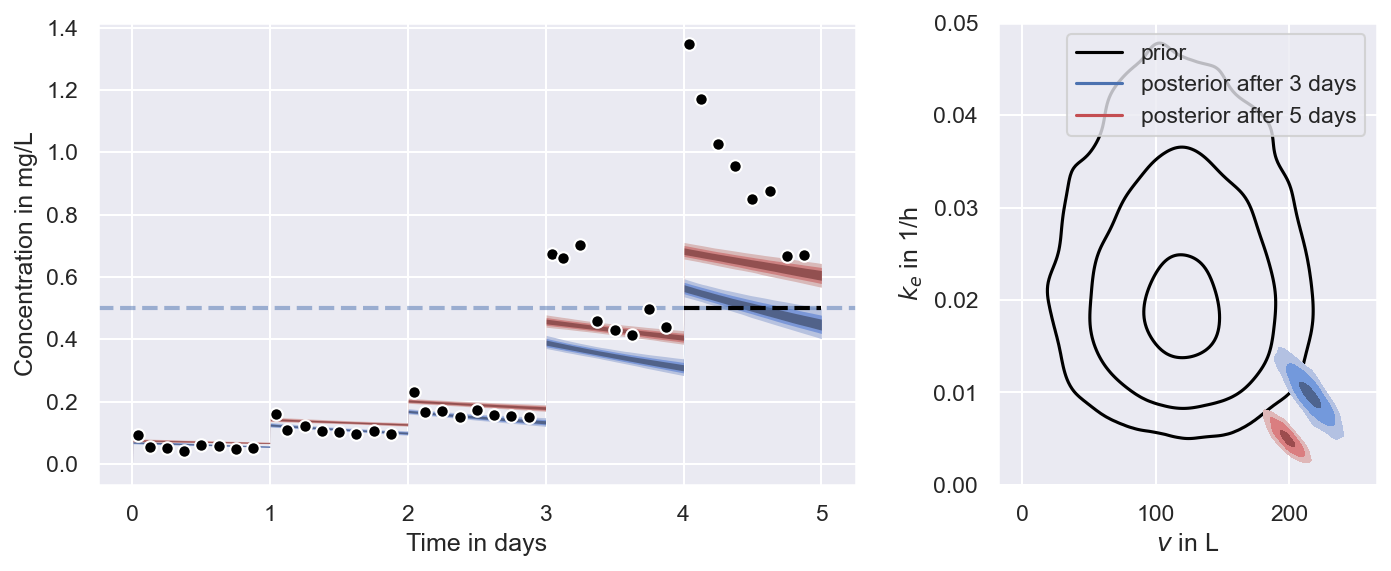

In [407]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[4, 2], wspace=0.25)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot measurements
axes[0].scatter(meas_times/24, measurements[0], color='black', zorder=10, label='measurements', edgecolor='white')

# Plot fit
axes[0].fill_between(times/24, np.percentile(out, 0.5, axis=0), np.percentile(out, 99.5, axis=0), color='#B7C2DF', linewidth=0)
axes[0].fill_between(times/24, np.percentile(out, 5, axis=0), np.percentile(out, 95, axis=0), color='#7B97D7', linewidth=0, label='fit 1')
axes[0].fill_between(times/24, np.percentile(out, 33.3/2, axis=0), np.percentile(out, 100-33.3/2, axis=0), color='#516289', linewidth=0)
axes[0].fill_between(times/24, np.percentile(out2, 0.5, axis=0), np.percentile(out2, 99.5, axis=0), color='#D8B9B9', linewidth=0)
axes[0].fill_between(times/24, np.percentile(out2, 5, axis=0), np.percentile(out2, 95, axis=0), color='#CD8282', linewidth=0, label='fit 1')
axes[0].fill_between(times/24, np.percentile(out2, 33.3/2, axis=0), np.percentile(out2, 100-33.3/2, axis=0), color='#925050', linewidth=0)

# Plot parameter estimates
sns.kdeplot(x=prior_samples[:, 0], y=prior_samples[:, 1], color='black', ax=axes[1], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates[:, 0], y=estimates[:, 1], color=sns.color_palette()[0], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)
sns.kdeplot(x=estimates2[:, 0], y=estimates2[:, 1], color=sns.color_palette()[3], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)
axes[1].plot([1, 2], [1, 1], color='black', label='prior')
axes[1].plot([1, 2], [1, 1], color=sns.color_palette()[0], label='posterior after 3 days')
axes[1].plot([1, 2], [1, 1], color=sns.color_palette()[3], label='posterior after 5 days')

# Plot target
axes[0].axhline(0.5, linestyle='dashed', linewidth=2, alpha=0.5)
axes[0].plot([4, 5], [0.5, 0.5], color='black', linestyle='dashed', linewidth=2)

axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in days')
axes[1].set_ylabel(r'$k_e$ in 1/h')
axes[1].set_xlabel(r'$v$ in L')
axes[1].set_ylim([0, 0.05])
axes[1].legend()

plt.savefig('illustration_model_misspecification2.pdf', bbox_inches='tight')
plt.show()

Test convergence of model evidence $p(\mathcal{D} | m) = \int \mathrm{d}\psi\, p(\mathcal{D} | \psi ,m)\, p(\psi | m)$.

Option 1: Sample from prior and evaluate $p(\mathcal{D} | \psi ,m)$ -- This turns out to be poorly convergened (see below).

Option 2: Monte Carlo integration: Sample uniformly over some volume and evaluate integrand for each sample: $V \sum _i p(\mathcal{D} | \psi ,m)\, p(\psi | m) / N$. Volume can be constructed as min-max cube of prior.

Option 3: What if I have samples from $p(\mathcal{D} | \psi ,m)\, p(\psi | m)$ already? In one dimenion, we could use a histogram to approximate integral. In higher dimensions, there would have to be an algorithm that defines volume bins. I am sure there must be something out there.

In [330]:
np.random.seed(1)

n_samples = 300000
samples = log_prior.sample(n_samples)
log_scores = [log_likelihood(p) for p in samples]
n_prior = np.arange(1, n_samples+1)
evidence_prior = np.cumsum(np.exp(log_scores)) / n_prior


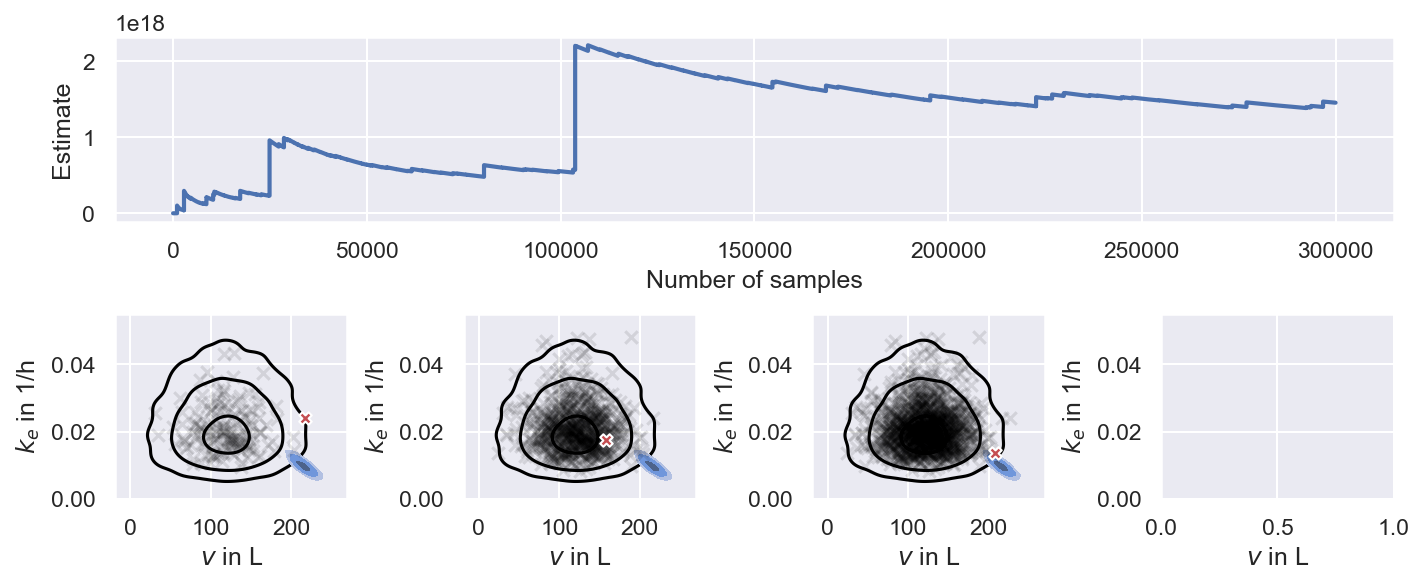

In [331]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.5)
inner = gridspec.GridSpecFromSubplotSpec(
    1, 4, subplot_spec=outer[1], wspace=0.5)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, inner[0]))
axes.append(plt.Subplot(fig, inner[1]))
axes.append(plt.Subplot(fig, inner[2]))
axes.append(plt.Subplot(fig, inner[3]))


# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(n_prior, evidence_prior, linewidth=2, color=sns.color_palette()[0], label='prior approx.')

sns.kdeplot(x=samples[:10000, 0], y=samples[:10000, 1], color='black', ax=axes[1], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates[:, 0], y=estimates[:, 1], color=sns.color_palette()[0], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)
axes[1].plot([1, 2], [1, 1], color='black', label='prior')
axes[1].plot([1, 2], [1, 1], color=sns.color_palette()[0], label='posterior')
sns.kdeplot(x=samples[:10000, 0], y=samples[:10000, 1], color='black', ax=axes[2], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates[:, 0], y=estimates[:, 1], color=sns.color_palette()[0], ax=axes[2], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)
sns.kdeplot(x=samples[:10000, 0], y=samples[:10000, 1], color='black', ax=axes[3], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates[:, 0], y=estimates[:, 1], color=sns.color_palette()[0], ax=axes[3], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5, zorder=10)

axes[1].scatter(samples[:17075:100, 0], samples[:17075:100, 1], color='black', marker='x', alpha=0.1, zorder=11)
axes[1].scatter([samples[17075, 0]], [samples[17075, 1]], color=sns.color_palette()[3], marker='X', zorder=11, edgecolor='white')

axes[2].scatter(samples[:80000:100, 0], samples[:80000:100, 1], color='black', marker='x', alpha=0.1, zorder=11)
axes[2].scatter([samples[17075, 0]], [samples[17075, 1]], color='black', marker='x', zorder=11, alpha=0.1)
axes[2].scatter([samples[80000, 0]], [samples[80000, 1]], color=sns.color_palette()[3], marker='X', zorder=11, edgecolor='white')

axes[3].scatter(samples[:136020:100, 0], samples[:136020:100, 1], color='black', marker='x', alpha=0.1, zorder=11)
axes[3].scatter([samples[17075, 0]], [samples[17075, 1]], color='black', marker='x', zorder=11, alpha=0.1)
axes[3].scatter([samples[136020, 0]], [samples[136020, 1]], color=sns.color_palette()[3], marker='X', zorder=11, edgecolor='white')

axes[0].set_xlabel('Number of samples')
axes[0].set_ylabel('Estimate')
axes[1].set_ylabel(r'$k_e$ in 1/h')
axes[1].set_xlabel(r'$v$ in L')
axes[2].set_ylabel(r'$k_e$ in 1/h')
axes[2].set_xlabel(r'$v$ in L')
axes[3].set_ylabel(r'$k_e$ in 1/h')
axes[3].set_xlabel(r'$v$ in L')
axes[4].set_ylabel(r'$k_e$ in 1/h')
axes[4].set_xlabel(r'$v$ in L')
axes[1].set_ylim([0, 0.055])
axes[2].set_ylim([0, 0.055])
axes[3].set_ylim([0, 0.055])
axes[4].set_ylim([0, 0.055])

# plt.savefig('illustration_model_evidence_estimation_prior_samples.png', bbox_inches='tight')

plt.show()

Fix bottom plots!

Use Harmonic mean estimator: $p(\mathcal{D} | m) = 1 / \left ( \frac{1}{S} \sum _s \frac{1}{p(\mathcal{D} | \psi_s ,m)} \right)$.

Holds since:

$$
    \mathbb{E}\Big[ \frac{1}{p(\mathcal{D} | \psi ,m)}\Big] = \int \mathrm{d}\psi\frac{p(\mathcal{D} | \psi ,m)\, p(\psi)}{p(\mathcal{D} | \psi ,m)\, p(\mathcal{D} | m)} = \frac{1}{p(\mathcal{D} | m)}
$$

In [332]:
posterior2 = controller.run(100000, log_to_screen=True)

estimates2 = np.vstack([
    posterior2['central.size'].sel(draw=slice(5000, 100000, 10)).values.flatten(),
    posterior2['global.elimination_rate'].sel(draw=slice(5000, 100000, 10)).values.flatten()]).T

log_scores = np.array([log_likelihood(p) for p in estimates2])
n_posterior = np.arange(1, len(estimates2)+1)
evidence_posterior = 1 / (np.cumsum(np.exp(-log_scores)) / n_posterior)

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval.  Accept.   Accept.   Accept.   Time m:s
0     3       0         0         0          0:00.0
1     6       0.5       0.5       0          0:00.0
2     9       0.333     0.333     0          0:00.0
3     12      0.25      0.25      0.25       0:00.0
20    63      0.143     0.143     0.0476     0:00.0
40    123     0.0732    0.0976    0.0976     0:00.0
60    183     0.082     0.131     0.082      0:00.0
80    243     0.0741    0.123     0.0988     0:00.0
100   303     0.099     0.129     0.099      0:00.0
120   363     0.0992    0.116     0.0992     0:00.1
140   423     0.121     0.113     0.0993     0:00.1
160   483     0.118     0.106     0.087      0:00.1
180   543     0.133     0.0939    0.0829     0:00.1
Initial phase completed.
200   603     0.124     0.0995    0.0796     0:00.1
220   663     0.163     0.131     0.109      0:00.1
240   723     0.183     0.166     0.149      0:

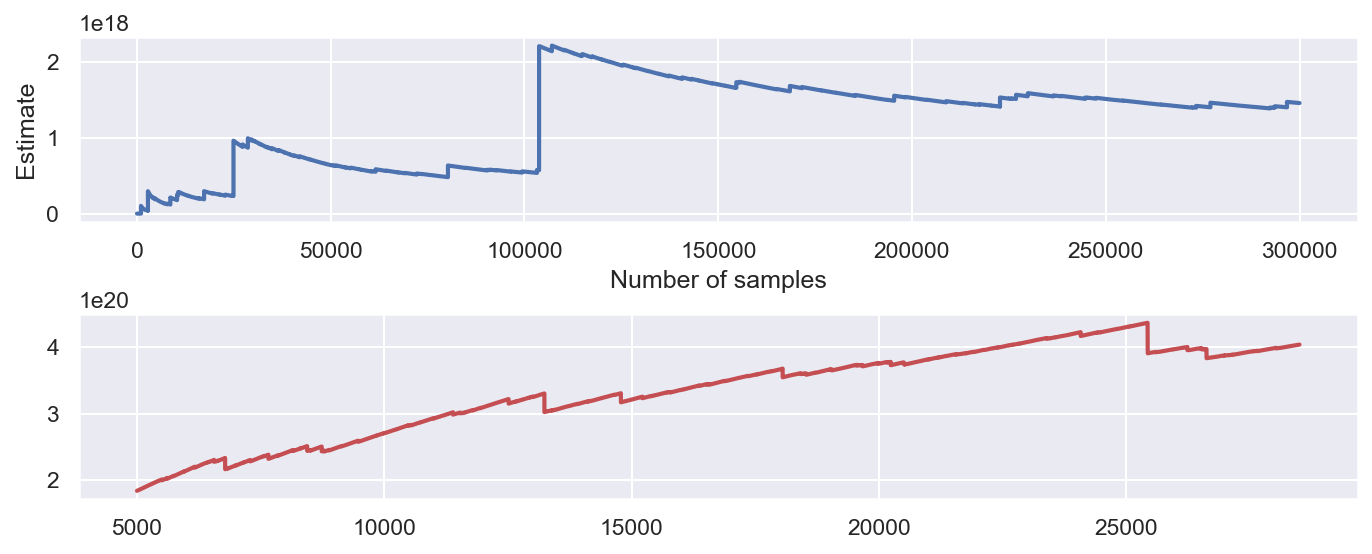

In [334]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.5)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))


# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(n_prior, evidence_prior, linewidth=2, color=sns.color_palette()[0], label='prior approx.')
axes[1].plot(n_posterior[5000:], evidence_posterior[5000:], linewidth=2, color=sns.color_palette()[3], label='prior approx.')


axes[0].set_xlabel('Number of samples')
axes[0].set_ylabel('Estimate')


plt.show()

Evidence estimate from prior samples is dominated by low density samples and will continue to experience spikes in the density -- the evidence is dominated by the rare draws from the high density regions.

Using posterior samples for the evidence estimation avoids these challenges as it samples predominantly from the high probability density regions.

## Illustrate update of model posterior

In [375]:
## m=1
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
n_days = 1
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma log': 0.1
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Simulate posterior predictive
out1 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out1[ids] = model.simulate(parameters=[0, estimates[ids, 0], estimates[ids, 1]], times=times)[0]

n_samples = 3000
log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_1 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=2
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma': 0.01
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Simulate posterior predictive
out2 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out2[ids] = model.simulate(parameters=[0, estimates[ids, 0], estimates[ids, 1]], times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_2 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=3
# Define model
model = chi.PKPDModel(sbml_file='dphil_illustrations_pk_two_comp.xml')
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)
model.set_outputs(['central.drug_concentration'])

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'peripheral.drug_peripheral_amount': 0,
    'global.transition_rate_c2p': 0.02,
    'global.transition_rate_p2c': 0.02,
    'peripheral.size': 100,
    'Sigma': 0.01
})
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(120, 30),
    pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

out3 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out3[ids] = model.simulate(parameters=[0, 0, estimates[ids, 0], estimates[ids, 1], 0.02, 0.02, 100], times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_3 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=4
# Define model
model = chi.PKPDModel(sbml_file='dphil-illustrations_tmdd_model.xml')
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)
model.set_outputs(['central.drug_concentration'])

# Infer model parameters
k_syn = 0.0001  # in mg / L
k_deg = k_syn / 87.1  # in mg / L / mg
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'central.drug_target_complex_amount': 0,
    'central.target_amount': k_syn / k_deg,
    'global.binding_rate': 0.940,
    'global.degradation_rate': k_deg,
    'global.dissociation_rate': 0.327,
    'global.synthesisation_rate': k_syn,
    'Sigma log': 0.5
})

log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(70, 10),
    pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(20000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(10000, 20000, 20)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(10000, 20000, 20)).values.flatten()]).T

out4 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out4[ids] = model.simulate(parameters=[
        0,  # 'central.drug_amount',
        0,  # 'central.drug_target_complex_amount',
        k_syn / k_deg,  # 'central.target_amount',
        estimates[ids, 0],  # 'central.size' in L
        0.940,  # 'global.binding_rate' in  L / mg / h
        k_deg,  # 'global.degradation_rate',
        0.327,  # 'global.dissociation_rate' in 1 / h
        estimates[ids, 1],  # 'global.elimination_rate',
        k_syn,  # 'global.synthesisation_rate'
    ],
    times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_4 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

# Calculate model posterior
model_posterior = np.array([evidence_1, evidence_2, evidence_3, evidence_4])
model_posterior = model_posterior / np.sum(model_posterior)

### More measurements

## m=1
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
n_days = 3
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma log': 0.1
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Simulate posterior predictive
out11 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out11[ids] = model.simulate(parameters=[0, estimates[ids, 0], estimates[ids, 1]], times=times)[0]

n_samples = 3000
log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_11 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=2
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'Sigma': 0.01
})
log_prior = pints.ComposedLogPrior(pints.GaussianLogPrior(120, 30), pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# Simulate posterior predictive
out22 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out22[ids] = model.simulate(parameters=[0, estimates[ids, 0], estimates[ids, 1]], times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_22 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=3
# Define model
model = chi.PKPDModel(sbml_file='dphil_illustrations_pk_two_comp.xml')
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)
model.set_outputs(['central.drug_concentration'])

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'peripheral.drug_peripheral_amount': 0,
    'global.transition_rate_c2p': 0.02,
    'global.transition_rate_p2c': 0.02,
    'peripheral.size': 100,
    'Sigma': 0.01
})
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(120, 30),
    pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(10000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

out33 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out33[ids] = model.simulate(parameters=[0, 0, estimates[ids, 0], estimates[ids, 1], 0.02, 0.02, 100], times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_33 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

## m=4
# Define model
model = chi.PKPDModel(sbml_file='dphil-illustrations_tmdd_model.xml')
model.set_administration(compartment='central', direct=True)
model.set_dosing_regimen(regimen)
model.set_outputs(['central.drug_concentration'])

# Infer model parameters
k_syn = 0.0001  # in mg / L
k_deg = k_syn / 87.1  # in mg / L / mg
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.LogNormalErrorModel(), times=meas_times[:8*n_days], observations=measurements[:, :8*n_days])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'central.drug_target_complex_amount': 0,
    'central.target_amount': k_syn / k_deg,
    'global.binding_rate': 0.940,
    'global.degradation_rate': k_deg,
    'global.dissociation_rate': 0.327,
    'global.synthesisation_rate': k_syn,
    'Sigma log': 0.5
})

log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(70, 10),
    pints.LogNormalLogPrior(np.log(0.02), 0.3))
log_posterior = chi.LogPosterior(log_likelihood, log_prior)
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior = controller.run(20000, log_to_screen=True)

estimates = np.vstack([
    posterior['central.size'].sel(draw=slice(10000, 20000, 20)).values.flatten(),
    posterior['global.elimination_rate'].sel(draw=slice(10000, 20000, 20)).values.flatten()]).T

out44 = np.empty(shape=(len(estimates), len(times)))
for ids in range(len(estimates)):
    out44[ids] = model.simulate(parameters=[
        0,  # 'central.drug_amount',
        0,  # 'central.drug_target_complex_amount',
        k_syn / k_deg,  # 'central.target_amount',
        estimates[ids, 0],  # 'central.size' in L
        0.940,  # 'global.binding_rate' in  L / mg / h
        k_deg,  # 'global.degradation_rate',
        0.327,  # 'global.dissociation_rate' in 1 / h
        estimates[ids, 1],  # 'global.elimination_rate',
        k_syn,  # 'global.synthesisation_rate'
    ],
    times=times)[0]

log_scores = [log_likelihood(p) for p in log_prior.sample(n_samples)]
evidence_44 = np.mean(np.exp(log_scores - np.log(log_likelihood.n_observations())))

# Calculate model posterior
model_posterior2 = np.array([evidence_11, evidence_22, evidence_33, evidence_44])
model_posterior2 = model_posterior2 / np.sum(model_posterior2)

Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0         0.667     0.667      0:00.0
3     12     0         0.5       0.5        0:00.0
20    63     0.381     0.238     0.429      0:00.0
40    123    0.341     0.195122  0.244      0:00.0
60    183    0.328     0.213     0.213      0:00.0
80    243    0.272     0.235     0.21       0:00.0
100   303    0.297     0.248     0.188      0:00.0
120   363    0.298     0.264     0.19       0:00.0
140   423    0.284     0.255     0.206      0:00.1
160   483    0.298     0.261     0.193      0:00.1
180   543    0.309     0.254     0.198895   0:00.1
Initial phase completed.
200   603    0.303     0.234     0.189      0:00.1
220   663    0.317     0.244     0.222      0:00.1
240   723    0.332     0.266     0.245      0:00.1
260   783   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.96747695925620303e-01.
Last reached state: 
  central.drug_amount                =  4.53899527140944137e+37
  central.target_amount              =  4.53899527140944137e+37
  central.drug_target_complex_amount = -4.53899527140944137e+37
Inputs for binding:
  time =  1.96747695925620303e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.10671110083507052e+00.
Last reached state: 
  central.drug_amount                =  3.70915125800989696e+37
  central.target_amount              =  3.709151258009896

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.289589 and h = 2.45136e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.289589 and h = 2.45136e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.289589 and h = 2.45136e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.289589 and h = 1.68907e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.289589 and h

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.91466687859370632e-01.
Last reached state: 
  central.drug_amount                =  1.42162345922258032e+45
  central.target_amount              =  1.42162345922258064e+45
  central.drug_target_complex_amount = -1.42162345922258064e+45
Inputs for binding:
  time =  2.91466687859370632e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.11331132675085473e-01.
Last reached state: 
  central.drug_amount                =  6.55894770452762067e+37
  central.target_amount              =  6.558947704527622

780   2343   0.283     0.255     0.287      0:00.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.299399 and h = 2.56337e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.299399 and h = 2.56337e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.299399 and h = 2.56337e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.299399 and h = 1.76624e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.97318646333953079e-02.
Last reached state: 
  central.drug_amount                =  4.15053072493994148e+37
  central.target_amount              =  4.15053072493994242e+37
  central.drug_target_complex_amount = -4.15053072493994242e+37
Inputs for binding:
  time =  7.97318646333953079e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.47753096516457161e-01.
Last reached state: 
  central.drug_amount                =  2.74072620441591494e+45
  central.target_amount              =  2.740726204415914

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.903426 and h = 5.18688e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.903426 and h = 3.47621e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.903426 and h = 3.47621e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.903426 and h = 3.47621e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.903426 and h

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.09707185155699422e-02.
Last reached state: 
  central.drug_amount                =  4.84998191785359956e+37
  central.target_amount              =  4.84998191785359956e+37
  central.drug_target_complex_amount = -4.84998191785359956e+37
Inputs for binding:
  time =  3.09707185155699422e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.63603719151389027e-01.
Last reached state: 
  central.drug_amount                =  1.44343601695460032e+45
  central.target_amount              =  1.443436016954600

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0820488 and h = 5.03397e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0820488 and h = 5.03397e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0820488 and h = 5.03397e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0820488 and h = 5.03397e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0820488 

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.09792174070565829e-01.
Last reached state: 
  central.drug_amount                =  1.84397292056270359e+45
  central.target_amount              =  1.84397292056270391e+45
  central.drug_target_complex_amount = -1.84397292056270328e+45
Inputs for binding:
  time =  2.09792174070565829e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.53036272493795950e-01.
Last reached state: 
  central.drug_amount                =  1.34674852485567377e+45
  central.target_amount              =  1.346748524855673

2080  6243   0.248     0.227     0.242      0:01.1
2100  6303   0.249     0.228     0.242      0:01.1
2120  6363   0.248     0.228     0.241      0:01.1
2140  6423   0.248     0.228     0.241      0:01.1
2160  6483   0.246     0.228     0.242      0:01.1
2180  6543   0.244     0.229     0.242      0:01.1
2200  6603   0.244     0.228     0.244      0:01.1
2220  6663   0.245     0.226     0.243      0:01.1
2240  6723   0.245     0.227     0.244      0:01.1
2260  6783   0.245     0.226     0.243      0:01.1
2280  6843   0.245068  0.225     0.243      0:01.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.153036 and h = 1.38616e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.153036 and h = 1.38616e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WA

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.61468657639408625e-01.
Last reached state: 
  central.drug_amount                =  3.44473314588045463e+37
  central.target_amount              =  3.44473314588045463e+37
  central.drug_target_complex_amount = -3.44473314588045416e+37
Inputs for binding:
  time =  1.61468657639408625e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.57559068877982544e-01.
Last reached state: 
  central.drug_amount                =  2.01578796064770704e+45
  central.target_amount              =  2.015787960647706

3020  9063   0.24      0.226     0.24       0:01.5
3040  9123   0.24      0.227     0.241      0:01.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.317538 and h = 2.76529e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.317538 and h = 2.76529e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.317538 and h = 2.76529e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.317538 and h = 1.90537e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.17789759383557957e-01.
Last reached state: 
  central.drug_amount                =  6.53141088145555689e+37
  central.target_amount              =  6.53141088145555689e+37
  central.drug_target_complex_amount = -6.53141088145555689e+37
Inputs for binding:
  time =  1.17789759383557957e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.66314838188963837e-01.
Last reached state: 
  central.drug_amount                =  1.57523696598561160e+45
  central.target_amount              =  1.575236965985611

3460  10383  0.237     0.227     0.239      0:01.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.589152 and h = 5.06689e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.589152 and h = 5.06689e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.589152 and h = 5.06689e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.589152 and h = 5.06689e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.48766620866371962e-01.
Last reached state: 
  central.drug_amount                =  3.03189945641030483e+37
  central.target_amount              =  3.03189945641030483e+37
  central.drug_target_complex_amount = -3.03189945641030483e+37
Inputs for binding:
  time =  1.48766620866371962e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.69376516576913635e-02.
Last reached state: 
  central.drug_amount                =  1.79794921969850534e+45
  central.target_amount              =  1.797949219698505

3900  11703  0.237     0.227     0.24       0:01.9
3920  11763  0.236     0.227     0.239      0:01.9
3940  11823  0.237     0.227     0.239      0:01.9
3960  11883  0.238     0.227     0.237      0:01.9
3980  11943  0.238     0.227     0.237      0:01.9
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.137881 and h = 1.17303e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.137881 and h = 1.17303e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.137881 and h = 1.17303e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:348

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.25968113497159145e-01.
Last reached state: 
  central.drug_amount                =  2.64179522178763830e+45
  central.target_amount              =  2.64179522178763894e+45
  central.drug_target_complex_amount = -2.64179522178763862e+45
Inputs for binding:
  time =  2.25968113497159145e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.93292421225833899e-01.
Last reached state: 
  central.drug_amount                =  4.56916355952046923e+37
  central.target_amount              =  4.569163559520469

4340  13023  0.236     0.231     0.235      0:02.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.648476 and h = 3.81645e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.648476 and h = 3.81645e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.648476 and h = 3.81645e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.648476 and h = 3.81645e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.76714329179364055e-01.
Last reached state: 
  central.drug_amount                =  3.55417714067576305e+37
  central.target_amount              =  3.55417714067576258e+37
  central.drug_target_complex_amount = -3.55417714067576258e+37
Inputs for binding:
  time =  1.76714329179364055e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.21037658685310467e-01.
Last reached state: 
  central.drug_amount                =  2.01404129764499940e+45
  central.target_amount              =  2.014041297644999

4760  14283  0.235     0.23      0.237      0:02.3
4780  14343  0.235     0.23      0.238      0:02.3
4800  14403  0.235     0.229     0.238      0:02.3
4820  14463  0.235     0.229     0.239      0:02.3
4840  14523  0.235     0.229     0.238      0:02.3
4860  14583  0.235     0.229     0.238      0:02.3
4880  14643  0.235     0.229     0.239      0:02.4
4900  14703  0.236     0.229545  0.239      0:02.4
4920  14763  0.236     0.229     0.24       0:02.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.638325 and h = 5.46404e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.638325 and h = 5.46404e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Inte

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.10917557772089467e-02.
Last reached state: 
  central.drug_amount                =  4.00273759120861644e+37
  central.target_amount              =  4.00273759120861691e+37
  central.drug_target_complex_amount = -4.00273759120861691e+37
Inputs for binding:
  time =  2.10917557772089467e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.87129638705515466e-01.
Last reached state: 
  central.drug_amount                =  4.62978183694653770e+37
  central.target_amount              =  4.629781836946536

5180  15543  0.236     0.227     0.24       0:02.5
5200  15603  0.235     0.227     0.241      0:02.5
5220  15663  0.236     0.226     0.241      0:02.5
5240  15723  0.236     0.226     0.241      0:02.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.18713 and h = 1.04704e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.18713 and h = 1.04704e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.18713 and h = 1.04704e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.18713 and h = 1.04704e-17 are

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.79810355343655615e-01.
Last reached state: 
  central.drug_amount                =  1.42307485139710898e+45
  central.target_amount              =  1.42307485139710930e+45
  central.drug_target_complex_amount = -1.42307485139710930e+45
Inputs for binding:
  time =  2.79810355343655615e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.21905846469379475e-01.
Last reached state: 
  central.drug_amount                =  2.04302635073829848e+45
  central.target_amount              =  2.043026350738298

5680  17043  0.235     0.228833  0.239      0:02.7
5700  17103  0.236     0.229258  0.239      0:02.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0989921 and h = 6.15066e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0989921 and h = 6.15066e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0989921 and h = 6.15066e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0989921 and h = 6.15066e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.44601966350690808e-01.
Last reached state: 
  central.drug_amount                =  3.03503054677697337e+37
  central.target_amount              =  3.03503054677697337e+37
  central.drug_target_complex_amount = -3.03503054677697242e+37
Inputs for binding:
  time =  1.44601966350690808e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.14699902334826923e-01.
Last reached state: 
  central.drug_amount                =  6.54811730258095232e+37
  central.target_amount              =  6.548117302580952

6140  18423  0.234     0.228     0.239      0:02.9
6160  18483  0.234     0.228372  0.239      0:03.0
6180  18543  0.235     0.229     0.239      0:03.0
6200  18603  0.234317  0.228     0.239155   0:03.0
6220  18663  0.234     0.228     0.239      0:03.0
6240  18723  0.234     0.228     0.238      0:03.0
6260  18783  0.234     0.228     0.238      0:03.0
6280  18843  0.234     0.228     0.238      0:03.0
6300  18903  0.234     0.228     0.238      0:03.0
6320  18963  0.234     0.228     0.239      0:03.0
6340  19023  0.234     0.228     0.239      0:03.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.35351 and h = 2.76905e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.35351 and h = 2.76905e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARN

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.54867632966379376e-01.
Last reached state: 
  central.drug_amount                =  1.23205837117793178e+45
  central.target_amount              =  1.23205837117793162e+45
  central.drug_target_complex_amount = -1.23205837117793178e+45
Inputs for binding:
  time =  2.54867632966379376e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.68693835809152270e-01.
Last reached state: 
  central.drug_amount                =  2.24236202358704925e+45
  central.target_amount              =  2.242362023587049

6600  19803  0.234     0.229     0.238      0:03.2
6620  19863  0.234     0.229     0.238      0:03.2
6640  19923  0.234     0.229     0.238      0:03.2
6660  19983  0.234     0.23      0.237      0:03.2
6680  20043  0.234     0.229     0.237      0:03.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.368694 and h = 2.02245e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.368694 and h = 2.02245e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.368694 and h = 2.02245e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:348

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.14937145082165226e-01.
Last reached state: 
  central.drug_amount                =  2.17074759745495298e+45
  central.target_amount              =  2.17074759745495266e+45
  central.drug_target_complex_amount = -2.17074759745495266e+45
Inputs for binding:
  time =  4.14937145082165226e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.62865262850706105e-01.
Last reached state: 
  central.drug_amount                =  1.44572292651900263e+45
  central.target_amount              =  1.445722926519002

 1.0699e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.414937 and h = 7.07048e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3487][CVode] The above warning has been issued mxhnil times and will not be issued again for this problem.
7040  21123  0.233     0.229     0.236046   0:03.4
7060  21183  0.233     0.229     0.236      0:03.4
7080  21243  0.233     0.229     0.236      0:03.4
7100  21303  0.233     0.229     0.235      0:03.4
7120  21363  0.232     0.229     0.235      0:03.4
7140  21423  0.233     0.229     0.236      0:03.4
7160  21483  0.233     0.229     0.236      0:03.4
7180  21543  0.233     0.23      0.236      0:03.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.20675963055982288e-02.
Last reached state: 
  central.drug_amount                =  4.13818402260192743e+37
  central.target_amount              =  4.13818402260192790e+37
  central.drug_target_complex_amount = -4.13818402260192743e+37
Inputs for binding:
  time =  9.20675963055982288e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.18925275919840823e-01.
Last reached state: 
  central.drug_amount                =  2.05048069908516326e+45
  central.target_amount              =  2.050480699085163

7920  23763  0.232     0.233     0.235      0:03.8
7940  23823  0.232     0.232     0.234      0:03.8
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.187657 and h = 1.05183e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.187657 and h = 1.05183e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.187657 and h = 1.05183e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.187657 and h = 1.05183e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.61513361694760182e-01.
Last reached state: 
  central.drug_amount                =  1.34232992631996114e+45
  central.target_amount              =  1.34232992631996082e+45
  central.drug_target_complex_amount = -1.34232992631996114e+45
Inputs for binding:
  time =  5.61513361694760182e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.10790417012157415e-02.
Last reached state: 
  central.drug_amount                =  4.00540898523118811e+37
  central.target_amount              =  4.005408985231188

8880  26643  0.233     0.233     0.238      0:04.2
8900  26703  0.233     0.233     0.237      0:04.2
8920  26763  0.233494  0.232     0.237      0:04.2
8940  26823  0.233     0.233     0.238      0:04.2
8960  26883  0.233     0.232     0.238      0:04.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.021079 and h = 1.14533e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.021079 and h = 1.14533e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.021079 and h = 1.14533e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:348

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.03613161021453004e-02.
Last reached state: 
  central.drug_amount                =  4.27873801578577936e+30
  central.target_amount              =  4.27873801578577936e+30
  central.drug_target_complex_amount = -4.27873801578577936e+30
Inputs for binding:
  time =  4.03613161021453004e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.63557784574889478e-02.
Last reached state: 
  central.drug_amount                =  1.56282829052659416e+45
  central.target_amount              =  1.562828290526594

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0363558 and h = 2.56475e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0363558 and h = 2.56475e-18 are such that t + h = t on the next step. The solver will continue anyway.
9360  28083  0.232     0.232     0.235      0:04.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0363558 and h = 2.56475e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0363558 and h = 1.69409e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/c

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.65118764547339367e-02.
Last reached state: 
  central.drug_amount                =  1.56172721582380496e+45
  central.target_amount              =  1.56172721582380464e+45
  central.drug_target_complex_amount = -1.56172721582380496e+45
Inputs for binding:
  time =  3.65118764547339367e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  8.12824261722726871e-02.
Last reached state: 
  central.drug_amount                =  4.14758016560165157e+37
  central.target_amount              =  4.147580165601652

10320 30963  0.233     0.234     0.233      0:04.8
10340 31023  0.232     0.234     0.233      0:04.8
10360 31083  0.23241   0.234     0.233      0:04.8
10380 31143  0.232     0.234     0.233      0:04.9
10400 31203  0.233     0.234     0.233      0:04.9
10420 31263  0.233     0.234     0.233      0:04.9
10440 31323  0.233     0.234     0.233      0:04.9
10460 31383  0.232     0.234     0.233      0:04.9
10480 31443  0.232     0.234     0.233      0:04.9
10500 31503  0.232     0.234     0.233      0:04.9
10520 31563  0.232     0.233     0.233      0:04.9
10540 31623  0.232     0.233     0.233      0:04.9
10560 31683  0.232     0.233     0.234      0:04.9
10580 31743  0.232     0.234     0.234      0:04.9
10600 31803  0.232     0.234     0.233      0:05.0
10620 31863  0.232     0.233     0.233      0:05.0
10640 31923  0.232121  0.233     0.233      0:05.0
10660 31983  0.232     0.234     0.233374   0:05.0
10680 32043  0.232     0.233686  0.233      0:05.0
10700 32103  0.232     0.234   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.44042198322833581e-01.
Last reached state: 
  central.drug_amount                =  2.73316095426351324e+45
  central.target_amount              =  2.73316095426351324e+45
  central.drug_target_complex_amount = -2.73316095426351261e+45
Inputs for binding:
  time =  2.44042198322833581e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.24430409014889032e-01.
Last reached state: 
  central.drug_amount                =  2.64935448910112187e+45
  central.target_amount              =  2.649354489101121

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.315254 and h = 2.73379e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.315254 and h = 2.73379e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.315254 and h = 2.73379e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.315254 and h = 1.88367e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.315254 and h

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.06485106321706102e-02.
Last reached state: 
  central.drug_amount                =  6.82379029002971406e+37
  central.target_amount              =  6.82379029002971406e+37
  central.drug_target_complex_amount = -6.82379029002971406e+37
Inputs for binding:
  time =  6.06485106321706102e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.03167060011371792e-01.
Last reached state: 
  central.drug_amount                =  3.95383540139846673e+30
  central.target_amount              =  3.953835401398466

12180 36543  0.234     0.234     0.235      0:05.7
12200 36603  0.234     0.234     0.235      0:05.7
12220 36663  0.234     0.234     0.235      0:05.7
12240 36723  0.234     0.234     0.235      0:05.7
12260 36783  0.234     0.234     0.235      0:05.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.108018 and h = 6.75769e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.108018 and h = 6.75769e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.108018 and h = 6.75769e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:348

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.90082937322705903e-01.
Last reached state: 
  central.drug_amount                =  1.42475718938700206e+45
  central.target_amount              =  1.42475718938700238e+45
  central.drug_target_complex_amount = -1.42475718938700206e+45
Inputs for binding:
  time =  2.90082937322705903e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.72972909219585169e-01.
Last reached state: 
  central.drug_amount                =  2.00998426572338123e+45
  central.target_amount              =  2.009984265723380

13100 39303  0.235     0.233     0.232883   0:06.1
13120 39363  0.235     0.233595  0.233      0:06.1
13140 39423  0.234     0.233     0.232      0:06.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.120069 and h = 4.71675e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.120069 and h = 4.71675e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.120069 and h = 4.71675e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.120069 and h = 4.71675e-18 are such that t + h = t on the next step. The solv

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.87385106797917733e-02.
Last reached state: 
  central.drug_amount                =  5.12926696381163751e+37
  central.target_amount              =  5.12926696381163845e+37
  central.drug_target_complex_amount = -5.12926696381163751e+37
Inputs for binding:
  time =  2.87385106797917733e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.06537430776405762e-01.
Last reached state: 
  central.drug_amount                =  1.35532370919051466e+45
  central.target_amount              =  1.355323709190514

13580 40743  0.233     0.233     0.232      0:06.3
13600 40803  0.234     0.232924  0.232      0:06.3
13620 40863  0.234     0.233096  0.232215   0:06.3
13640 40923  0.233     0.233     0.232      0:06.3
13660 40983  0.234     0.233     0.232267   0:06.3
13680 41043  0.233     0.233     0.232      0:06.3
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.376567 and h = 2.08128e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.376567 and h = 2.08128e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.376567 and h = 2.08128e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.37757731724295818e-01.
Last reached state: 
  central.drug_amount                =  2.76373909274446397e+45
  central.target_amount              =  2.76373909274446334e+45
  central.drug_target_complex_amount = -2.76373909274446366e+45
Inputs for binding:
  time =  2.37757731724295818e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.16838923242761028e-01.
Last reached state: 
  central.drug_amount                =  1.38915221628303831e+45
  central.target_amount              =  1.389152216283038

14040 42123  0.233     0.232     0.232106   0:06.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.316839 and h = 2.74895e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.316839 and h = 2.74895e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.316839 and h = 2.74895e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.316839 and h = 1.89412e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.27171294701513837e-01.
Last reached state: 
  central.drug_amount                =  2.76009611100780974e+37
  central.target_amount              =  2.76009611100780879e+37
  central.drug_target_complex_amount = -2.76009611100780927e+37
Inputs for binding:
  time =  1.27171294701513837e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.63770347036578306e-01.
Last reached state: 
  central.drug_amount                =  4.52155989823766724e+37
  central.target_amount              =  4.521559898237667

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.16377 and h = 9.36095e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.16377 and h = 9.36095e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.16377 and h = 9.36095e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.16377 and h = 9.36095e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.16377 and h = 6.

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.19753448753645358e-01.
Last reached state: 
  central.drug_amount                =  2.67235156192084333e+45
  central.target_amount              =  2.67235156192084333e+45
  central.drug_target_complex_amount = -2.67235156192084396e+45
Inputs for binding:
  time =  2.19753448753645358e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.27704107708363773e-01.
Last reached state: 
  central.drug_amount                =  2.65698413976647174e+45
  central.target_amount              =  2.656984139766471

15400 46203  0.234     0.231     0.232842   0:07.1
15420 46263  0.234     0.231     0.233      0:07.1
15440 46323  0.234     0.231     0.233      0:07.1
15460 46383  0.234     0.231     0.233      0:07.2
15480 46443  0.234     0.231122  0.233      0:07.2
15500 46503  0.234     0.231     0.233      0:07.2
15520 46563  0.234     0.230913  0.233      0:07.2
15540 46623  0.234     0.231     0.233      0:07.2
15560 46683  0.234     0.231     0.233      0:07.2
15580 46743  0.234     0.231     0.233      0:07.2
15600 46803  0.234     0.231     0.233      0:07.2
15620 46863  0.234     0.231     0.233      0:07.2
15640 46923  0.234     0.231     0.233      0:07.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.230444 and h = 1.07247e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.230

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.30444047913424543e-01.
Last reached state: 
  central.drug_amount                =  2.64416359459121457e+45
  central.target_amount              =  2.64416359459121489e+45
  central.drug_target_complex_amount = -2.64416359459121520e+45
Inputs for binding:
  time =  2.30444047913424543e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.66333121858936794e-01.
Last reached state: 
  central.drug_amount                =  2.24712596046347947e+45
  central.target_amount              =  2.247125960463480

15860 47583  0.234     0.232     0.233      0:07.3
15880 47643  0.234     0.231     0.233      0:07.3
15900 47703  0.234     0.231     0.233      0:07.4
15920 47763  0.234     0.231     0.233      0:07.4
15940 47823  0.234     0.231     0.233      0:07.4
15960 47883  0.234     0.231     0.233      0:07.4
15980 47943  0.234     0.231     0.233      0:07.4
16000 48003  0.234     0.231673  0.233      0:07.4
16020 48063  0.234     0.232     0.233      0:07.4
16040 48123  0.234     0.232     0.233      0:07.4
16060 48183  0.234     0.232     0.233      0:07.4
16080 48243  0.234     0.232     0.234      0:07.4
16100 48303  0.234     0.232     0.234      0:07.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0234147 and h = 1.44294e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.02

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.44163768510638546e-02.
Last reached state: 
  central.drug_amount                =  4.13808914682266985e+37
  central.target_amount              =  4.13808914682266985e+37
  central.drug_target_complex_amount = -4.13808914682266985e+37
Inputs for binding:
  time =  9.44163768510638546e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.54561802866990727e-01.
Last reached state: 
  central.drug_amount                =  4.42723438458652541e+37
  central.target_amount              =  4.427234384586524

16800 50403  0.235     0.231     0.233498   0:07.7
16820 50463  0.234     0.231     0.234      0:07.8
16840 50523  0.234606  0.231     0.234      0:07.8
16860 50583  0.235     0.231     0.234      0:07.8
16880 50643  0.235     0.231029  0.234      0:07.8
16900 50703  0.235     0.231     0.234      0:07.8
16920 50763  0.235     0.231192  0.233615   0:07.8
16940 50823  0.235     0.231     0.234      0:07.8
16960 50883  0.235     0.231     0.234      0:07.8
16980 50943  0.235     0.232     0.233614   0:07.8
17000 51003  0.235     0.232     0.234      0:07.8
17020 51063  0.235     0.231655  0.234      0:07.8
17040 51123  0.235     0.232     0.234      0:07.9
17060 51183  0.235     0.232     0.233515   0:07.9
17080 51243  0.234471  0.232     0.233      0:07.9
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.205714 and h = 1.18038e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0]

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.05713745464498304e-01.
Last reached state: 
  central.drug_amount                =  4.51670515335754885e+37
  central.target_amount              =  4.51670515335754696e+37
  central.drug_target_complex_amount = -4.51670515335754791e+37
Inputs for binding:
  time =  2.05713745464498304e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.91882658229254260e-02.
Last reached state: 
  central.drug_amount                =  4.29546490011005277e+37
  central.target_amount              =  4.295464900110052

17260 51783  0.234     0.232     0.234      0:07.9
17280 51843  0.233     0.232     0.235      0:08.0
17300 51903  0.234     0.232     0.234      0:08.0
17320 51963  0.233647  0.232     0.235      0:08.0
17340 52023  0.233     0.232     0.235      0:08.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0569026 and h = 3.01571e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0569026 and h = 3.01571e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0569026 and h = 3.01571e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.65529113619892854e-01.
Last reached state: 
  central.drug_amount                =  6.73273716040906847e+30
  central.target_amount              =  6.73273716040906847e+30
  central.drug_target_complex_amount = -6.73273716040906847e+30
Inputs for binding:
  time =  4.65529113619892854e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.31716440367085824e-01.
Last reached state: 
  central.drug_amount                =  3.08999012019556456e+37
  central.target_amount              =  3.089990120195564

17740 53223  0.233     0.233     0.234      0:08.2
17760 53283  0.233     0.233     0.234      0:08.2
17780 53343  0.233     0.233     0.234      0:08.2
17800 53403  0.232     0.233     0.234425   0:08.2
17820 53463  0.232     0.232703  0.234      0:08.2
17840 53523  0.233     0.233     0.234      0:08.2
17860 53583  0.233     0.233     0.234      0:08.2
17880 53643  0.233     0.233     0.234      0:08.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.774616 and h = 4.58678e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.774616 and h = 4.58678e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.774616 and h = 4.58678e-17 are such that

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.41173653326246053e-03.
Last reached state: 
  central.drug_amount                =  8.09659618241888335e+44
  central.target_amount              =  8.09659618241888177e+44
  central.drug_target_complex_amount = -8.09659618241888335e+44
Inputs for binding:
  time =  4.41173653326246053e-03
  pace = 1500.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  8.76340741094625675e-01.
Last reached state: 
  central.drug_amount                =  4.55371495609581376e+37
  central.target_amount              =  4.553714956095

18200 54603  0.232     0.233     0.234      0:08.4
18220 54663  0.232     0.233     0.234      0:08.4
18240 54723  0.232     0.233     0.234      0:08.4
18260 54783  0.232     0.232846  0.234      0:08.4
18280 54843  0.232     0.233     0.234      0:08.4
18300 54903  0.232     0.233     0.234      0:08.4
18320 54963  0.232     0.233     0.234      0:08.4
18340 55023  0.232321  0.233     0.234      0:08.4
18360 55083  0.232     0.233     0.234192   0:08.4
18380 55143  0.232     0.233     0.234      0:08.4
18400 55203  0.232     0.233     0.235      0:08.5
18420 55263  0.232     0.233     0.235      0:08.5
18440 55323  0.232     0.233393  0.234      0:08.5
18460 55383  0.232     0.233     0.234386   0:08.5
18480 55443  0.232     0.233     0.234457   0:08.5
18500 55503  0.232     0.233     0.234      0:08.5
18520 55563  0.232     0.233     0.235      0:08.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.000583869 and h =

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.87119988233189127e-01.
Last reached state: 
  central.drug_amount                =  1.43336120937078160e+45
  central.target_amount              =  1.43336120937078191e+45
  central.drug_target_complex_amount = -1.43336120937078223e+45
Inputs for binding:
  time =  2.87119988233189127e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.54843193762385345e-02.
Last reached state: 
  central.drug_amount                =  2.82099010589303046e+37
  central.target_amount              =  2.820990105893030

19180 57543  0.233     0.233     0.234      0:08.8
19200 57603  0.233     0.232     0.234467   0:08.8
19220 57663  0.233     0.233     0.234      0:08.8
19240 57723  0.233     0.233     0.234      0:08.8
19260 57783  0.233     0.232     0.234      0:08.8
19280 57843  0.233     0.232     0.234      0:08.8
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.130717 and h = 1.09595e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.130717 and h = 1.09595e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.130717 and h = 1.09595e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.88915671447700939e-01.
Last reached state: 
  central.drug_amount                =  4.47291691044352695e+37
  central.target_amount              =  4.47291691044352695e+37
  central.drug_target_complex_amount = -4.47291691044352601e+37
Inputs for binding:
  time =  6.88915671447700939e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.35659860054888382e-01.
Last reached state: 
  central.drug_amount                =  2.13631696798480428e+45
  central.target_amount              =  2.136316967984804

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0760057 and h = 4.63013e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0760057 and h = 4.63013e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0760057 and h = 4.63013e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0760057 and h = 4.63013e-18 are such that t + h = t on the next step. The solver will continue anyway.
19660 58983  0.232     0.232     0.233      0:09.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/c

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.75025899916188804e-01.
Last reached state: 
  central.drug_amount                =  2.07963392313930534e+45
  central.target_amount              =  2.07963392313930597e+45
  central.drug_target_complex_amount = -2.07963392313930597e+45
Inputs for binding:
  time =  1.75025899916188804e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0.5        0:00.0
2     9      0.667     0         0.333      0:00.0
3     12     0.5       0.25      0.25       0:00.0
20    63     0.286     0.19      0.0476     0:00.0
40    123    0.195122  0.122     0.0488     0:00.0
60    183    0.213     0.147541  0.0328     0:00.0
80    243    0.185     0.123     0.0247     0:00.0
100   303    0.188     0.109     0.0297     0:00.0
120   363    0.198     0.0909    0.0248     0:00.1
140   423    0.184     0.078     0.0284     0:00.1
160   483    0.168     0.087     0.0373     0:00.1
180   543    0.160221  0.0773    0.0497     0:00.1
Initial phase completed.
200   603    0.159204  0.0746    0.0498     0:00.1
220   663    0.172     0.113     0.095      0:00.1
240   723    0.203     0.129     0.129      0:00.1
260   783   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.48653761462400513e-01.
Last reached state: 
  central.drug_amount                =  1.54917712118017126e+45
  central.target_amount              =  1.54917712118017126e+45
  central.drug_target_complex_amount = -1.54917712118017158e+45
Inputs for binding:
  time =  3.48653761462400513e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.35665199940422482e-01.
Last reached state: 
  central.drug_amount                =  2.62126271147026673e+45
  central.target_amount              =  2.621262711470267

 = 1.24476e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.350087 and h = 1.24476e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.350087 and h = 8.58e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3487][CVode] The above warning has been issued mxhnil times and will not be issued again for this problem.
340   1023   0.32      0.267     0.39       0:00.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0102209 and h = 7.14926e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][ra

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.32139165351864279e-03.
Last reached state: 
  central.drug_amount                =  7.95600938421909976e+44
  central.target_amount              =  7.95600938421909817e+44
  central.drug_target_complex_amount = -7.95600938421910134e+44
Inputs for binding:
  time =  4.32139165351864279e-03
  pace = 1500.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.35360881008106082e-01.
Last reached state: 
  central.drug_amount                =  1.34194357701249056e+45
  central.target_amount              =  1.341943577012

660   1983   0.256     0.236     0.307      0:00.4
680   2043   0.256     0.231     0.301      0:00.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.047463 and h = 2.98002e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.047463 and h = 2.98002e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.047463 and h = 2.98002e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.047463 and h = 2.05333e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.29242258519469333e-01.
Last reached state: 
  central.drug_amount                =  2.65021240820717440e+45
  central.target_amount              =  2.65021240820717440e+45
  central.drug_target_complex_amount = -2.65021240820717440e+45
Inputs for binding:
  time =  2.29242258519469333e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.00649336156898328e-01.
Last reached state: 
  central.drug_amount                =  3.95612008909772441e+30
  central.target_amount              =  3.956120089097724

1000  3003   0.244     0.21      0.275      0:00.6
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.29313 and h = 2.48741e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.29313 and h = 2.48741e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.29313 and h = 2.48741e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.29313 and h = 1.71391e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cv

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.66198541979370651e-01.
Last reached state: 
  central.drug_amount                =  1.43649214073395490e+45
  central.target_amount              =  1.43649214073395490e+45
  central.drug_target_complex_amount = -1.43649214073395490e+45
Inputs for binding:
  time =  2.66198541979370651e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.09863209163434072e-01.
Last reached state: 
  central.drug_amount                =  1.40098247246610631e+45
  central.target_amount              =  1.400982472466106

1700  5103   0.232     0.222     0.253      0:01.0
1720  5163   0.231842  0.221964  0.254      0:01.0
1740  5223   0.232     0.222     0.254      0:01.1
1760  5283   0.232     0.222     0.253833   0:01.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.204898 and h = 1.17433e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.204898 and h = 1.17433e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.204898 and h = 1.17433e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.204898 and h = 1.17433e-17

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.04897835962213920e-01.
Last reached state: 
  central.drug_amount                =  4.52303266858621222e+37
  central.target_amount              =  4.52303266858621033e+37
  central.drug_target_complex_amount = -4.52303266858621033e+37
Inputs for binding:
  time =  2.04897835962213920e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.78151623983572177e-01.
Last reached state: 
  central.drug_amount                =  3.57187244110886896e+37
  central.target_amount              =  3.571872441108868

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.249168 and h = 1.09866e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.249168 and h = 1.09866e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.249168 and h = 1.09866e-17 are such that t + h = t on the next step. The solver will continue anyway.
2060  6183   0.223     0.228     0.245      0:01.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.249168 and h = 7.57297e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.29225433323411298e-01.
Last reached state: 
  central.drug_amount                =  2.75500898943778852e+37
  central.target_amount              =  2.75500898943778757e+37
  central.drug_target_complex_amount = -2.75500898943778852e+37
Inputs for binding:
  time =  1.29225433323411298e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.95881384190173000e-02.
Last reached state: 
  central.drug_amount                =  5.01620734825869007e+37
  central.target_amount              =  5.016207348258691

2400  7203   0.225     0.233     0.244      0:01.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00872065 and h = 8.62243e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00872065 and h = 8.62243e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00872065 and h = 8.62243e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00872065 and h = 8.62243e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/s

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.69894619507811623e-01.
Last reached state: 
  central.drug_amount                =  3.62172484099167366e+37
  central.target_amount              =  3.62172484099167366e+37
  central.drug_target_complex_amount = -3.62172484099167225e+37
Inputs for binding:
  time =  1.69894619507811623e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.98724736954451777e-04.
Last reached state: 
  central.drug_amount                =  4.50045604377141805e+44
  central.target_amount              =  4.500456043771419

2740  8223   0.232     0.228     0.247      0:01.7
2760  8283   0.231     0.227     0.247      0:01.7
2780  8343   0.23      0.227     0.246      0:01.7
2800  8403   0.23      0.226     0.245      0:01.7
2820  8463   0.231     0.226     0.245      0:01.7
2840  8523   0.233     0.226     0.247      0:01.7
2860  8583   0.232     0.227     0.247      0:01.7
2880  8643   0.232211  0.226     0.249      0:01.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.414023 and h = 2.33739e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.414023 and h = 2.33739e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.414023 and h = 2.33739e-17 are such that

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.12562292322911386e-01.
Last reached state: 
  central.drug_amount                =  6.55484456423860547e+37
  central.target_amount              =  6.55484456423860547e+37
  central.drug_target_complex_amount = -6.55484456423860547e+37
Inputs for binding:
  time =  1.12562292322911386e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.38428669276075052e-02.
Last reached state: 
  central.drug_amount                =  5.37564143381437282e+30
  central.target_amount              =  5.375641433814372

3100  9303   0.234763  0.225     0.246      0:01.9
3120  9363   0.235     0.225     0.245      0:01.9
3140  9423   0.234     0.226     0.245      0:01.9
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.282338 and h = 2.44252e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.282338 and h = 2.44252e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.282338 and h = 2.44252e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.282338 and h = 1.61368e-17 are such that t + h = t on the next step. The solv

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.83099259185336571e-01.
Last reached state: 
  central.drug_amount                =  1.44205329607586105e+45
  central.target_amount              =  1.44205329607586105e+45
  central.drug_target_complex_amount = -1.44205329607586169e+45
Inputs for binding:
  time =  2.83099259185336571e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.69070557642938002e-01.
Last reached state: 
  central.drug_amount                =  2.24220393900460653e+45
  central.target_amount              =  2.242203939004605

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.283099 and h = 2.36606e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.283099 and h = 2.36606e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.283099 and h = 2.36606e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.283099 and h = 1.63029e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.283099 and h

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.11315206014222667e-02.
Last reached state: 
  central.drug_amount                =  4.13853487745358219e+37
  central.target_amount              =  4.13853487745358219e+37
  central.drug_target_complex_amount = -4.13853487745358266e+37
Inputs for binding:
  time =  9.11315206014222667e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.30200548279527428e-01.
Last reached state: 
  central.drug_amount                =  2.75254564788803936e+37
  central.target_amount              =  2.752545647888039

4160  12483  0.231     0.229     0.238      0:02.5
4180  12543  0.230806  0.229     0.238      0:02.5
4200  12603  0.231     0.228279  0.238      0:02.5
4220  12663  0.231     0.228     0.238806   0:02.6
4240  12723  0.231     0.23      0.239      0:02.6
4260  12783  0.229993  0.229     0.239      0:02.6
4280  12843  0.229     0.229     0.239      0:02.6
4300  12903  0.229249  0.229     0.239      0:02.6
4320  12963  0.229     0.229     0.239      0:02.6
4340  13023  0.229     0.229     0.238      0:02.6
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.228972 and h = 1.06226e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.228972 and h = 1.06226e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/s

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.28971705987663254e-01.
Last reached state: 
  central.drug_amount                =  2.65150210217674811e+45
  central.target_amount              =  2.65150210217674779e+45
  central.drug_target_complex_amount = -2.65150210217674811e+45
Inputs for binding:
  time =  2.28971705987663254e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.71918135407267253e-02.
Last reached state: 
  central.drug_amount                =  4.15460937644225240e+37
  central.target_amount              =  4.154609376442252

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.323618 and h = 1.94915e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.323618 and h = 1.94915e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.323618 and h = 1.94915e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.323618 and h = 1.28791e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.323618 and h

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.98310197887647324e-02.
Last reached state: 
  central.drug_amount                =  3.37103565003700628e+37
  central.target_amount              =  3.37103565003700676e+37
  central.drug_target_complex_amount = -3.37103565003700676e+37
Inputs for binding:
  time =  1.98310197887647324e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.58802227409702651e-01.
Last reached state: 
  central.drug_amount                =  2.00572209163371740e+45
  central.target_amount              =  2.005722091633717

4880  14643  0.228     0.229     0.24       0:02.9
4900  14703  0.228     0.229     0.24       0:03.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0150687 and h = 8.32717e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0150687 and h = 8.32717e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0150687 and h = 8.32717e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0150687 and h = 8.32717e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.34572152759471575e-01.
Last reached state: 
  central.drug_amount                =  2.62646708169746797e+45
  central.target_amount              =  2.62646708169746797e+45
  central.drug_target_complex_amount = -2.62646708169746797e+45
Inputs for binding:
  time =  2.34572152759471575e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.08174962992455242e-01.
Last reached state: 
  central.drug_amount                =  4.12135912173394098e+37
  central.target_amount              =  4.121359121733940

5220  15663  0.228     0.229     0.239      0:03.1
5240  15723  0.228     0.229     0.239      0:03.2
5260  15783  0.228     0.229     0.239118   0:03.2
5280  15843  0.228     0.229     0.239      0:03.2
5300  15903  0.228     0.229768  0.24       0:03.2
5320  15963  0.228     0.23      0.239      0:03.2
5340  16023  0.228     0.231     0.239      0:03.2
5360  16083  0.228     0.231     0.238948   0:03.2
5380  16143  0.227     0.231     0.239      0:03.2
5400  16203  0.227     0.231     0.239      0:03.2
5420  16263  0.228     0.231     0.238      0:03.3
5440  16323  0.228     0.231     0.239      0:03.3
5460  16383  0.228     0.230727  0.239      0:03.3
5480  16443  0.228     0.231     0.238825   0:03.3
5500  16503  0.229     0.23      0.239      0:03.3
5520  16563  0.229     0.230393  0.238      0:03.3
5540  16623  0.229     0.23      0.238      0:03.3
5560  16683  0.229     0.229635  0.238      0:03.3
5580  16743  0.229     0.23      0.238      0:03.4
5600  16803  0.229     0.23    

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.92133920283062201e-02.
Last reached state: 
  central.drug_amount                =  2.02830270494629457e+45
  central.target_amount              =  2.02830270494629488e+45
  central.drug_target_complex_amount = -2.02830270494629457e+45
Inputs for binding:
  time =  4.92133920283062201e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.32766012932230182e-01.
Last reached state: 
  central.drug_amount                =  2.01914230098953594e+45
  central.target_amount              =  2.019142300989535

5940  17823  0.229591  0.231     0.238      0:03.6
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.27887 and h = 2.40327e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.27887 and h = 2.40327e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.27887 and h = 2.40327e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.27887 and h = 1.58775e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cv

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.09744795540380446e-02.
Last reached state: 
  central.drug_amount                =  2.83058773268431574e+37
  central.target_amount              =  2.83058773268431621e+37
  central.drug_target_complex_amount = -2.83058773268431574e+37
Inputs for binding:
  time =  7.09744795540380446e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.31034872947629499e-02.
Last reached state: 
  central.drug_amount                =  2.89033181320800788e+37
  central.target_amount              =  2.890331813208007

6300  18903  0.229     0.229     0.239      0:03.8
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.318178 and h = 2.76594e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.318178 and h = 2.76594e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.318178 and h = 2.76594e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.318178 and h = 1.90583e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.71957021670663279e-01.
Last reached state: 
  central.drug_amount                =  6.72562207114998398e+30
  central.target_amount              =  6.72562207114998398e+30
  central.drug_target_complex_amount = -6.72562207114998398e+30
Inputs for binding:
  time =  4.71957021670663279e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.19678699459562027e-01.
Last reached state: 
  central.drug_amount                =  6.52478090922366873e+37
  central.target_amount              =  6.524780909223668

6660  19983  0.23      0.228     0.236      0:04.0
6680  20043  0.229     0.228     0.236      0:04.0
6700  20103  0.229     0.227     0.235      0:04.0
6720  20163  0.229     0.227     0.235      0:04.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.216043 and h = 9.8605e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.216043 and h = 9.8605e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.216043 and h = 9.8605e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.216043 and h = 6.51596e-18 ar

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.94344755520187984e-01.
Last reached state: 
  central.drug_amount                =  4.56090851890557336e+37
  central.target_amount              =  4.56090851890557241e+37
  central.drug_target_complex_amount = -4.56090851890557336e+37
Inputs for binding:
  time =  1.94344755520187984e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.36082127493883903e-01.
Last reached state: 
  central.drug_amount                =  3.06563071717289584e+37
  central.target_amount              =  3.065630717172896

7040  21123  0.230365  0.226     0.236      0:04.2
7060  21183  0.23      0.226     0.236      0:04.2
7080  21243  0.229911  0.226098  0.237      0:04.2
7100  21303  0.23      0.226447  0.236      0:04.2
7120  21363  0.23      0.226     0.236      0:04.3
7140  21423  0.23      0.226     0.236      0:04.3
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.136082 and h = 1.15301e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.136082 and h = 1.15301e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.136082 and h = 1.15301e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.50828034216782270e-01.
Last reached state: 
  central.drug_amount                =  1.54502037629018167e+45
  central.target_amount              =  1.54502037629018167e+45
  central.drug_target_complex_amount = -1.54502037629018136e+45
Inputs for binding:
  time =  3.50828034216782270e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.87446906705218713e-01.
Last reached state: 
  central.drug_amount                =  4.62643614162658506e+37
  central.target_amount              =  4.626436141626585

7400  22203  0.229     0.226     0.234      0:04.4
7420  22263  0.229     0.226     0.234      0:04.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.871742 and h = 4.77826e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.871742 and h = 4.77826e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.871742 and h = 4.77826e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.871742 and h = 3.15726e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.29043140066835030e-02.
Last reached state: 
  central.drug_amount                =  3.69052040020300251e+37
  central.target_amount              =  3.69052040020300251e+37
  central.drug_target_complex_amount = -3.69052040020300251e+37
Inputs for binding:
  time =  2.29043140066835030e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.22811717882155473e-02.
Last reached state: 
  central.drug_amount                =  3.79328212642350011e+37
  central.target_amount              =  3.793282126423499

7760  23283  0.228     0.227     0.234      0:04.6
7780  23343  0.228     0.226     0.234      0:04.6
7800  23403  0.228     0.227     0.233      0:04.7
7820  23463  0.228     0.227     0.233      0:04.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0222812 and h = 1.29419e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0222812 and h = 1.29419e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0222812 and h = 1.29419e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0222812 and h = 1.29419

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.08031955791359291e-02.
Last reached state: 
  central.drug_amount                =  1.96906770453583137e+45
  central.target_amount              =  1.96906770453583137e+45
  central.drug_target_complex_amount = -1.96906770453583137e+45
Inputs for binding:
  time =  5.08031955791359291e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.90110932446545561e-01.
Last reached state: 
  central.drug_amount                =  4.60040168385234003e+37
  central.target_amount              =  4.600401683852340

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0848013 and h = 5.21601e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0848013 and h = 5.21601e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0848013 and h = 5.21601e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0848013 and h = 5.21601e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0848013 

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.31594175381333667e-01.
Last reached state: 
  central.drug_amount                =  3.09123188426219209e+37
  central.target_amount              =  3.09123188426219209e+37
  central.drug_target_complex_amount = -3.09123188426219209e+37
Inputs for binding:
  time =  1.31594175381333667e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.53785612167102563e-02.
Last reached state: 
  central.drug_amount                =  7.75469124239183861e+30
  central.target_amount              =  7.754691242391838

8440  25323  0.228     0.229     0.233      0:05.1
8460  25383  0.229     0.229     0.233      0:05.1
8480  25443  0.229     0.229     0.233      0:05.1
8500  25503  0.229     0.229     0.233      0:05.1
8520  25563  0.229     0.229     0.233      0:05.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0153786 and h = 5.17863e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0153786 and h = 5.17863e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0153786 and h = 5.17863e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.58099002892238716e-02.
Last reached state: 
  central.drug_amount                =  2.84819739278575812e+37
  central.target_amount              =  2.84819739278575812e+37
  central.drug_target_complex_amount = -2.84819739278575812e+37
Inputs for binding:
  time =  6.58099002892238716e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.94576574407166270e-01.
Last reached state: 
  central.drug_amount                =  2.99949281001142587e+37
  central.target_amount              =  2.999492810011425

9160  27483  0.233     0.228     0.235      0:05.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.256076 and h = 2.51293e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.256076 and h = 2.51293e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.256076 and h = 2.51293e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.256076 and h = 1.73149e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.56076380573062534e-01.
Last reached state: 
  central.drug_amount                =  1.22928405800109014e+45
  central.target_amount              =  1.22928405800108967e+45
  central.drug_target_complex_amount = -1.22928405800108998e+45
Inputs for binding:
  time =  2.56076380573062534e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.26371894176189503e-01.
Last reached state: 
  central.drug_amount                =  2.03193471936657000e+45
  central.target_amount              =  2.031934719366569

9520  28563  0.230543  0.229     0.235      0:05.7
9540  28623  0.231     0.229     0.234881   0:05.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0912866 and h = 5.64273e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0912866 and h = 5.64273e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0912866 and h = 5.64273e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0912866 and h = 5.64273e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.12866243335940797e-02.
Last reached state: 
  central.drug_amount                =  4.13837650311508349e+37
  central.target_amount              =  4.13837650311508349e+37
  central.drug_target_complex_amount = -4.13837650311508349e+37
Inputs for binding:
  time =  9.12866243335940797e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.82571168980105236e-01.
Last reached state: 
  central.drug_amount                =  2.21289575114224816e+45
  central.target_amount              =  2.212895751142248

9880  29643  0.231     0.229835  0.236      0:05.9
9900  29703  0.231     0.23      0.236      0:05.9
9920  29763  0.231     0.23      0.236      0:05.9
9940  29823  0.231     0.23      0.235      0:05.9
9960  29883  0.231     0.23      0.235      0:05.9
9980  29943  0.231     0.229     0.236      0:06.0
10000 30003  0.231     0.229677  0.236      0:06.0
10020 30063  0.231     0.23      0.236      0:06.0
10040 30123  0.231     0.23      0.236      0:06.0
10060 30183  0.231     0.23      0.236      0:06.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0482203 and h = 2.61137e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0482203 and h = 2.61137e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.82202707037447040e-02.
Last reached state: 
  central.drug_amount                =  2.06849181907519443e+45
  central.target_amount              =  2.06849181907519443e+45
  central.drug_target_complex_amount = -2.06849181907519443e+45
Inputs for binding:
  time =  4.82202707037447040e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.71304684694357456e-01.
Last reached state: 
  central.drug_amount                =  2.23552364736183578e+45
  central.target_amount              =  2.235523647361836

10240 30723  0.233     0.232     0.235      0:06.1
10260 30783  0.233     0.232     0.235      0:06.1
10280 30843  0.232     0.232     0.235      0:06.1
10300 30903  0.232     0.232     0.236      0:06.1
10320 30963  0.232     0.232     0.235733   0:06.2
10340 31023  0.232376  0.233     0.236      0:06.2
10360 31083  0.233     0.233     0.235595   0:06.2
10380 31143  0.232     0.233     0.236      0:06.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0725999 and h = 6.59677e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0725999 and h = 6.59677e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0725999 and h = 6.59677e-18 are such t

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.35280288829778123e-02.
Last reached state: 
  central.drug_amount                =  4.12179437624307021e+30
  central.target_amount              =  4.12179437624307021e+30
  central.drug_target_complex_amount = -4.12179437624307021e+30
Inputs for binding:
  time =  4.35280288829778123e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.04469584458083274e-02.
Last reached state: 
  central.drug_amount                =  4.91040868000132964e+37
  central.target_amount              =  4.910408680001329

10580 31743  0.232     0.232     0.236      0:06.3
10600 31803  0.232     0.232     0.236      0:06.3
10620 31863  0.232     0.232     0.236      0:06.3
10640 31923  0.232309  0.233     0.236      0:06.3
10660 31983  0.232     0.233     0.236      0:06.4
10680 32043  0.232     0.233     0.235933   0:06.4
10700 32103  0.232     0.233     0.236      0:06.4
10720 32163  0.232     0.233     0.236172   0:06.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00866674 and h = 7.50578e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00866674 and h = 7.50578e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.00866674 and h = 7.50578e-19 are suc

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.98121692704745569e-02.
Last reached state: 
  central.drug_amount                =  3.32987399894460867e+30
  central.target_amount              =  3.32987399894460867e+30
  central.drug_target_complex_amount = -3.32987399894460867e+30
Inputs for binding:
  time =  1.98121692704745569e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.26262528876990099e-01.
Last reached state: 
  central.drug_amount                =  1.34297876610270614e+45
  central.target_amount              =  1.342978766102706

10940 32823  0.232     0.232     0.235      0:06.5
10960 32883  0.232     0.232     0.236      0:06.5
10980 32943  0.231855  0.232     0.235      0:06.6
11000 33003  0.232     0.233     0.235      0:06.6
11020 33063  0.232     0.233     0.235      0:06.6
11040 33123  0.232     0.232     0.235      0:06.6
11060 33183  0.232     0.233     0.235      0:06.6
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.237736 and h = 1.03809e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.237736 and h = 1.03809e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.237736 and h = 1.03809e-17 are such that t + h = t on the next step. The solver will contin

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.59378032449928664e-01.
Last reached state: 
  central.drug_amount                =  2.26693720210392809e+45
  central.target_amount              =  2.26693720210392746e+45
  central.drug_target_complex_amount = -2.26693720210392746e+45
Inputs for binding:
  time =  3.59378032449928664e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.01479809655150774e-02.
Last reached state: 
  central.drug_amount                =  4.29041032133644139e+30
  central.target_amount              =  4.290410321336441

11300 33903  0.231     0.233     0.235      0:06.7
11320 33963  0.23134   0.23293   0.235      0:06.7
11340 34023  0.232     0.233     0.234      0:06.8
11360 34083  0.231     0.233     0.234      0:06.8
11380 34143  0.231     0.233     0.235      0:06.8
11400 34203  0.231     0.233     0.235      0:06.8
11420 34263  0.230978  0.232     0.235      0:06.8
11440 34323  0.231     0.232     0.234      0:06.8
11460 34383  0.231     0.232     0.23436    0:06.8
11480 34443  0.231     0.232     0.234      0:06.8
11500 34503  0.231     0.232     0.235      0:06.8
11520 34563  0.231     0.232     0.235      0:06.9
11540 34623  0.231     0.232     0.235      0:06.9
11560 34683  0.231     0.232     0.235      0:06.9
11580 34743  0.231     0.231     0.235      0:06.9
11600 34803  0.231     0.231     0.235      0:06.9
11620 34863  0.230617  0.232     0.235      0:06.9
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.021983 and h = 1.

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.19829993918717326e-02.
Last reached state: 
  central.drug_amount                =  3.84622093621159640e+37
  central.target_amount              =  3.84622093621159640e+37
  central.drug_target_complex_amount = -3.84622093621159640e+37
Inputs for binding:
  time =  2.19829993918717326e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.10472642052092662e-02.
Last reached state: 
  central.drug_amount                =  4.24229609348239857e+30
  central.target_amount              =  4.242296093482398

11660 34983  0.23      0.231198  0.234      0:06.9
11680 35043  0.231     0.231     0.235      0:07.0
11700 35103  0.23      0.231     0.234      0:07.0
11720 35163  0.230697  0.231     0.235      0:07.0
11740 35223  0.23      0.231     0.235      0:07.0
11760 35283  0.23      0.231     0.235      0:07.0
11780 35343  0.23      0.232     0.235      0:07.0
11800 35403  0.23      0.232     0.235      0:07.0
11820 35463  0.23      0.232     0.234      0:07.0
11840 35523  0.230217  0.232075  0.235      0:07.0
11860 35583  0.230419  0.232     0.235      0:07.1
11880 35643  0.231     0.232     0.235      0:07.1
11900 35703  0.230905  0.232     0.235      0:07.1
11920 35763  0.231     0.232     0.234628   0:07.1
11940 35823  0.231     0.232     0.234235   0:07.1
11960 35883  0.231     0.232     0.234      0:07.1
11980 35943  0.231     0.232     0.234      0:07.1
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0410473 and h = 3

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.44834114690358157e-02.
Last reached state: 
  central.drug_amount                =  1.06742610084400539e+45
  central.target_amount              =  1.06742610084400555e+45
  central.drug_target_complex_amount = -1.06742610084400539e+45
Inputs for binding:
  time =  3.44834114690358157e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.07645562574514297e-01.
Last reached state: 
  central.drug_amount                =  4.12225061471918007e+37
  central.target_amount              =  4.122250614719179

12380 37143  0.231     0.233     0.234      0:07.4
12400 37203  0.231     0.233     0.234      0:07.4
12420 37263  0.231     0.233     0.233      0:07.4
12440 37323  0.231     0.233     0.234      0:07.4
12460 37383  0.231     0.234     0.234      0:07.4
12480 37443  0.231     0.233     0.234196   0:07.4
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.243244 and h = 1.07325e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.243244 and h = 1.07325e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.243244 and h = 1.07325e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  8.51355237525166647e-02.
Last reached state: 
  central.drug_amount                =  4.14302999272924536e+37
  central.target_amount              =  4.14302999272924536e+37
  central.drug_target_complex_amount = -4.14302999272924536e+37
Inputs for binding:
  time =  8.51355237525166647e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.95137404287359528e-02.
Last reached state: 
  central.drug_amount                =  4.13254347867559158e+37
  central.target_amount              =  4.132543478675591

12740 38223  0.231536  0.233     0.235      0:07.6
12760 38283  0.232     0.233     0.235248   0:07.6
12780 38343  0.232     0.233     0.235      0:07.6
12800 38403  0.232     0.233     0.236      0:07.6
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0995137 and h = 6.18516e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0995137 and h = 6.18516e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0995137 and h = 6.18516e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0995137 and h = 6.18516

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.38064360101847095e-01.
Last reached state: 
  central.drug_amount                =  2.00573377541366644e+45
  central.target_amount              =  2.00573377541366644e+45
  central.drug_target_complex_amount = -2.00573377541366644e+45
Inputs for binding:
  time =  3.38064360101847095e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.48026766296774376e-02.
Last reached state: 
  central.drug_amount                =  4.13768107415127206e+37
  central.target_amount              =  4.137681074151272

d h = 3.6479e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0948027 and h = 3.6479e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0948027 and h = 2.50298e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3487][CVode] The above warning has been issued mxhnil times and will not be issued again for this problem.
13100 39303  0.233     0.231     0.236      0:07.8
13120 39363  0.232     0.231     0.236      0:07.8
13140 39423  0.232     0.231     0.236      0:07.8
13160 39483  0.232     0.231     0.236      0:07.8
13180 39543  0.232     0.231     0.236      0:07.8
13200 39603  0.232   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.68674747361090810e-01.
Last reached state: 
  central.drug_amount                =  1.57354115973713240e+45
  central.target_amount              =  1.57354115973713240e+45
  central.drug_target_complex_amount = -1.57354115973713240e+45
Inputs for binding:
  time =  1.68674747361090810e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.91175202374829128e-01.
Last reached state: 
  central.drug_amount                =  4.58996096645207848e+37
  central.target_amount              =  4.589960966452078

13820 41463  0.233     0.232     0.235      0:08.2
13840 41523  0.233     0.232     0.235      0:08.2
13860 41583  0.233     0.231585  0.235      0:08.2
13880 41643  0.233     0.231     0.236      0:08.2
13900 41703  0.233     0.231     0.236      0:08.3
13920 41763  0.233     0.232     0.236      0:08.3
13940 41823  0.233     0.231619  0.235      0:08.3
13960 41883  0.233     0.232     0.236      0:08.3
13980 41943  0.233     0.232     0.236      0:08.3
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.381256 and h = 2.1163e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.381256 and h = 2.1163e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Intern

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.81255800997449601e-01.
Last reached state: 
  central.drug_amount                =  2.21386487499496977e+45
  central.target_amount              =  2.21386487499496946e+45
  central.drug_target_complex_amount = -2.21386487499496977e+45
Inputs for binding:
  time =  3.81255800997449601e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.34986525235099564e-01.
Last reached state: 
  central.drug_amount                =  2.13916996922822114e+45
  central.target_amount              =  2.139169969228220

14180 42543  0.233     0.231789  0.235      0:08.4
14200 42603  0.233     0.232     0.235      0:08.4
14220 42663  0.233     0.232     0.235      0:08.4
14240 42723  0.233     0.232     0.235      0:08.5
14260 42783  0.233     0.232     0.235257   0:08.5
14280 42843  0.233     0.232     0.235      0:08.5
14300 42903  0.232711  0.232     0.235      0:08.5
14320 42963  0.233     0.232     0.235      0:08.5
14340 43023  0.233     0.232     0.235      0:08.5
14360 43083  0.233     0.232     0.235      0:08.5
14380 43143  0.233     0.232     0.235      0:08.5
14400 43203  0.232     0.232     0.235      0:08.5
14420 43263  0.233     0.232     0.235      0:08.6
14440 43323  0.233     0.232     0.235      0:08.6
14460 43383  0.232     0.232     0.235      0:08.6
14480 43443  0.233     0.232     0.235      0:08.6
14500 43503  0.233     0.232     0.235      0:08.6
14520 43563  0.233     0.232     0.235      0:08.6
14540 43623  0.233     0.232     0.235      0:08.6
14560 43683  0.232951  0.232   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.46548410935057394e-01.
Last reached state: 
  central.drug_amount                =  2.00766076527796687e+45
  central.target_amount              =  2.00766076527796687e+45
  central.drug_target_complex_amount = -2.00766076527796687e+45
Inputs for binding:
  time =  3.46548410935057394e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.64441933059902540e-01.
Last reached state: 
  central.drug_amount                =  3.60639570623567580e+37
  central.target_amount              =  3.606395706235675

14900 44703  0.233     0.232     0.234      0:08.8
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.141449 and h = 1.20974e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.141449 and h = 1.20974e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.141449 and h = 1.20974e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.141449 and h = 1.20974e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.85675117211903634e-01.
Last reached state: 
  central.drug_amount                =  4.64594367597626843e+37
  central.target_amount              =  4.64594367597626843e+37
  central.drug_target_complex_amount = -4.64594367597626843e+37
Inputs for binding:
  time =  1.85675117211903634e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.44939225377878800e-01.
Last reached state: 
  central.drug_amount                =  2.01230023891116222e+45
  central.target_amount              =  2.012300238911162

15260 45783  0.233     0.232     0.234      0:09.0
15280 45843  0.233     0.232     0.234      0:09.0
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.344939 and h = 2.10534e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.344939 and h = 2.10534e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.344939 and h = 2.10534e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.344939 and h = 1.39111e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  7.63322859850915497e-02.
Last reached state: 
  central.drug_amount                =  4.15696786519817636e+37
  central.target_amount              =  4.15696786519817636e+37
  central.drug_target_complex_amount = -4.15696786519817636e+37
Inputs for binding:
  time =  7.63322859850915497e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.23768223896823393e-01.
Last reached state: 
  central.drug_amount                =  2.15433010842065797e+45
  central.target_amount              =  2.154330108420658

15620 46863  0.233     0.232     0.234      0:09.2
15640 46923  0.233     0.232     0.234      0:09.3
15660 46983  0.233     0.232     0.233957   0:09.3
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.423768 and h = 2.41771e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.423768 and h = 2.41771e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.423768 and h = 2.41771e-17 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.423768 and h = 1.59752e-17 are such that t + h = t on the next step. The solv

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.86682512137683232e-01.
Last reached state: 
  central.drug_amount                =  2.20354208947640451e+45
  central.target_amount              =  2.20354208947640451e+45
  central.drug_target_complex_amount = -2.20354208947640482e+45
Inputs for binding:
  time =  3.86682512137683232e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.22108029459109799e-01.
Last reached state: 
  central.drug_amount                =  6.51233767065720989e+37
  central.target_amount              =  6.512337670657209

15960 47883  0.233     0.232     0.234      0:09.4
15980 47943  0.233     0.232     0.234      0:09.5
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.122108 and h = 4.80777e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.122108 and h = 4.80777e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.122108 and h = 4.80777e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.122108 and h = 4.80777e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sun

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.35668078226619593e-01.
Last reached state: 
  central.drug_amount                =  2.00957613856607896e+45
  central.target_amount              =  2.00957613856607896e+45
  central.drug_target_complex_amount = -2.00957613856607896e+45
Inputs for binding:
  time =  3.35668078226619593e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.87205235610293685e-02.
Last reached state: 
  central.drug_amount                =  4.01491263817701853e+30
  central.target_amount              =  4.014912638177019

16720 50163  0.232     0.231     0.234      0:09.9
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0387205 and h = 3.03775e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0387205 and h = 3.03775e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0387205 and h = 3.03775e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0387205 and h = 3.03775e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/c

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  3.85028579898760770e-01.
Last reached state: 
  central.drug_amount                =  2.20671756980132590e+45
  central.target_amount              =  2.20671756980132621e+45
  central.drug_target_complex_amount = -2.20671756980132558e+45
Inputs for binding:
  time =  3.85028579898760770e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  4.39453745717993949e-02.
Last reached state: 
  central.drug_amount                =  4.10321217759811063e+30
  central.target_amount              =  4.103212177598110

17440 52323  0.233     0.232     0.234      0:10.3
17460 52383  0.233     0.232     0.234      0:10.3
17480 52443  0.233     0.232     0.234      0:10.3
17500 52503  0.233     0.231     0.235      0:10.3
17520 52563  0.232578  0.231     0.235      0:10.4
17540 52623  0.233     0.231     0.235      0:10.4
17560 52683  0.233     0.231308  0.235      0:10.4
17580 52743  0.232     0.231     0.235      0:10.4
17600 52803  0.233     0.231     0.235      0:10.4
17620 52863  0.233     0.231     0.235      0:10.4
17640 52923  0.233     0.231     0.235      0:10.4
17660 52983  0.232     0.231     0.235      0:10.4
17680 53043  0.232     0.231     0.235      0:10.4
17700 53103  0.232     0.231     0.235      0:10.5
17720 53163  0.232     0.231     0.235314   0:10.5
17740 53223  0.232     0.231     0.235      0:10.5
17760 53283  0.233     0.231     0.235      0:10.5
17780 53343  0.233     0.231     0.236      0:10.5
17800 53403  0.233     0.231223  0.236      0:10.5
17820 53463  0.233     0.231   

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  6.87885723271179361e-01.
Last reached state: 
  central.drug_amount                =  4.47260804541949967e+37
  central.target_amount              =  4.47260804541949967e+37
  central.drug_target_complex_amount = -4.47260804541949967e+37
Inputs for binding:
  time =  6.87885723271179361e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.86016252322123432e-01.
Last reached state: 
  central.drug_amount                =  4.64120029612138002e+37
  central.target_amount              =  4.641200296121378

18180 54543  0.233     0.231     0.235      0:10.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.114395 and h = 4.46765e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.114395 and h = 4.46765e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.114395 and h = 4.46765e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.114395 and h = 4.46765e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  8.24794648361236991e-04.
Last reached state: 
  central.drug_amount                =  6.74417682521109162e+44
  central.target_amount              =  6.74417682521109004e+44
  central.drug_target_complex_amount = -6.74417682521109162e+44
Inputs for binding:
  time =  8.24794648361236991e-04
  pace = 1500.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.67717091481720661e-02.
Last reached state: 
  central.drug_amount                =  4.79081209604764106e+37
  central.target_amount              =  4.790812096047

[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0267717 and h = 1.25583e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0267717 and h = 1.25583e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0267717 and h = 7.79696e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0267717 and h = 7.79696e-19 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.0267717 

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  9.04692300390646797e-02.
Last reached state: 
  central.drug_amount                =  4.13925224416119713e+37
  central.target_amount              =  4.13925224416119713e+37
  central.drug_target_complex_amount = -4.13925224416119713e+37
Inputs for binding:
  time =  9.04692300390646797e-02
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  2.14708960890978601e-01.
Last reached state: 
  central.drug_amount                =  2.70177934254072221e+45
  central.target_amount              =  2.701779342540722

18880 56643  0.23235   0.231     0.234      0:11.1
18900 56703  0.232157  0.231     0.235      0:11.2
18920 56763  0.232     0.231     0.235      0:11.2
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.214709 and h = 9.762e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.214709 and h = 9.762e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.214709 and h = 9.762e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.214709 and h = 6.45087e-18 are such that t + h = t on the next step. The solver wil

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  5.70579621223116895e-01.
Last reached state: 
  central.drug_amount                =  1.33993970119507841e+45
  central.target_amount              =  1.33993970119507841e+45
  central.drug_target_complex_amount = -1.33993970119507793e+45
Inputs for binding:
  time =  5.70579621223116895e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.35471731237897103e-01.
Last reached state: 
  central.drug_amount                =  3.06805557152994384e+37
  central.target_amount              =  3.068055571529943

19600 58803  0.232     0.231     0.234      0:11.6
19620 58863  0.232     0.231     0.234      0:11.6
19640 58923  0.232     0.231     0.234153   0:11.6
19660 58983  0.232     0.231     0.234      0:11.6
19680 59043  0.232     0.231     0.234      0:11.6
19700 59103  0.232     0.232     0.234      0:11.6
19720 59163  0.232     0.232     0.234      0:11.6
19740 59223  0.232     0.232     0.235      0:11.7
19760 59283  0.232     0.231719  0.235      0:11.7
19780 59343  0.232     0.232     0.235      0:11.7
19800 59403  0.232     0.231655  0.235      0:11.7
19820 59463  0.232     0.232     0.235      0:11.7
19840 59523  0.232     0.232     0.235      0:11.7
19860 59583  0.232     0.232     0.235      0:11.7
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.111826 and h = 4.35774e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/

/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.11826355629316587e-01.
Last reached state: 
  central.drug_amount                =  6.55874550027205022e+37
  central.target_amount              =  6.55874550027205022e+37
  central.drug_target_complex_amount = -6.55874550027205022e+37
Inputs for binding:
  time =  1.11826355629316587e-01
  pace = 0.0
Maximum number of zero-length steps taken..
 A score of -infinity is returned.
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/chi/_log_pdfs.py:817: RuntimeWarning: An error occured while solving the mechanistic model: 
A numerical error occurred during simulation at t =  1.19065844980275296e-01.
Last reached state: 
  central.drug_amount                =  6.52818340649091368e+37
  central.target_amount              =  6.528183406490915

19960 59883  0.233     0.232     0.235      0:11.8
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.119066 and h = 4.67315e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.119066 and h = 4.67315e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.119066 and h = 4.67315e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvodes/cvodes.c:3482][CVode] Internal t = 0.119066 and h = 4.67315e-18 are such that t + h = t on the next step. The solver will continue anyway.
[WARNING][rank 0][/tmp/sundials-20240323-5905-tdz0ay/sundials-7.0.0/src/cvode

In [388]:
model_prior = [0.4, 0.4, 0.15, 0.05]
model_posterior = np.array([evidence_1 * model_prior[0], evidence_2 * model_prior[1], evidence_3 * model_prior[2], evidence_4 * model_prior[3]])
model_posterior = model_posterior / np.sum(model_posterior)

model_posterior2 = np.array([evidence_11 * model_prior[0], evidence_22 * model_prior[1], evidence_33 * model_prior[2], evidence_44 * model_prior[3]])
model_posterior2 = model_posterior2 / np.sum(model_posterior2)

/var/folders/v4/97p50d2s59d8tf5xm5h27fjh0000gp/T/ipykernel_1148/2090402809.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(['', 'm=1', 'm=2', 'm=3', 'm=4'])


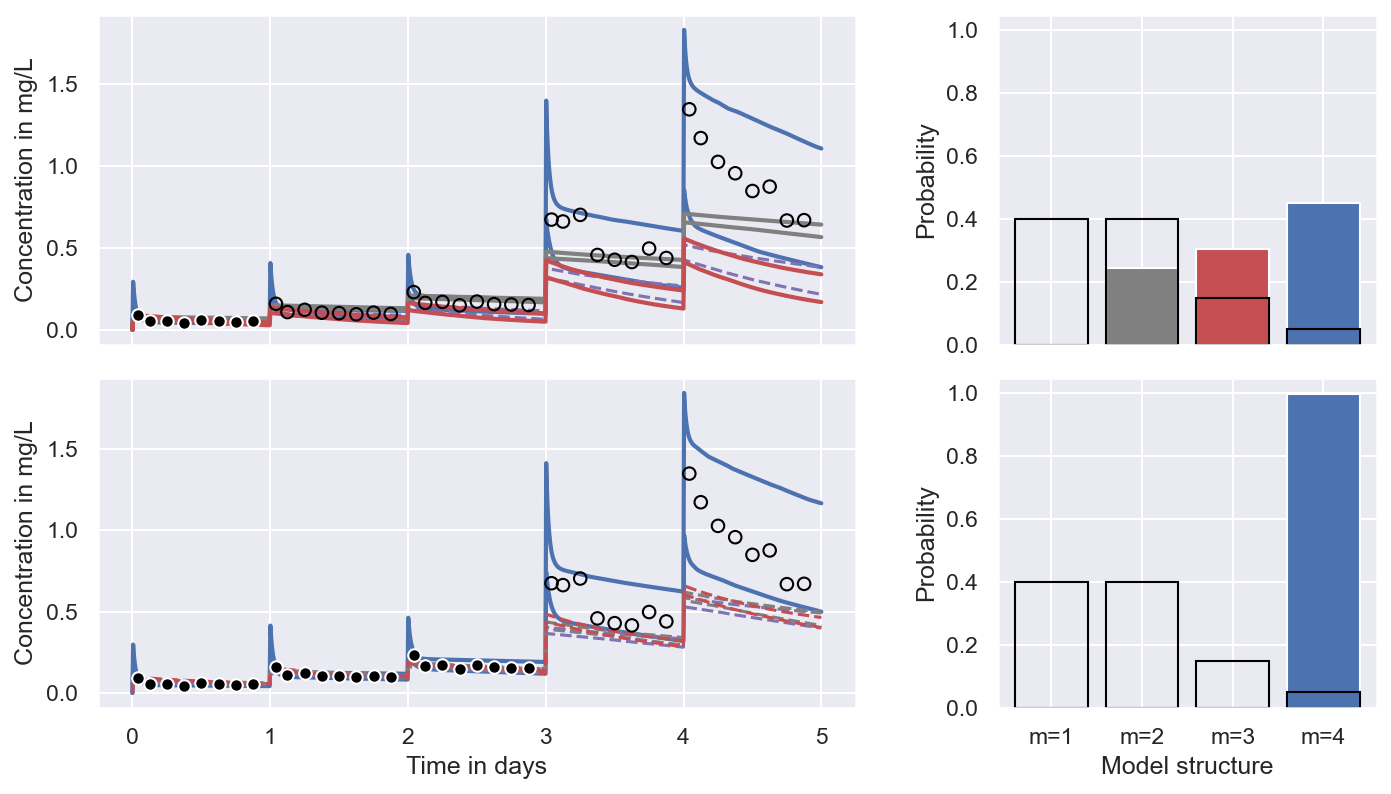

In [410]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1200 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 2, width_ratios=[4, 2], wspace=0.25, hspace=0.1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[2]))
axes.append(plt.Subplot(fig, outer[3]))

axes[1].sharey(axes[3])

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot measurements
axes[0].scatter(meas_times[:8]/24, measurements[0, :8], color='black', zorder=10, label='measurements', edgecolor='white')
axes[0].scatter(meas_times[8:]/24, measurements[0, 8:], facecolors='none', zorder=10, edgecolor='black')

# Plot fit
axes[0].plot(times/24, np.percentile(out1, 0.5, axis=0), color=sns.color_palette()[4], label='Fit 2', zorder=5, linestyle='--')
axes[0].plot(times/24, np.percentile(out1, 99.5, axis=0), color=sns.color_palette()[4], zorder=5, linestyle='--')
axes[0].plot(times/24, np.percentile(out2, 0.5, axis=0), color='grey', linewidth=2, label='Fit 2', zorder=5)
axes[0].plot(times/24, np.percentile(out2, 99.5, axis=0), color='grey', linewidth=2, zorder=5)
axes[0].plot(times/24, np.percentile(out3, 0.5, axis=0), color=sns.color_palette()[3], linewidth=2, label='Fit 3', zorder=6)
axes[0].plot(times/24, np.percentile(out3, 99.5, axis=0), color=sns.color_palette()[3], linewidth=2, zorder=6)
axes[0].plot(times/24, np.percentile(out4, 0.5, axis=0), color=sns.color_palette()[0], linewidth=2, label='Fit 4')
axes[0].plot(times/24, np.percentile(out4, 99.5, axis=0), color=sns.color_palette()[0], linewidth=2)

# Plot model posteriors
axes[1].bar([1], [model_posterior[0]], color=sns.color_palette()[4])
axes[1].bar([2], [model_posterior[1]], color='grey')
axes[1].bar([3], [model_posterior[2]], color=sns.color_palette()[3])
axes[1].bar([4], [model_posterior[3]], color=sns.color_palette()[0])
axes[1].bar([1, 2, 3, 4], model_prior, edgecolor='black', fill=False, label='prior')

axes[2].scatter(meas_times[:24]/24, measurements[0, :24], color='black', zorder=10, label='measurements', edgecolor='white')
axes[2].scatter(meas_times[24:]/24, measurements[0, 24:], facecolors='none', zorder=10, edgecolor='black')

# Plot fit
axes[2].plot(times/24, np.percentile(out11, 0.5, axis=0), color=sns.color_palette()[4], label='Fit 2', zorder=5, linestyle='--')
axes[2].plot(times/24, np.percentile(out11, 99.5, axis=0), color=sns.color_palette()[4], zorder=5, linestyle='--')
axes[2].plot(times/24, np.percentile(out22, 0.5, axis=0), color='grey', label='Fit 2', zorder=5, linestyle='--')
axes[2].plot(times/24, np.percentile(out22, 99.5, axis=0), color='grey', zorder=5, linestyle='--')
axes[2].plot(times/24, np.percentile(out33, 0.5, axis=0), color=sns.color_palette()[3], label='Fit 3', linestyle='--', zorder=6)
axes[2].plot(times/24, np.percentile(out33, 99.5, axis=0), color=sns.color_palette()[3], linestyle='--', zorder=6)
axes[2].plot(times/24, np.percentile(out44, 0.5, axis=0), color=sns.color_palette()[0], linewidth=2, label='Fit 4')
axes[2].plot(times/24, np.percentile(out44, 99.5, axis=0), color=sns.color_palette()[0], linewidth=2)

axes[3].bar([1], [model_posterior2[0]], color=sns.color_palette()[4])
axes[3].bar([2], [model_posterior2[1]], color='grey')
axes[3].bar([3], [model_posterior2[2]], color=sns.color_palette()[3])
axes[3].bar([4], [model_posterior2[3]], color=sns.color_palette()[0])
axes[3].bar([1, 2, 3, 4], model_prior, edgecolor='black', fill=False)

axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xticklabels([])
axes[1].set_ylabel('Probability')
axes[1].set_xticklabels([])
axes[2].set_ylabel('Concentration in mg/L')
axes[2].set_xlabel('Time in days')
axes[3].set_ylabel('Probability')
axes[3].set_xticklabels(['', 'm=1', 'm=2', 'm=3', 'm=4'])
axes[3].set_xlabel('Model structure')

plt.savefig('illustration_structural_uncertainty.pdf', bbox_inches='tight')
plt.show()

## Illustrate Kullback Leiber diverence

In [670]:
n = 1000
dg = pints.GaussianLogPrior(mean=1.1, sd=0.1)
samples = dg.sample(n)
entropy = -np.mean([dg(s) for s in samples])
xs = np.linspace(0.5, 1.5, num=1000)
cross_entropy = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    cross_entropy += [-np.mean([m(s) for s in samples])]

log_pdf1 = np.exp([dg([s]) for s in xs])
log_pdf2 = np.exp([pints.GaussianLogPrior(mean=1.2, sd=0.1)([s]) for s in xs])
log_pdf3 = np.exp([pints.GaussianLogPrior(mean=0.7, sd=0.1)([s]) for s in xs])

samples1 = pints.GaussianLogPrior(mean=1.2, sd=0.1).sample(10000)
samples2 = pints.GaussianLogPrior(mean=0.7, sd=0.1).sample(10000)

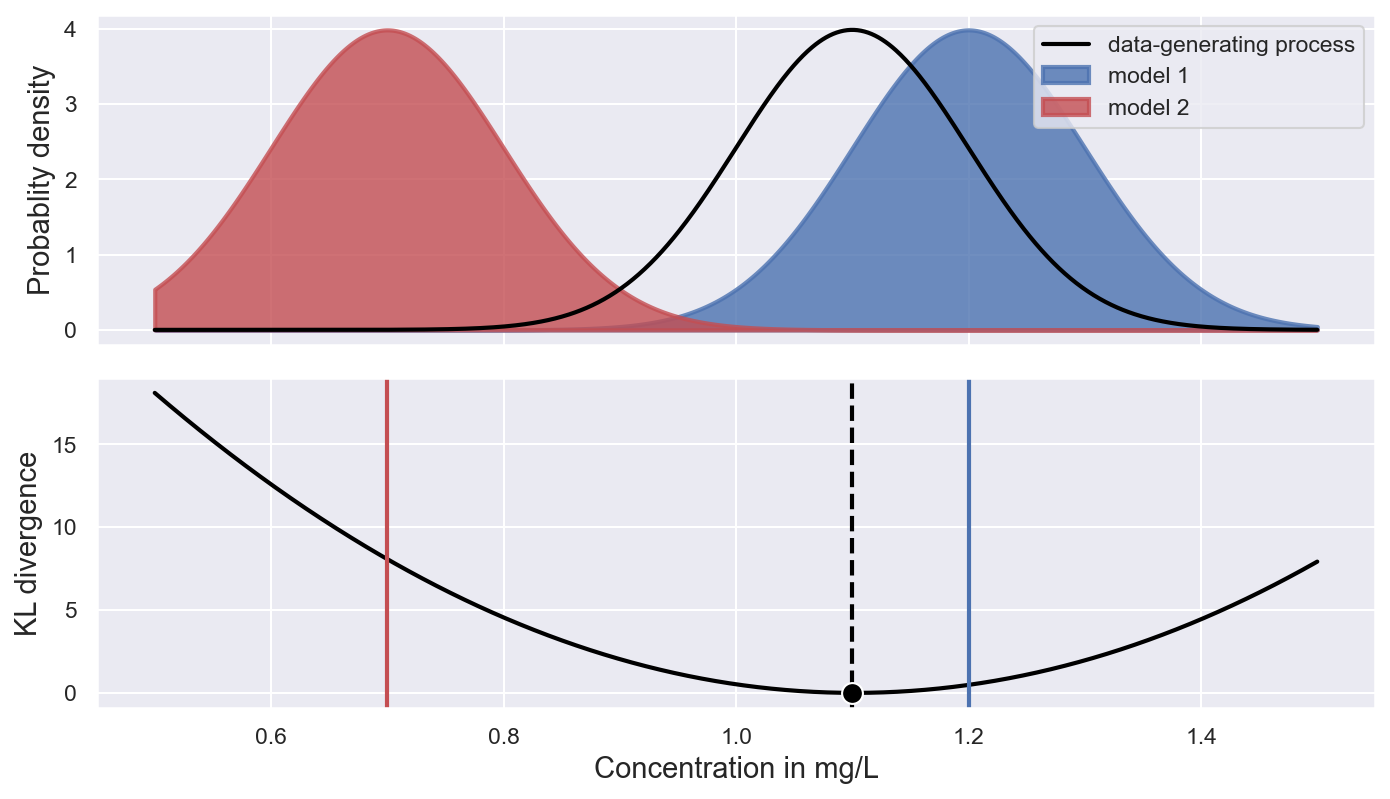

In [680]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1200 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(xs, log_pdf1, color='black', linewidth=2, label='data-generating process')
axes[0].fill_between(xs, log_pdf2, color=sns.color_palette()[0], linewidth=2, label='model 1', alpha=0.8)
axes[0].fill_between(xs, log_pdf3, color=sns.color_palette()[3], linewidth=2, label='model 2', alpha=0.8)

axes[1].plot(xs, -entropy + np.array(cross_entropy), color='black', linewidth=2)
axes[1].axvline(x=0.7, color=sns.color_palette()[3], linewidth=2)
axes[1].axvline(x=1.2, color=sns.color_palette()[0], linewidth=2)
axes[1].axvline(x=1.1, color='black', linewidth=2, linestyle='--')
axes[1].scatter(x=[1.1], y=[0], color='black', edgecolor='white', zorder=10, s=100)


axes[0].set_ylabel('Probablity density', fontsize=fontsize)
axes[0].set_xticklabels([])
axes[1].set_ylabel('KL divergence', fontsize=fontsize)
axes[1].set_xlabel('Concentration in mg/L', fontsize=fontsize)

axes[0].legend()

plt.savefig('illustration_kl_divergence.pdf', bbox_inches='tight')

plt.show()

In [674]:
entropy

-0.8941322288365272

In [683]:
np.random.seed(3)
n = 1000
dg = pints.GaussianLogPrior(mean=1.1, sd=0.1)
samples = dg.sample(n)
xs = np.linspace(0.8, 1.4, num=1000)
cross_entropy = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    cross_entropy += [-np.mean([m(s) for s in samples])]

cross_entropy1 = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    cross_entropy1 += [-np.mean([m(s) for s in samples][:30])]
cross_entropy2 = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    cross_entropy2 += [-np.mean([m(s) for s in samples][30:40])]

log_pdf1 = np.exp([dg([s]) for s in xs])


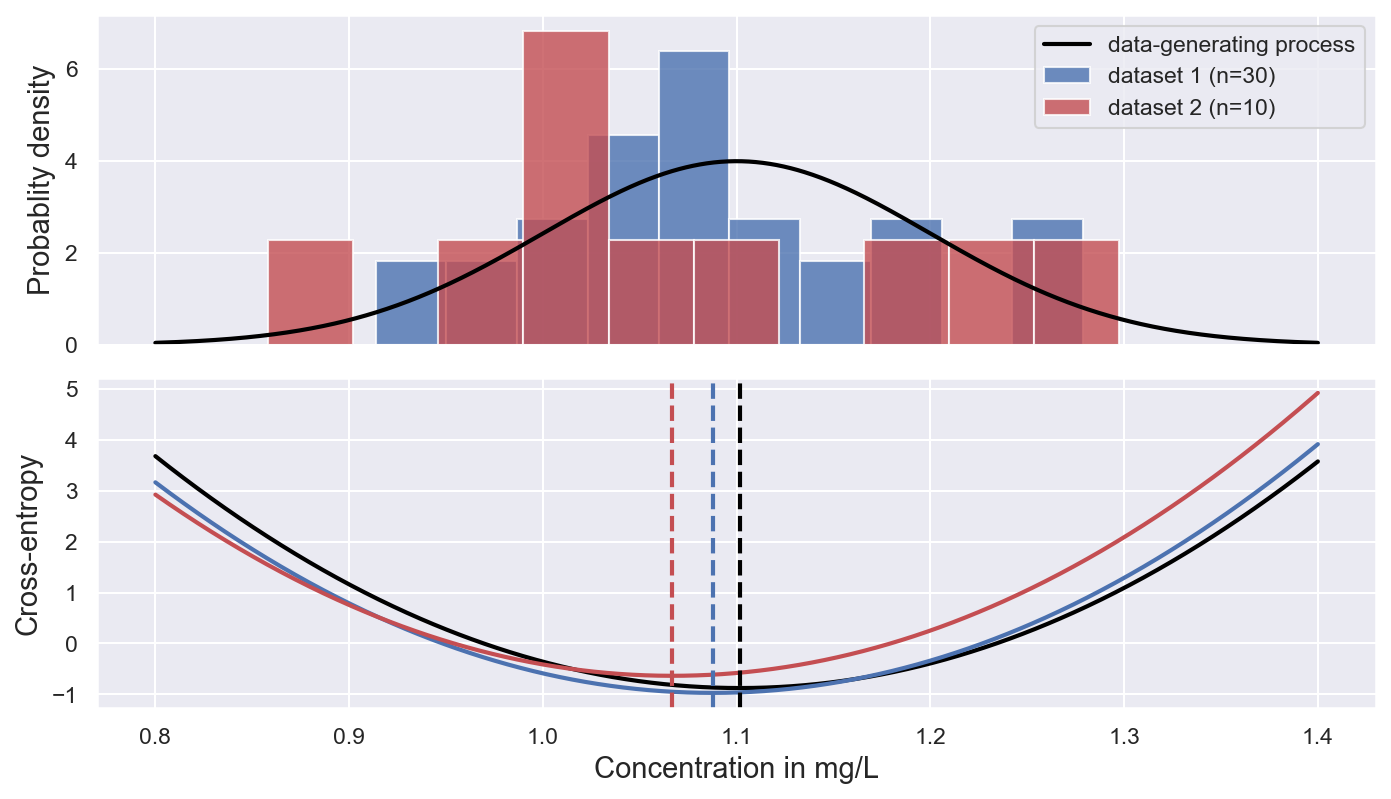

In [684]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1200 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(xs, log_pdf1, color='black', linewidth=2, label='data-generating process')
axes[0].hist(samples[:30], density=True, color=sns.color_palette()[0], alpha=0.8, label='dataset 1 (n=30)')
axes[0].hist(samples[30:40], density=True, color=sns.color_palette()[3], alpha=0.8, label='dataset 2 (n=10)')

axes[1].plot(xs, np.array(cross_entropy), color='black', linewidth=2)
axes[1].plot(xs, np.array(cross_entropy1), color=sns.color_palette()[0], linewidth=2)
axes[1].plot(xs, np.array(cross_entropy2), color=sns.color_palette()[3], linewidth=2)

axes[1].axvline(x=xs[np.argmin(cross_entropy1)], color=sns.color_palette()[0], linewidth=2, linestyle='--')
axes[1].axvline(x=xs[np.argmin(cross_entropy2)], color=sns.color_palette()[3], linewidth=2, linestyle='--')
axes[1].axvline(x=xs[np.argmin(cross_entropy)], color='black', linewidth=2, linestyle='--')


axes[0].set_ylabel('Probablity density', fontsize=fontsize)
axes[0].set_xticklabels([])
axes[1].set_ylabel('Cross-entropy', fontsize=fontsize)
axes[1].set_xlabel('Concentration in mg/L', fontsize=fontsize)

axes[0].legend()

plt.savefig('illustration_cross_entropy.pdf', bbox_inches='tight')

plt.show()

In [489]:
xs[np.argmin(cross_entropy2)]

1.0666666666666667

Model weights

In [685]:
np.random.seed(3)
n = 1000
dg = pints.GaussianLogPrior(mean=1.1, sd=0.1)
samples = dg.sample(n)
xs = np.linspace(0.8, 1.4, num=1000)
log_likelihood = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    log_likelihood += [-np.sum([m(s) for s in samples])]
log_likelihood = np.array(log_likelihood)
model_weights = np.exp(-log_likelihood) / np.sum(np.exp(-log_likelihood))

log_likelihood1 = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    log_likelihood1 += [-np.sum([m(s) for s in samples][:30])]
log_likelihood1 = np.array(log_likelihood1)
model_weights1 = np.exp(-log_likelihood1) / np.sum(np.exp(-log_likelihood1))

log_likelihood2 = []
for x in xs:
    m = pints.GaussianLogPrior(mean=x, sd=0.1)
    log_likelihood2 += [-np.sum([m(s) for s in samples][30:40])]
log_likelihood2 = np.array(log_likelihood2)
model_weights2 = np.exp(-log_likelihood2) / np.sum(np.exp(-log_likelihood2))

log_pdf1 = np.exp([dg([s]) for s in xs])


/var/folders/v4/97p50d2s59d8tf5xm5h27fjh0000gp/T/ipykernel_1148/2594424720.py:11: RuntimeWarning: overflow encountered in exp
  model_weights = np.exp(-log_likelihood) / np.sum(np.exp(-log_likelihood))
/var/folders/v4/97p50d2s59d8tf5xm5h27fjh0000gp/T/ipykernel_1148/2594424720.py:11: RuntimeWarning: invalid value encountered in divide
  model_weights = np.exp(-log_likelihood) / np.sum(np.exp(-log_likelihood))


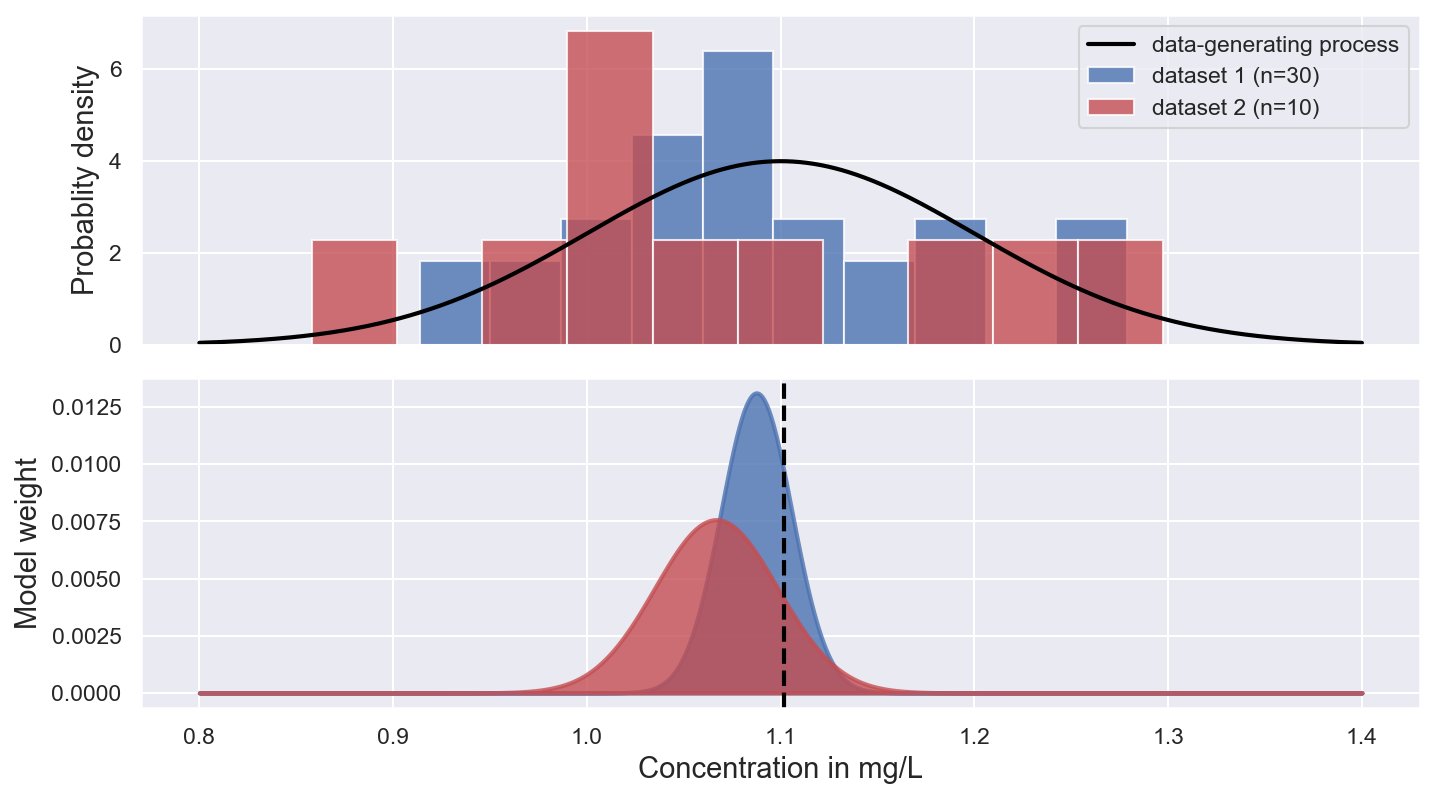

In [686]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1200 // my_dpi), dpi=150)
outer = gridspec.GridSpec(2, 1, hspace=0.1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(xs, log_pdf1, color='black', linewidth=2, label='data-generating process')
axes[0].hist(samples[:30], density=True, color=sns.color_palette()[0], alpha=0.8, label='dataset 1 (n=30)')
axes[0].hist(samples[30:40], density=True, color=sns.color_palette()[3], alpha=0.8, label='dataset 2 (n=10)')

axes[1].fill_between(xs, np.array(model_weights1), color=sns.color_palette()[0], linewidth=2, alpha=0.8)
axes[1].fill_between(xs, np.array(model_weights2), color=sns.color_palette()[3], linewidth=2, alpha=0.8)

axes[1].axvline(x=xs[np.argmin(cross_entropy)], color='black', linewidth=2, linestyle='--')


axes[0].set_ylabel('Probablity density', fontsize=fontsize)
axes[0].set_xticklabels([])
axes[1].set_ylabel('Model weight', fontsize=fontsize)
axes[1].set_xlabel('Concentration in mg/L', fontsize=fontsize)

axes[0].legend()

plt.savefig('illustration_cross_entropy_model_weights.pdf', bbox_inches='tight')

plt.show()

Show bias of estimator with n

In [687]:
def estimate_loo(samples):
    n = len(samples)
    estimate = []
    for idx in range(n):
        if idx == 0:
            s = samples[idx+1:]
        elif idx == (n-1):
            s = samples[:idx]
        else:
            s = np.hstack([samples[:idx], samples[idx+1:]])
        mean_mle = np.mean(s)
        sd_mle = np.std(s, ddof=1)
        m = pints.GaussianLogPrior(mean=mean_mle, sd=sd_mle)
        estimate += [-m([samples[idx]])]

    estimate = np.mean(estimate)

    return estimate


np.random.seed(2)
ns = np.arange(5, 100)
dg = pints.GaussianLogPrior(mean=1.1, sd=0.1)
true_entropy = []
biased_estimator = []
loo_estimator = []
for n in ns:
    samples = dg.sample(n)
    mean_mle = np.mean(samples)
    sd_mle = np.std(samples, ddof=1)
    m = pints.GaussianLogPrior(mean=mean_mle, sd=sd_mle)
    true_entropy += [-np.mean([m(s) for s in dg.sample(1000000)])]
    biased_estimator += [-np.mean([m(s) for s in samples])]
    loo_estimator += [estimate_loo(samples[:, 0])]

aic_estimator = np.array(biased_estimator) + 2 / ns


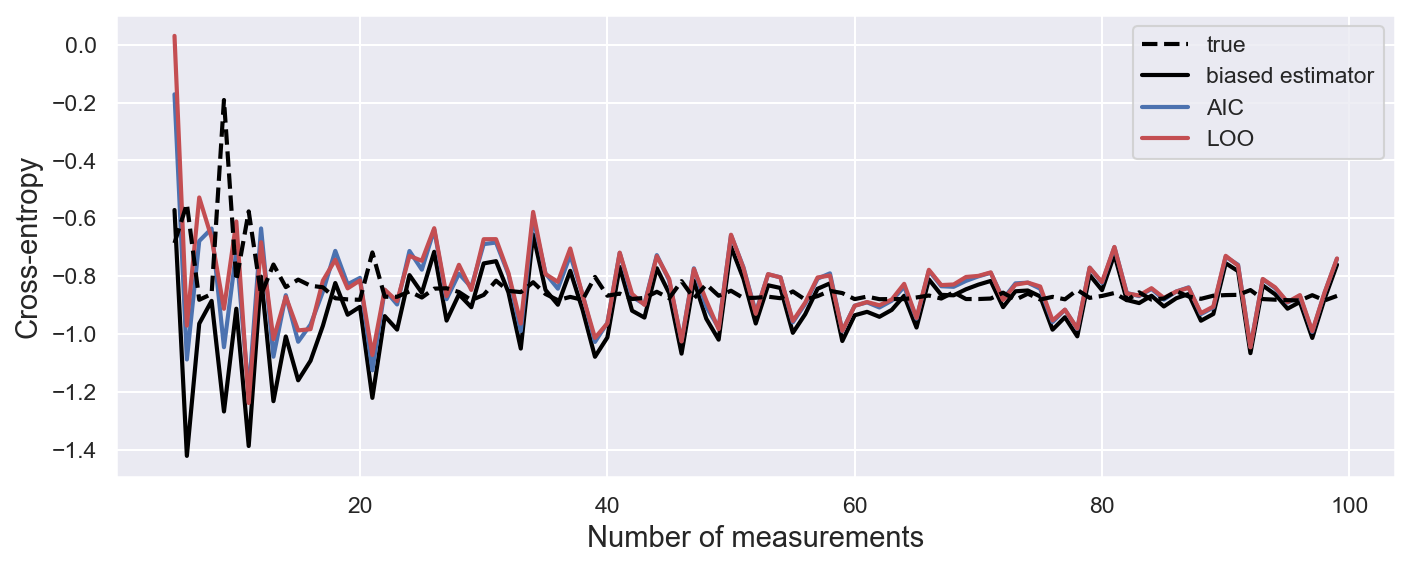

In [688]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(ns, true_entropy, color='black', linewidth=2, label='true', linestyle='dashed', zorder=10)
axes[0].plot(ns, biased_estimator, color='black', linewidth=2, label='biased estimator')
axes[0].plot(ns, aic_estimator, color=sns.color_palette()[0], linewidth=2, label='AIC')
axes[0].plot(ns, loo_estimator, color=sns.color_palette()[3], linewidth=2, label='LOO')

axes[0].set_xlabel('Number of measurements', fontsize=fontsize)
axes[0].set_ylabel('Cross-entropy', fontsize=fontsize)

axes[0].legend()

plt.savefig('illustration_information_criteria.pdf', bbox_inches='tight')

plt.show()

In [552]:
np.sqrt(np.mean((np.array(biased_estimator) - np.array(true_entropy))**2))

0.20526485196535138

In [562]:
np.mean((np.array(biased_estimator) - np.array(true_entropy))[:30])

-0.155994007345109

In [554]:
np.sqrt(np.mean((np.array(aic_estimator) - np.array(true_entropy))**2))

0.1754515151084326

In [563]:
np.mean((np.array(aic_estimator) - np.array(true_entropy))[:30])

-0.02033556353763567

In [556]:
np.sqrt(np.mean((np.array(loo_estimator) - np.array(true_entropy))**2))

0.17485248210111543

In [564]:
np.mean((np.array(loo_estimator) - np.array(true_entropy))[:30])

0.007951340996272985

## Repeat cross-entropy estimation exercise for Bayesian example

In [703]:
class ToyModel(chi.MechanisticModel):
    def __init__(self):
        super(ToyModel, self).__init__()

    def has_sensitivities(self):
        return False

    def simulate(self, parameters, times):
        value = parameters[0]
        return np.array([[value] * len(times)])

    def n_parameters(self):
        return 1

    def n_outputs(self):
        return 1

    def parameters(self):
        return ['Mean']

def get_biased_estimate(log_likelihood, posterior):
    samples = np.vstack([
        posterior['Mean'].values[0],
        posterior['Sigma'].values[0]]).T

    n_samples = len(samples)
    n_obs = np.sum(log_likelihood.n_observations())
    scores = np.empty(shape=(n_samples, n_obs))
    for ids, s in enumerate(samples):
        scores[ids] = log_likelihood.compute_pointwise_ll(s)

    # Calculate posterior predictive log-pdf
    scores = np.log(np.mean(np.exp(scores), axis=0))

    # Calculate entropy
    score = -np.mean(scores)

    return score

def get_true_cross_entropy(posterior):
    n = 10000
    samples = dg.sample(n)
    samples = samples.transpose()
    log_likelihood = chi.LogLikelihood(
        model, error_model, observations=samples, times=np.arange(n))

    samples = np.vstack([
        posterior['Mean'].values[0],
        posterior['Sigma'].values[0]]).T

    n_samples = len(samples)
    n_obs = np.sum(log_likelihood.n_observations())
    scores = np.empty(shape=(n_samples, n_obs))
    for ids, s in enumerate(samples):
        scores[ids] = log_likelihood.compute_pointwise_ll(s)

    # Calculate posterior predictive log-pdf
    scores = np.log(np.mean(np.exp(scores), axis=0))

    # Calculate entropy
    score = -np.mean(scores)

    return score


np.random.seed(6)
ns = np.arange(5, 100)
dg = pints.GaussianLogPrior(mean=1.1, sd=0.1)
model = ToyModel()
error_model = chi.GaussianErrorModel()
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(mean=0.8, sd=0.2), pints.LogNormalLogPrior(log_mean=np.log(0.1), scale=0.3))

true_entropy = []
biased_estimator = []
waic = []
loo = []
for n in ns:
    # Sample data
    samples = dg.sample(n)
    samples = samples.transpose()

    # Infer posterior
    log_likelihood = chi.LogLikelihood(
        model, error_model, observations=samples, times=np.arange(n))
    log_posterior = chi.LogPosterior(log_likelihood, log_prior)
    controller = chi.SamplingController(log_posterior)
    controller.set_n_runs(1)
    controller.set_parallel_evaluation(False)
    p_samples = controller.run(log_to_screen=False)
    p_samples = p_samples.expand_dims(dim={'individual': ['0'],})
    p_samples = p_samples.sel(draw=slice(5000, 15000, 1))

    # Get estimates
    true_entropy += [get_true_cross_entropy(p_samples)]
    biased_estimator += [get_biased_estimate(log_likelihood, p_samples)]

    # Calculate information criteria
    inference_data = chi.compute_pointwise_loglikelihood(
        log_likelihood, p_samples, per_individual=False,
        return_inference_data=True,
        show_chain_progress_bar=False)
    waic += [az.waic(inference_data).elpd_waic]
    loo += [az.loo(inference_data).elpd_loo]

# Needs to be normalised
biased_estimator = np.array(biased_estimator)
waic = np.array(waic) / ns
loo = np.array(loo) / ns


/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/lib/python3.9/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/DAUGU/Workspace/mipd-warfarin/venv/l

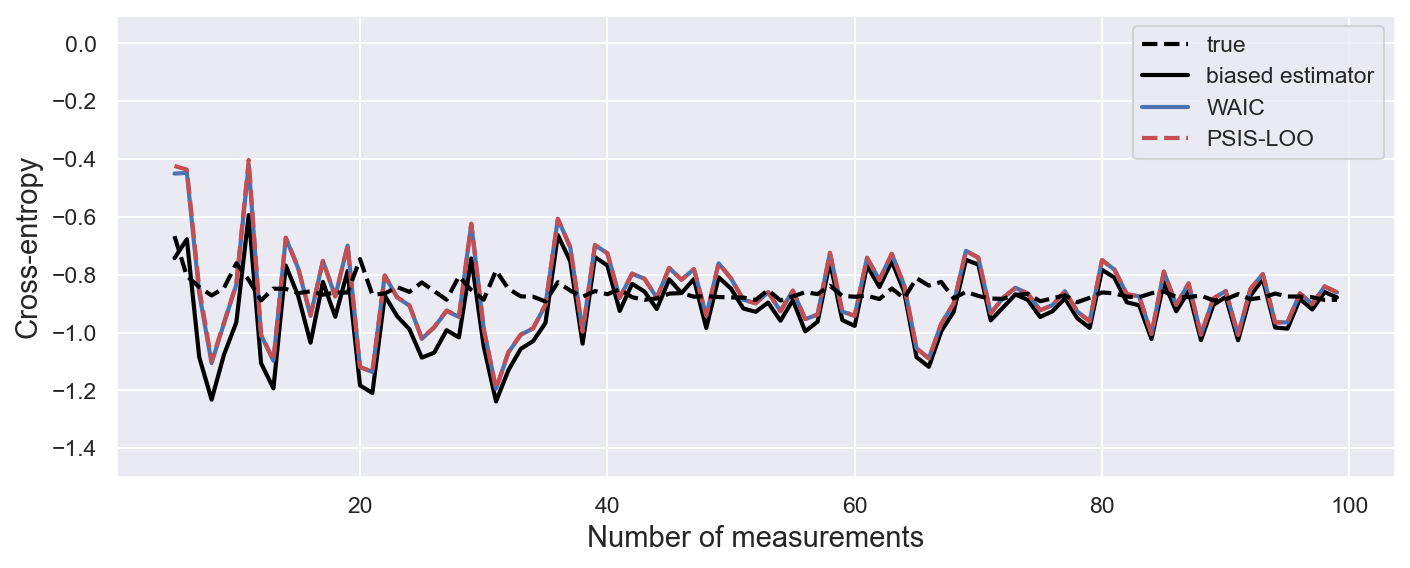

In [705]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(ns, true_entropy, color='black', linewidth=2, label='true', linestyle='dashed', zorder=10)
axes[0].plot(ns, biased_estimator, color='black', linewidth=2, label='biased estimator')
axes[0].plot(ns, -waic, color=sns.color_palette()[0], linewidth=2, label='WAIC')
axes[0].plot(ns, -loo, color=sns.color_palette()[3], linewidth=2, label='PSIS-LOO', linestyle='dashed')

axes[0].set_xlabel('Number of measurements', fontsize=fontsize)
axes[0].set_ylabel('Cross-entropy', fontsize=fontsize)
axes[0].set_ylim([-1.499, 0.099])

axes[0].legend()

plt.savefig('illustration_bayesian_information_criteria.pdf', bbox_inches='tight')

plt.show()

In [653]:
biased_estimator = np.array(biased_estimator) / ns

In [647]:
p_samples['Mean'].values.shape

(1, 1, 5000)

In [689]:
log_likelihood.compute_pointwise_ll([1, 2])

AttributeError: 'numpy.ndarray' object has no attribute 'compute_pointwise_ll'